In [14]:
import geopandas as gpd
import pandas as pd
import os
from matplotlib import pyplot as plt
from prophet import Prophet

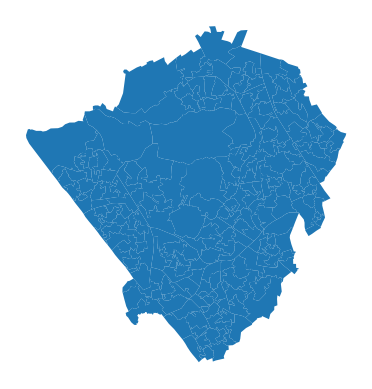

In [3]:
 # Read in the data
shape = gpd.read_file(r"DC2Data/LSOAShapes/LSOA_2011_London_gen_MHW_LSOA11NM_contains_Barnet.shp")
ax = shape.plot()
ax.set_axis_off()

In [4]:
burglaries = pd.read_csv(r"DC2Data/burglary.csv")
list1 = list(shape['LSOA11CD'])
list2 = list(burglaries['LSOA code'].unique())

for i in list1:
    if i not in list2:
        print(i)


In [5]:
counts =  burglaries.groupby('LSOA code').size()
counts = counts.to_frame()
counts.columns = ['count']
counts = counts.reset_index()
counts = counts.rename(columns={'LSOA code':'LSOA11CD'})
shape = shape.merge(counts, on='LSOA11CD')

<AxesSubplot: >

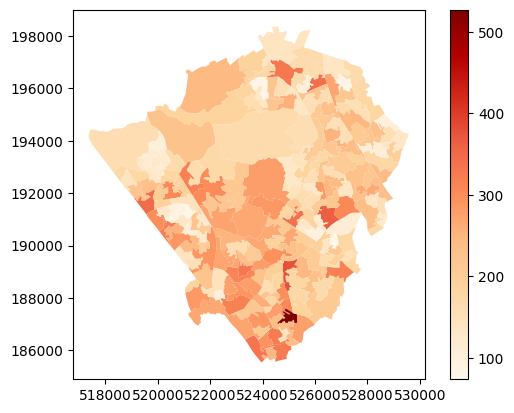

In [6]:
shape.plot(column='count', cmap='OrRd', legend=True)

(array([5231., 4845., 4269., 3595., 3805., 3379., 3848., 3643., 3526.,
        2680., 2369., 2717.]),
 array([14944.        , 15314.41666667, 15684.83333333, 16055.25      ,
        16425.66666667, 16796.08333333, 17166.5       , 17536.91666667,
        17907.33333333, 18277.75      , 18648.16666667, 19018.58333333,
        19389.        ]),
 <BarContainer object of 12 artists>)

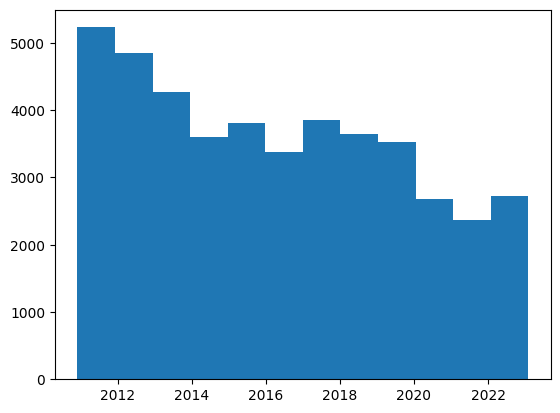

In [7]:
burglaries['Month'] = pd.to_datetime(burglaries['Month'])
plt.hist(burglaries['Month'], bins=12)


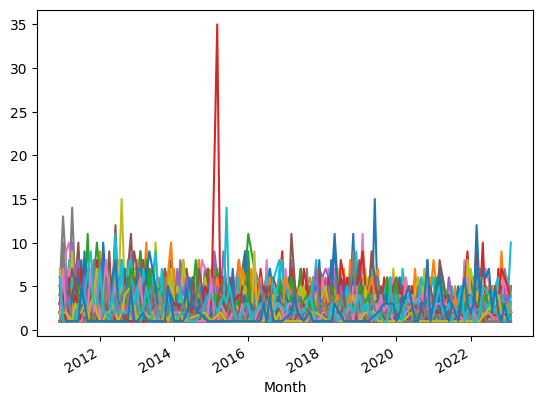

In [11]:
lsoa_list = list(burglaries['LSOA code'].unique())
# get total rows per month for each lsoa
lsoa_month = burglaries.groupby(['LSOA code', 'Month']).size()
lsoa_month = lsoa_month.to_frame()
lsoa_month.columns = ['count']
lsoa_month = lsoa_month.reset_index()
grouped = lsoa_month.groupby('LSOA code')

fig, ax = plt.subplots()


for group, frame in grouped:
    if group == 'E01000115':
        counts = frame[['Month', 'count']].set_index('Month').T
        counts['LSOA'] = group
    else:
        temp = frame[['Month', 'count']].set_index('Month').T
        temp['LSOA'] = group
        counts =  pd.concat([counts, temp], axis=0)
    frame.plot(x='Month', y='count', ax=ax, label=group)
_lg = ax.get_legend()
_lg.remove()

In [9]:
shape

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,count
0,E01000115,Barnet 009A,E02000032,Barnet 009,E09000003,Barnet,E12000007,London,1484,1460,24,54.2,485,3.0,"POLYGON ((528924.582 194719.687, 529143.340 19...",102
1,E01000116,Barnet 009B,E02000032,Barnet 009,E09000003,Barnet,E12000007,London,1718,1718,0,70.1,623,2.8,"POLYGON ((528236.849 194769.663, 528292.580 19...",232
2,E01000117,Barnet 010A,E02000033,Barnet 010,E09000003,Barnet,E12000007,London,1819,1819,0,54.9,762,2.4,"POLYGON ((527881.741 194392.193, 527826.000 19...",211
3,E01000118,Barnet 010B,E02000033,Barnet 010,E09000003,Barnet,E12000007,London,1936,1936,0,67.8,709,2.7,"POLYGON ((528023.274 194475.319, 528155.952 19...",219
4,E01000119,Barnet 009C,E02000032,Barnet 009,E09000003,Barnet,E12000007,London,1680,1680,0,42.3,607,2.8,"POLYGON ((529239.813 194453.141, 529243.875 19...",134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,E01000322,Barnet 011E,E02000034,Barnet 011,E09000003,Barnet,E12000007,London,1717,1675,42,83.9,774,2.2,"POLYGON ((526367.531 192731.157, 526369.000 19...",245
207,E01000323,Barnet 019F,E02000042,Barnet 019,E09000003,Barnet,E12000007,London,1982,1916,66,92.6,865,2.2,"POLYGON ((526663.954 192497.788, 526649.764 19...",248
208,E01000324,Barnet 015F,E02000038,Barnet 015,E09000003,Barnet,E12000007,London,1786,1762,24,65.8,655,2.7,"POLYGON ((527181.249 192514.687, 527250.185 19...",137
209,E01033572,Barnet 030E,E02000053,Barnet 030,E09000003,Barnet,E12000007,London,1588,1588,0,23.2,571,2.8,"POLYGON ((522094.781 190677.422, 522206.052 19...",291


In [31]:
lsoa_month.groupby('LSOA code')

for group, frame in lsoa_month.groupby('LSOA code'):
    df = frame[['Month', 'count']]
    df.columns = ['ds', 'y']
    m = Prophet()
    m.fit(df)


09:40:02 - cmdstanpy - INFO - Chain [1] start processing
09:40:02 - cmdstanpy - INFO - Chain [1] done processing
09:40:02 - cmdstanpy - INFO - Chain [1] start processing
09:40:02 - cmdstanpy - INFO - Chain [1] done processing
09:40:02 - cmdstanpy - INFO - Chain [1] start processing
09:40:03 - cmdstanpy - INFO - Chain [1] done processing
09:40:03 - cmdstanpy - INFO - Chain [1] start processing
09:40:03 - cmdstanpy - INFO - Chain [1] done processing
09:40:03 - cmdstanpy - INFO - Chain [1] start processing
09:40:04 - cmdstanpy - INFO - Chain [1] done processing
09:40:04 - cmdstanpy - INFO - Chain [1] start processing
09:40:04 - cmdstanpy - INFO - Chain [1] done processing
09:40:04 - cmdstanpy - INFO - Chain [1] start processing
09:40:05 - cmdstanpy - INFO - Chain [1] done processing
09:40:05 - cmdstanpy - INFO - Chain [1] start processing
09:40:05 - cmdstanpy - INFO - Chain [1] done processing
09:40:05 - cmdstanpy - INFO - Chain [1] start processing
09:40:05 - cmdstanpy - INFO - Chain [1]

           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.522976    0.880151    2.641387     1.522976     1.522976   
1  2011-04-01  1.521409    0.403313    2.225941     1.521409     1.521409   
2  2011-08-01  1.519286    0.413613    2.139445     1.519286     1.519286   
3  2011-12-01  1.517162    0.874620    2.616950     1.517162     1.517162   
4  2012-01-01  1.516622    1.104478    2.842238     1.516622     1.516622   
..        ...       ...         ...         ...          ...          ...   
61 2021-11-01  1.454097    0.823952    2.551462     1.454097     1.454097   
62 2022-01-01  1.453035    0.545146    2.298568     1.453035     1.453035   
63 2022-09-01  1.448805    0.669324    2.294573     1.448805     1.448805   
64 2022-10-01  1.448283    0.947927    2.685180     1.448283     1.448283   
65 2023-01-01  1.446682    0.801565    2.580761     1.446682     1.446682   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:11 - cmdstanpy - INFO - Chain [1] done processing
09:41:11 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.250779    1.164313    4.113221     3.250779     3.250779   
1   2011-01-01  3.232969    1.820915    4.770153     3.232969     3.232969   
2   2011-02-01  3.215160    2.333679    5.351875     3.215160     3.215160   
3   2011-03-01  3.199074    1.802245    4.853168     3.199074     3.199074   
4   2011-04-01  3.181264    1.465595    4.535287     3.181264     3.181264   
..         ...       ...         ...         ...          ...          ...   
103 2022-02-01  0.922111    0.060900    2.911420     0.922111     0.922111   
104 2022-04-01  0.888456   -0.695059    2.270323     0.888456     0.888456   
105 2022-09-01  0.801183   -1.030573    1.856835     0.801183     0.801183   
106 2022-10-01  0.784070   -0.868620    2.086204     0.784070     0.784070   
107 2023-02-01  0.713909   -0.209236    2.673462     0.713909     0.713909   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:12 - cmdstanpy - INFO - Chain [1] done processing
09:41:12 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.533027    1.664856    4.434701     2.533027     2.533027   
1   2011-01-01  2.524270    1.052653    3.641532     2.524270     2.524270   
2   2011-02-01  2.515512    1.497037    4.274643     2.515512     2.515512   
3   2011-03-01  2.507603    1.085836    4.040217     2.507603     2.507603   
4   2011-04-01  2.498845    0.527039    3.328299     2.498845     2.498845   
..         ...       ...         ...         ...          ...          ...   
101 2022-05-01  1.355317    0.190081    2.813428     1.355317     1.355317   
102 2022-10-01  1.312096   -0.138890    2.590703     1.312096     1.312096   
103 2022-12-01  1.294864    0.505666    3.289916     1.294864     1.294864   
104 2023-01-01  1.286107   -0.363589    2.437199     1.286107     1.286107   
105 2023-02-01  1.277350    0.245996    2.936786     1.277350     1.277350   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:12 - cmdstanpy - INFO - Chain [1] done processing
09:41:12 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  3.091942    1.608274    5.123508     3.091942     3.091942   
1  2011-02-01  3.068840    1.000484    4.530063     3.068840     3.068840   
2  2011-03-01  3.058407    0.963500    4.367061     3.058407     3.058407   
3  2011-04-01  3.046856    1.093229    4.592438     3.046856     3.046856   
4  2011-05-01  3.035677    2.114676    5.564611     3.035677     3.035677   
..        ...       ...         ...         ...          ...          ...   
91 2022-05-01  1.538512    0.037618    3.610235     1.538512     1.538512   
92 2022-07-01  1.515783   -0.658835    2.790377     1.515783     1.515783   
93 2022-09-01  1.492681    0.075738    3.519197     1.492681     1.492681   
94 2022-11-01  1.469951    0.460752    3.837587     1.469951     1.469951   
95 2023-01-01  1.447222   -0.687900    2.871829     1.447222     1.447222   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:12 - cmdstanpy - INFO - Chain [1] done processing
09:41:13 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.728160    1.213920    3.069460     2.728160     2.728160   
1  2011-02-01  2.717477    1.457135    3.235366     2.717477     2.717477   
2  2011-05-01  2.686807    1.021488    2.894010     2.686807     2.686807   
3  2011-06-01  2.676125    2.751112    4.556726     2.676125     2.676125   
4  2011-07-01  2.665786    0.871698    2.696664     2.665786     2.665786   
..        ...       ...         ...         ...          ...          ...   
73 2022-02-01  1.332851   -0.323720    1.497646     1.332851     1.332851   
74 2022-06-01  1.291498    0.482639    2.332777     1.291498     1.291498   
75 2022-08-01  1.270477   -0.453092    1.395252     1.270477     1.270477   
76 2022-09-01  1.259795    0.308609    2.225307     1.259795     1.259795   
77 2023-02-01  1.207070   -0.191280    1.768822     1.207070     1.207070   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:13 - cmdstanpy - INFO - Chain [1] done processing
09:41:13 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.165742    0.719492    2.703431     2.165742     2.165742   
1  2011-01-01  2.161746    1.430259    3.387646     2.161746     2.161746   
2  2011-02-01  2.157750    2.023634    4.110527     2.157750     2.157750   
3  2011-05-01  2.146278    0.467259    2.495863     2.146278     2.146278   
4  2011-06-01  2.142282    0.902191    2.915333     2.142282     2.142282   
..        ...       ...         ...         ...          ...          ...   
86 2021-07-01  1.667411   -0.055411    1.914870     1.667411     1.667411   
87 2021-10-01  1.655547    1.279138    3.263948     1.655547     1.655547   
88 2021-11-01  1.651549    0.865366    2.898361     1.651549     1.651549   
89 2022-01-01  1.643683    0.670299    2.712978     1.643683     1.643683   
90 2022-04-01  1.632077    0.201723    2.257117     1.632077     1.632077   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:13 - cmdstanpy - INFO - Chain [1] done processing
09:41:14 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.735176    1.161249    2.771412     1.735176     1.735176   
1  2011-01-01  1.732933    0.412384    2.031498     1.732933     1.732933   
2  2011-02-01  1.730689    0.865215    2.450835     1.730689     1.730689   
3  2011-04-01  1.726420    1.591852    3.195473     1.726420     1.726420   
4  2011-05-01  1.724249    0.327443    1.897926     1.724249     1.724249   
..        ...       ...         ...         ...          ...          ...   
70 2021-06-01  1.457655    0.835503    2.453327     1.457655     1.457655   
71 2022-01-01  1.442169    0.225071    1.825899     1.442169     1.442169   
72 2022-07-01  1.429070    0.048083    1.701586     1.429070     1.429070   
73 2022-11-01  1.420169    0.491328    2.122783     1.420169     1.420169   
74 2023-01-01  1.415755    0.125982    1.667664     1.415755     1.415755   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:14 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.899456    0.645152    3.765140     2.899456     2.899456   
1  2011-01-01  2.890918    0.349096    3.442585     2.890918     2.890918   
2  2011-02-01  2.882381    1.670767    4.795074     2.882381     2.882381   
3  2011-03-01  2.874669    1.358095    4.420560     2.874669     2.874669   
4  2011-04-01  2.866131    0.888382    3.927453     2.866131     2.866131   
..        ...       ...         ...         ...          ...          ...   
90 2021-02-01  1.876308   -0.340560    2.622132     1.876308     1.876308   
91 2021-12-01  1.792859   -0.312199    2.719171     1.792859     1.792859   
92 2022-01-01  1.784321   -0.294386    2.726801     1.784321     1.784321   
93 2022-03-01  1.768072    0.195381    3.307194     1.768072     1.768072   
94 2022-10-01  1.709134    0.281925    3.428482     1.709134     1.709134   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:14 - cmdstanpy - INFO - Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] done processing
09:41:15 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.965664    1.293103    3.826276     1.965664     1.965664   
1  2011-01-01  1.962441    1.245593    3.848814     1.962441     1.962441   
2  2011-02-01  1.959218    0.317000    2.875577     1.959218     1.959218   
3  2011-03-01  1.956306    0.742116    3.334993     1.956306     1.956306   
4  2011-04-01  1.953083    0.159548    2.686289     1.953083     1.953083   
..        ...       ...         ...         ...          ...          ...   
93 2022-06-01  1.528972   -0.502147    2.002639     1.528972     1.528972   
94 2022-08-01  1.522630    0.421090    2.884670     1.522630     1.522630   
95 2022-10-01  1.516287    0.176864    2.736412     1.516287     1.516287   
96 2022-11-01  1.513064    0.563556    3.165402     1.513064     1.513064   
97 2022-12-01  1.509945    0.781706    3.366462     1.509945     1.509945   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:15 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.935940    0.198010    3.376749     1.935940     1.935940   
1   2011-01-01  1.939967    0.162005    3.441155     1.939967     1.939967   
2   2011-02-01  1.943994    1.593926    4.763452     1.943994     1.943994   
3   2011-03-01  1.947631    0.532113    3.719588     1.947631     1.947631   
4   2011-04-01  1.951653   -0.369667    2.713503     1.951653     1.951653   
..         ...       ...         ...         ...          ...          ...   
105 2022-10-01  2.496764    0.975992    4.223739     2.496764     2.496764   
106 2022-11-01  2.500787    0.969110    4.326581     2.500787     2.500787   
107 2022-12-01  2.504679    0.769974    3.977922     2.504679     2.504679   
108 2023-01-01  2.508702    0.846919    3.977526     2.508702     2.508702   
109 2023-02-01  2.512724    2.110751    5.383880     2.512724     2.512724   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:15 - cmdstanpy - INFO - Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] done processing
09:41:15 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.333520    0.296853    3.673048     2.333520     2.333520   
1   2011-02-01  2.335284    0.554307    3.980737     2.335284     2.335284   
2   2011-04-01  2.338641    1.100851    4.550696     2.338641     2.338641   
3   2011-05-01  2.340348    0.405833    3.968075     2.340348     2.340348   
4   2011-06-01  2.342112   -0.112684    3.309959     2.342112     2.342112   
..         ...       ...         ...         ...          ...          ...   
117 2022-09-01  2.575960    0.912513    4.324792     2.575960     2.575960   
118 2022-11-01  2.579431    1.635576    4.933886     2.579431     2.579431   
119 2022-12-01  2.581138    0.802319    4.240200     2.581138     2.581138   
120 2023-01-01  2.582901    0.518195    3.943135     2.582901     2.582901   
121 2023-02-01  2.584665    0.784564    4.156759     2.584665     2.584665   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.506380    0.371684    1.879043     1.506380     1.506380   
1  2011-01-01  1.506081    1.412110    2.919730     1.506081     1.506081   
2  2011-03-01  1.505511    0.203841    1.756157     1.505511     1.505511   
3  2011-04-01  1.505211   -0.044891    1.528217     1.505211     1.505211   
4  2011-06-01  1.504622    0.419901    1.903686     1.504622     1.504622   
..        ...       ...         ...         ...          ...          ...   
68 2022-09-01  1.464926    1.195212    2.751610     1.464926     1.464926   
69 2022-10-01  1.464636    0.429606    1.962450     1.464636     1.464636   
70 2022-11-01  1.464337    0.444668    1.925135     1.464337     1.464337   
71 2022-12-01  1.464047    0.357096    1.958382     1.464047     1.464047   
72 2023-01-01  1.463748    1.316613    2.877218     1.463748     1.463748   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.270540    0.533689    2.081428     1.270540     1.270540   
1  2011-02-01  1.270590    0.958057    2.428037     1.270590     1.270590   
2  2011-05-01  1.270733    0.382715    1.915521     1.270733     1.270733   
3  2011-07-01  1.270831    0.631417    2.112409     1.270831     1.270831   
4  2011-10-01  1.270979    0.117289    1.607577     1.270979     1.270979   
..        ...       ...         ...         ...          ...          ...   
58 2022-03-01  1.277094    0.935695    2.450943     1.277094     1.277094   
59 2022-04-01  1.277144    0.389905    1.921330     1.277144     1.277144   
60 2022-05-01  1.277192    0.596326    2.099104     1.277192     1.277192   
61 2022-11-01  1.277488    0.603749    2.106376     1.277488     1.277488   
62 2022-12-01  1.277536    0.760050    2.265200     1.277536     1.277536   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:17 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.212983   -0.296210    3.406815     2.212983     2.212983   
1   2011-03-01  2.212529    0.320047    4.076434     2.212529     2.212529   
2   2011-04-01  2.212290    0.207912    3.772206     2.212290     2.212290   
3   2011-05-01  2.212059    0.141832    3.788580     2.212059     2.212059   
4   2011-06-01  2.211821    0.132984    3.864131     2.211821     2.211821   
..         ...       ...         ...         ...          ...          ...   
109 2022-03-01  2.181501    0.331178    3.900692     2.181501     2.181501   
110 2022-06-01  2.180789    0.058101    3.869913     2.180789     2.180789   
111 2022-10-01  2.179845   -0.117961    3.465270     2.179845     2.179845   
112 2022-11-01  2.179605    1.593251    5.363673     2.179605     2.179605   
113 2023-01-01  2.179133   -0.312654    3.390368     2.179133     2.179133   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:17 - cmdstanpy - INFO - Chain [1] done processing
09:41:17 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.939496    1.015440    5.146028     2.939496     2.939496   
1   2011-02-01  2.934254    1.262552    5.093731     2.934254     2.934254   
2   2011-03-01  2.929520    0.920393    4.793830     2.929520     2.929520   
3   2011-04-01  2.924279    1.162131    4.924230     2.924279     2.924279   
4   2011-05-01  2.919206    0.652953    4.652742     2.919206     2.919206   
..         ...       ...         ...         ...          ...          ...   
121 2022-07-01  2.233968    0.107878    3.899711     2.233968     2.233968   
122 2022-08-01  2.228781   -0.164966    3.929120     2.228781     2.228781   
123 2022-10-01  2.218576    0.278966    4.159692     2.218576     2.218576   
124 2022-12-01  2.208371    0.474685    4.312135     2.208371     2.208371   
125 2023-01-01  2.203185    0.347307    4.097354     2.203185     2.203185   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:17 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.620288    0.281256    2.843342     1.620288     1.620288   
1  2011-01-01  1.620728    0.280101    3.059217     1.620728     1.620728   
2  2011-02-01  1.621168   -0.170760    2.493875     1.621168     1.621168   
3  2011-05-01  1.622430    0.537858    3.362596     1.622430     1.622430   
4  2011-06-01  1.622870   -0.296421    2.396894     1.622870     1.622870   
..        ...       ...         ...         ...          ...          ...   
74 2022-02-01  1.678177   -0.093139    2.638835     1.678177     1.678177   
75 2022-05-01  1.679440    0.578694    2.980530     1.679440     1.679440   
76 2022-06-01  1.679880   -0.386653    2.305705     1.679880     1.679880   
77 2022-08-01  1.680745    0.863205    3.682819     1.680745     1.680745   
78 2022-11-01  1.682051    0.173582    2.779157     1.682051     1.682051   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:18 - cmdstanpy - INFO - Chain [1] start processing
09:41:18 - cmdstanpy - INFO - Chain [1] done processing
09:41:18 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.143421    0.310909    3.963728     2.143421     2.143421   
1   2011-01-01  2.145946    0.001903    3.501696     2.145946     2.145946   
2   2011-02-01  2.148471    0.410249    3.973361     2.148471     2.148471   
3   2011-03-01  2.150752    1.760608    5.254432     2.150752     2.150752   
4   2011-04-01  2.153277    0.606358    4.165663     2.153277     2.153277   
..         ...       ...         ...         ...          ...          ...   
121 2022-06-01  2.489444    1.144022    4.585600     2.489444     2.489444   
122 2022-09-01  2.497026    1.071591    4.483200     2.497026     2.497026   
123 2022-10-01  2.499499    0.547833    4.125841     2.499499     2.499499   
124 2022-11-01  2.502054    0.469070    3.876035     2.502054     2.502054   
125 2023-01-01  2.507081    0.223956    3.659309     2.507081     2.507081   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:18 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.732012    1.246074    2.933013     1.732012     1.732012   
1  2011-04-01  1.720552    0.628572    2.285781     1.720552     1.720552   
2  2011-05-01  1.716733    1.233028    2.924664     1.716733     1.716733   
3  2011-06-01  1.712785    0.219079    1.818381     1.712785     1.712785   
4  2011-08-01  1.705018    0.741870    2.375557     1.705018     1.705018   
..        ...       ...         ...         ...          ...          ...   
58 2022-02-01  1.216460    0.336997    1.943049     1.216460     1.216460   
59 2022-08-01  1.193413    0.193142    1.754072     1.193413     1.193413   
60 2022-10-01  1.185646    0.643442    2.172036     1.185646     1.185646   
61 2022-12-01  1.177879    0.598085    2.337118     1.177879     1.177879   
62 2023-01-01  1.173932    0.827696    2.440016     1.173932     1.173932   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:18 - cmdstanpy - INFO - Chain [1] start processing
09:41:19 - cmdstanpy - INFO - Chain [1] done processing
09:41:19 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.292829    0.547867    1.562579     1.292829     1.292829   
1  2011-02-01  1.293195    0.668808    1.745043     1.293195     1.293195   
2  2011-06-01  1.294612    1.145412    2.125967     1.294612     1.294612   
3  2011-08-01  1.295333    2.131644    3.204125     1.295333     1.295333   
4  2011-10-01  1.296053    0.407611    1.464146     1.296053     1.296053   
..        ...       ...         ...         ...          ...          ...   
60 2022-08-01  1.342782    1.569357    2.600919     1.342782     1.342782   
61 2022-10-01  1.343503    0.473531    1.526492     1.343503     1.343503   
62 2022-11-01  1.343869    0.513536    1.500079     1.343869     1.343869   
63 2023-01-01  1.344589    0.595150    1.657222     1.344589     1.344589   
64 2023-02-01  1.344955    0.729769    1.741636     1.344955     1.344955   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:19 - cmdstanpy - INFO - Chain [1] done processing
09:41:19 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.631304    1.911428    4.251619     1.631304     1.631304   
1  2011-03-01  1.629477    0.451379    2.844049     1.629477     1.629477   
2  2011-05-01  1.628240    0.916477    3.131927     1.628240     1.628240   
3  2011-06-01  1.627610    0.080806    2.454461     1.627610     1.627610   
4  2011-08-01  1.626372    0.205412    2.427279     1.626372     1.626372   
..        ...       ...         ...         ...          ...          ...   
76 2022-04-01  1.546670   -0.121197    2.148000     1.546670     1.546670   
77 2022-09-01  1.543499    0.103876    2.309680     1.543499     1.543499   
78 2022-11-01  1.542234    1.023951    3.280695     1.542234     1.542234   
79 2022-12-01  1.541612    1.817498    4.129466     1.541612     1.541612   
80 2023-02-01  1.540327    0.209890    2.427547     1.540327     1.540327   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:19 - cmdstanpy - INFO - Chain [1] done processing
09:41:20 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.173974    0.058351    3.249217     2.173974     2.173974   
1   2011-01-01  2.172945    0.015028    3.320220     2.172945     2.172945   
2   2011-02-01  2.171917    1.120521    4.363055     2.171917     2.171917   
3   2011-03-01  2.170988    0.709460    4.005400     2.170988     2.170988   
4   2011-04-01  2.169959    0.841705    4.110739     2.169959     2.169959   
..         ...       ...         ...         ...          ...          ...   
109 2022-06-01  2.034607    0.367895    3.536961     2.034607     2.034607   
110 2022-07-01  2.033612    0.235526    3.441743     2.033612     2.033612   
111 2022-12-01  2.028535   -0.109021    3.219539     2.028535     2.028535   
112 2023-01-01  2.027506   -0.119725    3.226284     2.027506     2.027506   
113 2023-02-01  2.026478    1.034301    4.358832     2.026478     2.026478   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:20 - cmdstanpy - INFO - Chain [1] done processing
09:41:20 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.359782    0.636383    4.109953     2.359782     2.359782   
1   2011-01-01  2.360295    0.655041    4.188969     2.360295     2.360295   
2   2011-02-01  2.360808    0.961939    4.474007     2.360808     2.360808   
3   2011-03-01  2.361272    0.611269    4.063851     2.361272     2.361272   
4   2011-04-01  2.361785    1.636416    5.222760     2.361785     2.361785   
..         ...       ...         ...         ...          ...          ...   
111 2022-10-01  2.431335    1.129955    4.584821     2.431335     2.431335   
112 2022-11-01  2.431849    1.436978    4.961210     2.431849     2.431849   
113 2022-12-01  2.432345    0.575778    4.206962     2.432345     2.432345   
114 2023-01-01  2.432859    0.818566    4.305065     2.432859     2.432859   
115 2023-02-01  2.433372    1.065117    4.529938     2.433372     2.433372   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:20 - cmdstanpy - INFO - Chain [1] done processing
09:41:21 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.726475    0.343879    2.594127     1.726475     1.726475   
1  2011-03-01  1.719779    0.941703    3.275036     1.719779     1.719779   
2  2011-05-01  1.715240    1.089059    3.385239     1.715240     1.715240   
3  2011-06-01  1.712934    1.534509    3.742180     1.712934     1.712934   
4  2011-07-01  1.710702    0.466039    2.617211     1.710702     1.710702   
..        ...       ...         ...         ...          ...          ...   
82 2022-06-01  1.413986    0.816003    3.051447     1.413986     1.413986   
83 2022-10-01  1.404909    0.326040    2.425146     1.404909     1.404909   
84 2022-12-01  1.400371    0.137435    2.217131     1.400371     1.400371   
85 2023-01-01  1.398064    1.072369    3.182282     1.398064     1.398064   
86 2023-02-01  1.395758    0.512615    2.677679     1.395758     1.395758   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:21 - cmdstanpy - INFO - Chain [1] done processing
09:41:21 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  3.335656    0.912351    4.999670     3.335656     3.335656   
1   2011-02-01  3.327133    1.292214    5.529933     3.327133     3.327133   
2   2011-03-01  3.319434    1.012438    5.236355     3.319434     3.319434   
3   2011-04-01  3.310911    0.533678    4.542192     3.310911     3.310911   
4   2011-05-01  3.302663    1.074747    5.302482     3.302663     3.302663   
..         ...       ...         ...         ...          ...          ...   
115 2022-09-01  2.164119   -0.310698    3.658609     2.164119     2.164119   
116 2022-10-01  2.155871    0.732434    4.892065     2.155871     2.155871   
117 2022-11-01  2.147348    0.713264    4.780870     2.147348     2.147348   
118 2022-12-01  2.139099    0.488351    4.494111     2.139099     2.139099   
119 2023-01-01  2.130576   -0.163492    3.806228     2.130576     2.130576   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:21 - cmdstanpy - INFO - Chain [1] done processing
09:41:21 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.174498    0.932866    5.659584     3.174498     3.174498   
1   2011-01-01  3.167044    0.805316    5.478620     3.167044     3.167044   
2   2011-02-01  3.159591    1.143972    5.786678     3.159591     3.159591   
3   2011-03-01  3.152859    0.696125    5.223654     3.152859     3.152859   
4   2011-04-01  3.145405    0.140245    4.727981     3.145405     3.145405   
..         ...       ...         ...         ...          ...          ...   
115 2022-09-01  2.141047   -0.731831    4.042131     2.141047     2.141047   
116 2022-10-01  2.133822   -0.106482    4.502395     2.133822     2.133822   
117 2022-11-01  2.126357   -0.366853    4.313392     2.126357     2.126357   
118 2022-12-01  2.119132   -0.040141    4.605115     2.119132     2.119132   
119 2023-02-01  2.104202    0.137549    4.627086     2.104202     2.104202   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:21 - cmdstanpy - INFO - Chain [1] done processing
09:41:21 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.123863    0.163649    3.828957     2.123863     2.123863   
1   2011-01-01  2.125416    0.705661    4.202064     2.125416     2.125416   
2   2011-02-01  2.126968   -0.205032    3.421708     2.126968     2.126968   
3   2011-03-01  2.128371    0.557301    4.058558     2.128371     2.128371   
4   2011-04-01  2.129924    0.600493    4.102945     2.129924     2.129924   
..         ...       ...         ...         ...          ...          ...   
104 2022-09-01  2.338840    1.032424    4.387894     2.338840     2.338840   
105 2022-11-01  2.341895    1.063356    4.685414     2.341895     2.341895   
106 2022-12-01  2.343398    0.459480    3.977335     2.343398     2.343398   
107 2023-01-01  2.344951    0.901317    4.398473     2.344951     2.344951   
108 2023-02-01  2.346504    0.055815    3.654095     2.346504     2.346504   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:21 - cmdstanpy - INFO - Chain [1] done processing
09:41:22 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.669464    0.457106    4.289991     2.669464     2.669464   
1   2011-02-01  2.670673    0.504057    4.410726     2.670673     2.670673   
2   2011-03-01  2.671765    1.417167    5.289205     2.671765     2.671765   
3   2011-04-01  2.672974    0.128761    4.166037     2.672974     2.672974   
4   2011-05-01  2.674144    1.000566    4.914937     2.674144     2.674144   
..         ...       ...         ...         ...          ...          ...   
119 2022-10-01  2.836812    0.491554    4.342373     2.836812     2.836812   
120 2022-11-01  2.838021    1.122088    4.852568     2.838021     2.838021   
121 2022-12-01  2.839191    1.886202    5.896264     2.839191     2.839191   
122 2023-01-01  2.840400    0.651897    4.691774     2.840400     2.840400   
123 2023-02-01  2.841609    0.644112    4.569395     2.841609     2.841609   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:22 - cmdstanpy - INFO - Chain [1] done processing
09:41:22 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.214218    1.557408    6.447368     3.214218     3.214218   
1   2011-01-01  3.202960    1.218245    5.952496     3.202960     3.202960   
2   2011-02-01  3.191703    1.165172    5.884961     3.191703     3.191703   
3   2011-03-01  3.181534    0.184759    5.124012     3.181534     3.181534   
4   2011-04-01  3.170277    1.477885    6.177723     3.170277     3.170277   
..         ...       ...         ...         ...          ...          ...   
114 2022-09-01  1.685427   -1.452516    3.481692     1.685427     1.685427   
115 2022-10-01  1.674820   -1.413349    3.409950     1.674820     1.674820   
116 2022-11-01  1.663861   -0.082708    4.936378     1.663861     1.663861   
117 2022-12-01  1.653255   -0.096169    4.644108     1.653255     1.653255   
118 2023-02-01  1.631335   -0.312104    4.294414     1.631335     1.631335   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:22 - cmdstanpy - INFO - Chain [1] done processing
09:41:22 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.952688    0.271719    3.241130     1.952688     1.952688   
1   2011-01-01  1.954180    0.432465    3.422703     1.954180     1.954180   
2   2011-02-01  1.955672    0.427008    3.477490     1.955672     1.955672   
3   2011-03-01  1.957020    0.630006    3.689439     1.957020     1.957020   
4   2011-04-01  1.958512    0.666220    3.828057     1.958512     1.958512   
..         ...       ...         ...         ...          ...          ...   
115 2022-09-01  2.158191    0.717919    3.775238     2.158191     2.158191   
116 2022-11-01  2.161111    0.938186    4.108747     2.161111     2.161111   
117 2022-12-01  2.162547    0.347374    3.441753     2.162547     2.162547   
118 2023-01-01  2.164031    0.699753    3.531915     2.164031     2.164031   
119 2023-02-01  2.165515    0.878601    3.805704     2.165515     2.165515   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:22 - cmdstanpy - INFO - Chain [1] done processing
09:41:22 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-02-01  2.614129    1.013102    4.569136     2.614129     2.614129   
1   2011-03-01  2.613140    1.120761    4.665958     2.613140     2.613140   
2   2011-04-01  2.612045   -0.177416    3.518055     2.612045     2.612045   
3   2011-05-01  2.610985    1.269299    4.697594     2.610985     2.610985   
4   2011-06-01  2.609890    1.059758    4.445208     2.609890     2.609890   
..         ...       ...         ...         ...          ...          ...   
116 2022-08-01  2.465730    1.193862    4.534339     2.465730     2.465730   
117 2022-09-01  2.464634    0.271058    3.635246     2.464634     2.464634   
118 2022-10-01  2.463573    0.427435    3.854246     2.463573     2.463573   
119 2022-11-01  2.462477    1.623997    5.149289     2.462477     2.462477   
120 2022-12-01  2.461416    0.830923    4.266773     2.461416     2.461416   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:23 - cmdstanpy - INFO - Chain [1] done processing
09:41:23 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.531501    0.969540    4.336190     3.531501     3.531501   
1   2011-02-01  3.498129    1.838180    5.169718     3.498129     3.498129   
2   2011-03-01  3.483057    3.228904    6.484328     3.483057     3.483057   
3   2011-04-01  3.466371    1.291588    4.766164     3.466371     3.466371   
4   2011-05-01  3.450223    1.765797    5.234675     3.450223     3.450223   
..         ...       ...         ...         ...          ...          ...   
110 2022-05-01  1.287487   -0.343836    3.226717     1.287487     1.287487   
111 2022-08-01  1.237967    0.734192    4.336526     1.237967     1.237967   
112 2022-09-01  1.221281   -0.935696    2.393535     1.221281     1.221281   
113 2022-11-01  1.188447   -0.258680    3.190010     1.188447     1.188447   
114 2023-01-01  1.155614   -1.008651    2.645600     1.155614     1.155614   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:23 - cmdstanpy - INFO - Chain [1] done processing
09:41:23 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  4.112710    1.037536    5.803334     4.112710     4.112710   
1   2011-01-01  4.107790    2.497625    7.122448     4.107790     4.107790   
2   2011-02-01  4.102870    1.328695    6.000857     4.102870     4.102870   
3   2011-03-01  4.098426    1.782426    6.517360     4.098426     4.098426   
4   2011-04-01  4.093506    1.397967    6.204320     4.093506     4.093506   
..         ...       ...         ...         ...          ...          ...   
135 2022-10-01  3.426619    0.590689    5.298414     3.426619     3.426619   
136 2022-11-01  3.421698    1.631023    6.265716     3.421698     3.421698   
137 2022-12-01  3.416936    0.509704    5.263184     3.416936     3.416936   
138 2023-01-01  3.412015    1.856877    6.628461     3.412015     3.412015   
139 2023-02-01  3.407093    0.532156    5.236994     3.407093     3.407093   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:23 - cmdstanpy - INFO - Chain [1] done processing
09:41:23 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.184266    1.866474    4.071243     2.184266     2.184266   
1  2011-02-01  2.178599    0.728091    2.819967     2.178599     2.178599   
2  2011-03-01  2.173480    0.455182    2.603431     2.173480     2.173480   
3  2011-04-01  2.167813    1.245111    3.455932     2.167813     2.167813   
4  2011-05-01  2.162329    0.642437    2.917278     2.162329     2.162329   
..        ...       ...         ...         ...          ...          ...   
80 2022-06-01  1.422132   -0.489440    1.656589     1.422132     1.422132   
81 2022-08-01  1.410981   -0.409016    1.827411     1.410981     1.410981   
82 2022-10-01  1.399829    1.319976    3.564483     1.399829     1.399829   
83 2022-12-01  1.388678    0.742284    2.878203     1.388678     1.388678   
84 2023-01-01  1.383011    1.170988    3.281578     1.383011     1.383011   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:24 - cmdstanpy - INFO - Chain [1] done processing
09:41:24 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-05-01  1.452128    0.398157    2.295053     1.452128     1.452128   
1  2011-06-01  1.455690    0.734835    2.703222     1.455690     1.455690   
2  2011-07-01  1.459137    0.483498    2.433602     1.459137     1.459137   
3  2011-08-01  1.462699    0.227114    2.109486     1.462699     1.462699   
4  2011-09-01  1.466261    0.334516    2.246048     1.466261     1.466261   
..        ...       ...         ...         ...          ...          ...   
81 2022-10-01  1.931403    1.151962    3.104536     1.931403     1.931403   
82 2022-11-01  1.934965    1.018195    2.926901     1.934965     1.934965   
83 2022-12-01  1.938412    0.995359    2.873179     1.938412     1.938412   
84 2023-01-01  1.941974    1.409551    3.274164     1.941974     1.941974   
85 2023-02-01  1.945536    1.155329    3.065859     1.945536     1.945536   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:24 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.486385    0.892076    4.271445     2.486385     2.486385   
1   2011-02-01  2.480505    0.844901    4.242749     2.480505     2.480505   
2   2011-04-01  2.469314    1.019536    4.436936     2.469314     2.469314   
3   2011-07-01  2.452053    0.270006    3.828898     2.452053     2.452053   
4   2011-10-01  2.434603    0.821909    4.195200     2.434603     2.434603   
..         ...       ...         ...         ...          ...          ...   
100 2022-09-01  1.678153   -0.192475    3.267555     1.678153     1.678153   
101 2022-10-01  1.672462    0.092321    3.480393     1.672462     1.672462   
102 2022-11-01  1.666582    0.198885    3.620134     1.666582     1.666582   
103 2022-12-01  1.660892    0.364643    3.848467     1.660892     1.660892   
104 2023-02-01  1.649132   -0.063540    3.376214     1.649132     1.649132   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:24 - cmdstanpy - INFO - Chain [1] start processing
09:41:25 - cmdstanpy - INFO - Chain [1] done processing
09:41:25 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.724679    1.201661    4.415668     1.724679     1.724679   
1  2011-03-01  1.728067    0.108845    3.331983     1.728067     1.728067   
2  2011-04-01  1.729234    0.409057    3.401224     1.729234     1.729234   
3  2011-05-01  1.730363    1.310941    4.601483     1.730363     1.730363   
4  2011-08-01  1.733826    0.941260    4.395301     1.733826     1.733826   
..        ...       ...         ...         ...          ...          ...   
91 2022-08-01  1.884561    0.694697    3.994833     1.884561     1.884561   
92 2022-09-01  1.885718    0.167715    3.492629     1.885718     1.885718   
93 2022-10-01  1.886837    0.800895    4.028737     1.886837     1.886837   
94 2022-11-01  1.887993    0.847248    4.151956     1.887993     1.887993   
95 2023-02-01  1.891425    0.508642    3.660607     1.891425     1.891425   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:25 - cmdstanpy - INFO - Chain [1] done processing
09:41:25 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.417955    1.295069    3.292745     1.417955     1.417955   
1  2011-01-01  1.420604    0.330544    2.313920     1.420604     1.420604   
2  2011-02-01  1.423253   -0.078767    2.042585     1.423253     1.423253   
3  2011-03-01  1.425646    1.304274    3.206363     1.425646     1.425646   
4  2011-04-01  1.428295    0.126795    2.164900     1.428295     1.428295   
..        ...       ...         ...         ...          ...          ...   
72 2022-06-01  1.776771    0.099200    2.130812     1.776771     1.776771   
73 2022-08-01  1.781980    1.497563    3.558569     1.781980     1.781980   
74 2022-12-01  1.792396    1.747016    3.711149     1.792396     1.792396   
75 2023-01-01  1.795043    0.674062    2.734177     1.795043     1.795043   
76 2023-02-01  1.797690    0.349585    2.345445     1.797690     1.797690   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:26 - cmdstanpy - INFO - Chain [1] done processing
09:41:26 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.405648    0.836719    3.745869     2.405648     2.405648   
1   2011-01-01  2.400093    1.524973    4.593135     2.400093     2.400093   
2   2011-02-01  2.394537    0.852292    3.685052     2.394537     2.394537   
3   2011-04-01  2.383964    0.886560    3.807025     2.383964     2.383964   
4   2011-05-01  2.378693    0.632346    3.478070     2.378693     2.378693   
..         ...       ...         ...         ...          ...          ...   
104 2022-07-01  1.662069    0.171081    3.055745     1.662069     1.662069   
105 2022-11-01  1.640459    1.039372    3.805152     1.640459     1.640459   
106 2022-12-01  1.635189   -0.081861    2.803452     1.635189     1.635189   
107 2023-01-01  1.629742    0.812293    3.582476     1.629742     1.629742   
108 2023-02-01  1.624296    0.080568    2.951384     1.624296     1.624296   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:26 - cmdstanpy - INFO - Chain [1] done processing
09:41:26 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.625185    0.576814    2.481649     1.625185     1.625185   
1  2011-01-01  1.624041    0.802934    2.652480     1.624041     1.624041   
2  2011-02-01  1.622898    0.541430    2.374933     1.622898     1.622898   
3  2011-03-01  1.621865    1.002638    2.847083     1.621865     1.621865   
4  2011-05-01  1.619615    0.301984    2.131664     1.619615     1.619615   
..        ...       ...         ...         ...          ...          ...   
78 2022-09-01  1.466856    0.084427    2.089528     1.466856     1.466856   
79 2022-10-01  1.465749    0.157260    2.047573     1.465749     1.465749   
80 2022-11-01  1.464605    0.275050    2.097032     1.464605     1.464605   
81 2022-12-01  1.463499    0.411401    2.270248     1.463499     1.463499   
82 2023-01-01  1.462355    0.667631    2.561216     1.462355     1.462355   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:26 - cmdstanpy - INFO - Chain [1] done processing
09:41:27 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.338351   -0.833700    2.317926     1.338351     1.338351   
1   2011-01-01  1.349865   -0.274467    3.099893     1.349865     1.349865   
2   2011-02-01  1.361379   -0.310973    2.914288     1.361379     1.361379   
3   2011-03-01  1.371779    0.626871    3.750120     1.371779     1.371779   
4   2011-04-01  1.383293   -0.244541    3.024051     1.383293     1.383293   
..         ...       ...         ...         ...          ...          ...   
105 2022-10-01  2.943835    1.750912    4.863264     2.943835     2.943835   
106 2022-11-01  2.955352    0.909403    4.091469     2.955352     2.955352   
107 2022-12-01  2.966499    0.658789    3.967263     2.966499     2.966499   
108 2023-01-01  2.978016    1.522389    4.741671     2.978016     2.978016   
109 2023-02-01  2.989534    1.321399    4.509860     2.989534     2.989534   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:27 - cmdstanpy - INFO - Chain [1] done processing
09:41:27 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.884305    2.070396    4.275841     2.884305     2.884305   
1  2011-01-01  2.874820    1.584748    3.829723     2.874820     2.874820   
2  2011-03-01  2.856767    0.686259    2.948187     2.856767     2.856767   
3  2011-04-01  2.847282    0.584854    2.798039     2.847282     2.847282   
4  2011-05-01  2.838103    1.147526    3.426869     2.838103     2.838103   
..        ...       ...         ...         ...          ...          ...   
86 2022-09-01  1.571333   -0.023290    2.199926     1.571333     1.571333   
87 2022-10-01  1.562157   -0.407515    1.846526     1.562157     1.562157   
88 2022-11-01  1.552674    0.310780    2.609857     1.552674     1.552674   
89 2023-01-01  1.534015    0.255577    2.518079     1.534015     1.534015   
90 2023-02-01  1.524533    0.820611    3.000146     1.524533     1.524533   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:27 - cmdstanpy - INFO - Chain [1] done processing
09:41:28 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.136690    1.185020    3.154346     2.136690     2.136690   
1  2011-01-01  2.128456    1.447787    3.286618     2.128456     2.128456   
2  2011-05-01  2.096581    1.658566    3.508351     2.096581     2.096581   
3  2011-11-01  2.047707    1.340318    3.259700     2.047707     2.047707   
4  2011-12-01  2.039738    1.458524    3.423165     2.039738     2.039738   
..        ...       ...         ...         ...          ...          ...   
68 2021-04-01  1.134233   -0.091080    1.876773     1.134233     1.134233   
69 2021-06-01  1.118030   -0.241931    1.667831     1.118030     1.118030   
70 2021-09-01  1.093593    0.037494    1.937747     1.093593     1.093593   
71 2022-10-01  0.988672    0.755130    2.706949     0.988672     0.988672   
72 2023-01-01  0.964235    0.294691    2.128317     0.964235     0.964235   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:28 - cmdstanpy - INFO - Chain [1] done processing
09:41:28 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.046340    2.209185    5.642221     3.046340     3.046340   
1   2011-01-01  3.031418    1.312175    4.672002     3.031418     3.031418   
2   2011-02-01  3.016497    1.790173    5.139108     3.016497     3.016497   
3   2011-03-01  3.003019    1.305380    4.603202     3.003019     3.003019   
4   2011-05-01  2.973657    1.207416    4.630690     2.973657     2.973657   
..         ...       ...         ...         ...          ...          ...   
96  2022-05-01  1.036712   -0.539231    2.676164     1.036712     1.036712   
97  2022-06-01  1.021761   -1.112990    2.186802     1.021761     1.021761   
98  2022-09-01  0.977392   -0.798720    2.744467     0.977392     0.977392   
99  2022-10-01  0.962923   -1.217311    2.285796     0.962923     0.962923   
100 2023-01-01  0.918553   -0.666361    2.642257     0.918553     0.918553   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:28 - cmdstanpy - INFO - Chain [1] done processing
09:41:28 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.545768    1.215087    4.063618     2.545768     2.545768   
1   2011-01-01  2.537853    0.802905    3.606785     2.537853     2.537853   
2   2011-02-01  2.529938    1.576804    4.329180     2.529938     2.529938   
3   2011-03-01  2.522788    1.347991    4.273365     2.522788     2.522788   
4   2011-04-01  2.514873    1.133139    4.086705     2.514873     2.514873   
..         ...       ...         ...         ...          ...          ...   
109 2022-07-01  1.465725   -0.353999    2.706977     1.465725     1.465725   
110 2022-08-01  1.457810   -0.183556    2.661123     1.457810     1.457810   
111 2022-09-01  1.449895    0.021513    2.947207     1.449895     1.449895   
112 2022-11-01  1.434320    0.271500    3.062308     1.434320     1.434320   
113 2022-12-01  1.426660    0.046250    2.958445     1.426660     1.426660   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:28 - cmdstanpy - INFO - Chain [1] done processing
09:41:28 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.618553    0.788683    3.762715     2.618553     2.618553   
1   2011-01-01  2.610168    1.058390    4.162762     2.610168     2.610168   
2   2011-02-01  2.601783    1.386103    4.270266     2.601783     2.601783   
3   2011-03-01  2.594210    0.952073    3.910984     2.594210     2.594210   
4   2011-04-01  2.585825    0.868752    3.802927     2.585825     2.585825   
..         ...       ...         ...         ...          ...          ...   
111 2022-07-01  1.479113    0.064304    3.140467     1.479113     1.479113   
112 2022-08-01  1.470774   -0.616936    2.331323     1.470774     1.470774   
113 2022-09-01  1.462435    0.180618    3.211646     1.462435     1.462435   
114 2022-10-01  1.454365    0.887326    3.797278     1.454365     1.454365   
115 2023-02-01  1.421278    0.274380    3.208622     1.421278     1.421278   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:28 - cmdstanpy - INFO - Chain [1] done processing
09:41:29 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.616522    0.665647    3.811052     2.616522     2.616522   
1   2011-01-01  2.610282    1.721215    4.831368     2.610282     2.610282   
2   2011-02-01  2.604042    0.733508    3.861531     2.604042     2.604042   
3   2011-03-01  2.598405    1.459952    4.326930     2.598405     2.598405   
4   2011-04-01  2.592165    1.034665    4.060611     2.592165     2.592165   
..         ...       ...         ...         ...          ...          ...   
114 2022-07-01  1.765013   -0.364597    2.925649     1.765013     1.765013   
115 2022-09-01  1.752532    0.229875    3.328281     1.752532     1.752532   
116 2022-10-01  1.746493    0.536145    3.521071     1.746493     1.746493   
117 2023-01-01  1.727973    0.755975    3.835364     1.727973     1.727973   
118 2023-02-01  1.721733   -0.018821    3.131391     1.721733     1.721733   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:29 - cmdstanpy - INFO - Chain [1] done processing
09:41:29 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.767304    0.894499    4.113066     2.767304     2.767304   
1   2011-01-01  2.760004    1.543533    4.748789     2.760004     2.760004   
2   2011-02-01  2.752705    0.973693    4.114483     2.752705     2.752705   
3   2011-04-01  2.738812    0.755697    3.935243     2.738812     2.738812   
4   2011-05-01  2.731748    0.828585    3.977436     2.731748     2.731748   
..         ...       ...         ...         ...          ...          ...   
97  2022-09-01  1.757042    0.014753    3.058350     1.757042     1.757042   
98  2022-10-01  1.749985   -0.026526    3.109804     1.749985     1.749985   
99  2022-12-01  1.735634   -0.034402    3.025007     1.735634     1.735634   
100 2023-01-01  1.728342    0.492554    3.659406     1.728342     1.728342   
101 2023-02-01  1.721049   -0.182768    2.987039     1.721049     1.721049   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:29 - cmdstanpy - INFO - Chain [1] done processing
09:41:30 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.411395    0.802225    2.868951     2.411395     2.411395   
1  2011-01-01  2.405990    0.577754    2.531051     2.405990     2.405990   
2  2011-02-01  2.400585    3.001690    5.022229     2.400585     2.400585   
3  2011-04-01  2.390298    0.940266    3.015844     2.390298     2.390298   
4  2011-05-01  2.385068    0.210807    2.294826     2.385068     2.385068   
..        ...       ...         ...         ...          ...          ...   
91 2022-08-01  1.668469    0.205798    2.219842     1.668469     1.668469   
92 2022-10-01  1.657834    0.429397    2.367878     1.657834     1.657834   
93 2022-11-01  1.652429    0.343265    2.303665     1.652429     1.652429   
94 2022-12-01  1.647198    0.157331    2.066707     1.647198     1.647198   
95 2023-01-01  1.641793   -0.225721    1.810553     1.641793     1.641793   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:30 - cmdstanpy - INFO - Chain [1] done processing
09:41:30 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.740554    1.386589    4.169233     2.740554     2.740554   
1   2011-01-01  2.730378    1.085450    4.034185     2.730378     2.730378   
2   2011-02-01  2.720202    1.835480    4.696056     2.720202     2.720202   
3   2011-03-01  2.711010    1.282981    4.108794     2.711010     2.711010   
4   2011-04-01  2.700834    0.968641    3.778510     2.700834     2.700834   
..         ...       ...         ...         ...          ...          ...   
110 2022-06-01  1.351863   -0.593508    2.164888     1.351863     1.351863   
111 2022-08-01  1.331665   -0.457430    2.545085     1.331665     1.331665   
112 2022-10-01  1.311467    0.129550    3.018039     1.311467     1.311467   
113 2022-11-01  1.301202    0.097071    2.927301     1.301202     1.301202   
114 2023-01-01  1.281004   -0.263956    2.670816     1.281004     1.281004   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:30 - cmdstanpy - INFO - Chain [1] done processing
09:41:30 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-02-01  2.013384    0.814231    3.137697     2.013384     2.013384   
1  2011-03-01  2.010526    0.977930    3.269190     2.010526     2.010526   
2  2011-04-01  2.007361    0.635114    3.064666     2.007361     2.007361   
3  2011-05-01  2.004299    0.921600    3.220578     2.004299     2.004299   
4  2011-07-01  1.998072    1.198336    3.590205     1.998072     1.998072   
..        ...       ...         ...         ...          ...          ...   
74 2021-12-01  1.609545    0.940907    3.234412     1.609545     1.609545   
75 2022-01-01  1.606380    1.176870    3.466304     1.606380     1.606380   
76 2022-05-01  1.594130    0.306831    2.595537     1.594130     1.594130   
77 2022-11-01  1.575347    0.082070    2.373861     1.575347     1.575347   
78 2023-01-01  1.569120    0.413772    2.831084     1.569120     1.569120   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:31 - cmdstanpy - INFO - Chain [1] done processing
09:41:31 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.288790    0.358182    3.102459     2.288790     2.288790   
1  2011-01-01  2.283326    0.376079    2.860601     2.283326     2.283326   
2  2011-02-01  2.277861    1.263851    3.723365     2.277861     2.277861   
3  2011-04-01  2.267461    1.166972    3.800710     2.267461     2.267461   
4  2011-05-01  2.262173    0.390991    2.963144     2.262173     2.262173   
..        ...       ...         ...         ...          ...          ...   
92 2022-03-01  1.564661    0.620242    3.271587     1.564661     1.564661   
93 2022-06-01  1.548444    0.068032    2.614666     1.548444     1.548444   
94 2022-09-01  1.532227   -0.337790    2.360696     1.532227     1.532227   
95 2022-11-01  1.521474    0.164711    2.746239     1.521474     1.521474   
96 2022-12-01  1.516186   -0.382381    2.254762     1.516186     1.516186   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:31 - cmdstanpy - INFO - Chain [1] done processing
09:41:31 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.019390    1.224449    3.161212     2.019390     2.019390   
1  2011-01-01  2.013869    0.965942    3.045478     2.013869     2.013869   
2  2011-03-01  2.003362    1.761061    3.723924     2.003362     2.003362   
3  2011-04-01  1.997841    1.090524    3.112914     1.997841     1.997841   
4  2011-07-01  1.981634    0.884594    2.827341     1.981634     1.981634   
..        ...       ...         ...         ...          ...          ...   
76 2021-12-01  1.303813    0.362032    2.480870     1.303813     1.303813   
77 2022-06-01  1.271400   -0.214183    1.798383     1.271400     1.271400   
78 2022-09-01  1.255015    0.104904    2.133094     1.255015     1.255015   
79 2022-12-01  1.238809    0.361373    2.314916     1.238809     1.238809   
80 2023-01-01  1.233288    0.222763    2.201039     1.233288     1.233288   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:32 - cmdstanpy - INFO - Chain [1] done processing
09:41:32 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.512797    1.616990    3.983284     2.512797     2.512797   
1  2011-01-01  2.501690    2.590925    4.925817     2.501690     2.501690   
2  2011-02-01  2.490583    1.100247    3.309102     2.490583     2.490583   
3  2011-03-01  2.480551    0.990390    3.185959     2.480551     2.480551   
4  2011-04-01  2.469444    0.678908    2.978231     2.469444     2.469444   
..        ...       ...         ...         ...          ...          ...   
89 2022-10-01  0.964337    0.699193    3.045111     0.964337     0.964337   
90 2022-11-01  0.953231   -0.152323    2.126886     0.953231     0.953231   
91 2022-12-01  0.942483    0.060709    2.421158     0.942483     0.942483   
92 2023-01-01  0.931377    0.979079    3.330368     0.931377     0.931377   
93 2023-02-01  0.920271   -0.536322    1.846742     0.920271     0.920271   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:32 - cmdstanpy - INFO - Chain [1] done processing
09:41:32 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.536248    0.698381    2.143805     1.536248     1.536248   
1  2011-01-01  1.537324    0.462848    1.961201     1.537324     1.537324   
2  2011-02-01  1.538399    0.755277    2.197035     1.538399     1.538399   
3  2011-04-01  1.540446    0.303767    1.787566     1.540446     1.540446   
4  2011-05-01  1.541487    0.523177    2.011714     1.541487     1.541487   
5  2011-06-01  1.542563    0.312404    1.662033     1.542563     1.542563   
6  2011-09-01  1.545755    0.703086    2.169786     1.545755     1.545755   
7  2011-10-01  1.546796    0.792727    2.297845     1.546796     1.546796   
8  2011-11-01  1.547872    1.582801    3.045121     1.547872     1.547872   
9  2012-01-01  1.549988    0.272000    1.709377     1.549988     1.549988   
10 2012-02-01  1.551064    1.109613    2.499669     1.551064     1.551064   
11 2012-03-01  1.552070    0.550439    2.006380     1.552070     1.552070   

09:41:32 - cmdstanpy - INFO - Chain [1] done processing
09:41:33 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.741730    1.502081    3.797798     2.741730     2.741730   
1   2011-01-01  2.731233    1.441991    3.750200     2.731233     2.731233   
2   2011-02-01  2.720735    2.091486    4.403452     2.720735     2.720735   
3   2011-03-01  2.711254    1.406568    3.727145     2.711254     2.711254   
4   2011-04-01  2.700757    0.649822    3.007658     2.700757     2.700757   
..         ...       ...         ...         ...          ...          ...   
99  2021-11-01  1.391151    0.386045    2.602458     1.391151     1.391151   
100 2022-11-01  1.267537    0.220511    2.511177     1.267537     1.267537   
101 2022-12-01  1.257377    0.022408    2.313221     1.257377     1.257377   
102 2023-01-01  1.246879    0.001808    2.363779     1.246879     1.246879   
103 2023-02-01  1.236380    0.604145    2.910143     1.236380     1.236380   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:33 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.915088    0.869179    4.494955     2.915088     2.915088   
1   2011-01-01  2.904901    0.917292    4.578958     2.904901     2.904901   
2   2011-02-01  2.894713    0.474012    4.409634     2.894713     2.894713   
3   2011-03-01  2.885512    0.273055    4.055390     2.885512     2.885512   
4   2011-04-01  2.875325    1.837400    5.512769     2.875325     2.875325   
..         ...       ...         ...         ...          ...          ...   
118 2022-05-01  1.524058   -0.406976    3.426138     1.524058     1.524058   
119 2022-07-01  1.503659   -0.247678    3.401744     1.503659     1.503659   
120 2022-09-01  1.482924    0.704666    4.295604     1.482924     1.482924   
121 2022-10-01  1.472892    0.533950    4.081134     1.472892     1.472892   
122 2022-11-01  1.462525   -1.056048    2.674313     1.462525     1.462525   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:33 - cmdstanpy - INFO - Chain [1] start processing
09:41:33 - cmdstanpy - INFO - Chain [1] done processing
09:41:34 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.643753    0.974398    3.740154     2.643753     2.643753   
1  2011-02-01  2.634627    1.189895    3.899408     2.634627     2.634627   
2  2011-03-01  2.626384    0.495357    3.286723     2.626384     2.626384   
3  2011-05-01  2.608427    1.249227    4.038446     2.608427     2.608427   
4  2011-06-01  2.599301    1.568124    4.428321     2.599301     2.599301   
..        ...       ...         ...         ...          ...          ...   
86 2022-09-01  1.389377   -0.487573    2.309338     1.389377     1.389377   
87 2022-10-01  1.380545    0.353786    3.232725     1.380545     1.380545   
88 2022-12-01  1.362588    0.080417    2.941713     1.362588     1.362588   
89 2023-01-01  1.353462   -0.263089    2.517377     1.353462     1.353462   
90 2023-02-01  1.344336   -0.112296    2.643967     1.344336     1.344336   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:34 - cmdstanpy - INFO - Chain [1] done processing
09:41:34 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.351636    1.567030    3.876911     2.351636     2.351636   
1  2011-02-01  2.329941    1.837656    4.214660     2.329941     2.329941   
2  2011-03-01  2.320143    0.286404    2.497709     2.320143     2.320143   
3  2011-04-01  2.309296    1.025047    3.366460     2.309296     2.309296   
4  2011-05-01  2.298798    0.916535    3.246048     2.298798     2.298798   
..        ...       ...         ...         ...          ...          ...   
82 2022-01-01  0.934818    0.118493    2.393301     0.934818     0.934818   
83 2022-05-01  0.892827   -0.338146    1.831689     0.892827     0.892827   
84 2022-08-01  0.860635    0.023599    2.280181     0.860635     0.860635   
85 2022-10-01  0.839290    0.418642    2.712810     0.839290     0.839290   
86 2023-02-01  0.796250    0.355405    2.612554     0.796250     0.796250   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:34 - cmdstanpy - INFO - Chain [1] done processing
09:41:34 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.620978    0.510976    2.903662     1.620978     1.620978   
1   2011-01-01  1.621530    0.330258    2.835927     1.621530     1.621530   
2   2011-02-01  1.622083   -0.182443    2.483437     1.622083     1.622083   
3   2011-03-01  1.622582    0.261020    2.941147     1.622582     1.622582   
4   2011-04-01  1.623134    0.204789    2.671218     1.623134     1.623134   
..         ...       ...         ...         ...          ...          ...   
98  2022-08-01  1.696787    0.449016    2.987768     1.696787     1.696787   
99  2022-09-01  1.697338    0.845284    3.305638     1.697338     1.697338   
100 2022-10-01  1.697872    0.314288    2.803918     1.697872     1.697872   
101 2022-12-01  1.698956    0.641780    3.075378     1.698956     1.698956   
102 2023-01-01  1.699508    0.394559    3.004348     1.699508     1.699508   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:34 - cmdstanpy - INFO - Chain [1] done processing
09:41:35 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  3.195296    1.583185    5.082868     3.195296     3.195296   
1   2011-02-01  3.179678    1.533563    4.859955     3.179678     3.179678   
2   2011-03-01  3.165571    0.986456    4.221746     3.165571     3.165571   
3   2011-05-01  3.134839    1.363351    4.843950     3.134839     3.134839   
4   2011-06-01  3.119221    1.638096    5.007080     3.119221     3.119221   
..         ...       ...         ...         ...          ...          ...   
105 2021-10-01  1.217338   -0.082814    3.364631     1.217338     1.217338   
106 2022-01-01  1.170987   -0.524611    2.872545     1.170987     1.170987   
107 2022-06-01  1.094912   -0.495871    2.939911     1.094912     1.094912   
108 2022-12-01  1.002714   -0.453216    2.709383     1.002714     1.002714   
109 2023-01-01  0.987096   -0.542326    2.688757     0.987096     0.987096   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:35 - cmdstanpy - INFO - Chain [1] done processing
09:41:35 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.934275    0.649422    3.045787     1.934275     1.934275   
1   2011-01-01  1.933318    0.632190    3.117184     1.933318     1.933318   
2   2011-02-01  1.932360    1.014259    3.303370     1.932360     1.932360   
3   2011-03-01  1.931495    0.420419    2.751619     1.931495     1.931495   
4   2011-05-01  1.929112    0.824842    3.216513     1.929112     1.929112   
..         ...       ...         ...         ...          ...          ...   
99  2022-03-01  1.774531    0.092404    2.472954     1.774531     1.774531   
100 2022-06-01  1.770937    0.652464    2.966350     1.770937     1.770937   
101 2022-07-01  1.769765    0.351562    2.829578     1.769765     1.769765   
102 2023-01-01  1.762577    0.545732    2.879310     1.762577     1.762577   
103 2023-02-01  1.761366    0.770124    3.218112     1.761366     1.761366   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:35 - cmdstanpy - INFO - Chain [1] done processing
09:41:35 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.570526    1.298891    4.131963     2.570526     2.570526   
1  2011-01-01  2.564749    1.757146    4.592342     2.564749     2.564749   
2  2011-02-01  2.558972    1.495857    4.356903     2.558972     2.558972   
3  2011-03-01  2.553755    1.162776    4.001174     2.553755     2.553755   
4  2011-04-01  2.547978    0.682773    3.511910     2.547978     2.547978   
..        ...       ...         ...         ...          ...          ...   
91 2022-06-01  1.787860   -0.296908    2.541237     1.787860     1.787860   
92 2022-07-01  1.782269    0.543487    3.342813     1.782269     1.782269   
93 2022-09-01  1.770716    0.410452    3.089702     1.770716     1.770716   
94 2022-10-01  1.765125    0.005734    2.823150     1.765125     1.765125   
95 2022-12-01  1.753758    0.448442    3.429757     1.753758     1.753758   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:36 - cmdstanpy - INFO - Chain [1] done processing
09:41:36 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.621612    0.999832    3.584355     2.621612     2.621612   
1  2011-01-01  2.615780    0.960298    3.495225     2.615780     2.615780   
2  2011-02-01  2.609948    1.428698    4.136963     2.609948     2.609948   
3  2011-03-01  2.604680    0.545619    3.231941     2.604680     2.604680   
4  2011-05-01  2.593205    0.614303    3.204522     2.593205     2.593205   
..        ...       ...         ...         ...          ...          ...   
83 2022-02-01  1.854045    0.519077    3.140386     1.854045     1.854045   
84 2022-05-01  1.837302   -0.016861    2.538791     1.837302     1.837302   
85 2022-06-01  1.831470    0.570829    3.251215     1.831470     1.831470   
86 2022-11-01  1.802686    1.493235    4.097300     1.802686     1.802686   
87 2023-02-01  1.785378    0.657033    3.271227     1.785378     1.785378   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:36 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.458554    0.591104    3.166914     2.458554     2.458554   
1  2011-01-01  2.452708    1.387188    3.852215     2.452708     2.452708   
2  2011-03-01  2.441582    1.109681    3.691033     2.441582     2.441582   
3  2011-06-01  2.424234    0.655223    3.098329     2.424234     2.424234   
4  2011-07-01  2.418577    0.957107    3.412126     2.418577     2.418577   
..        ...       ...         ...         ...          ...          ...   
70 2022-06-01  1.666549   -0.324671    2.243965     1.666549     1.666549   
71 2022-09-01  1.649200    1.100469    3.694383     1.649200     1.649200   
72 2022-12-01  1.632040   -0.096677    2.378584     1.632040     1.632040   
73 2023-01-01  1.626194    0.445179    3.084285     1.626194     1.626194   
74 2023-02-01  1.620348   -0.325915    2.191205     1.620348     1.620348   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:36 - cmdstanpy - INFO - Chain [1] start processing
09:41:36 - cmdstanpy - INFO - Chain [1] done processing
09:41:37 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.259366    1.575606    4.120820     2.259366     2.259366   
1   2011-01-01  2.253983    0.706593    3.346547     2.253983     2.253983   
2   2011-02-01  2.248600    0.927463    3.481023     2.248600     2.248600   
3   2011-04-01  2.238354    0.783204    3.434750     2.238354     2.238354   
4   2011-05-01  2.233145    1.097518    3.784965     2.233145     2.233145   
..         ...       ...         ...         ...          ...          ...   
98  2022-05-01  1.536554    0.450827    3.060866     1.536554     1.536554   
99  2022-07-01  1.525998    0.196092    2.957245     1.525998     1.525998   
100 2022-09-01  1.515269    0.263841    2.803071     1.515269     1.515269   
101 2022-12-01  1.499521    0.724591    3.344097     1.499521     1.499521   
102 2023-02-01  1.488792    0.141674    2.815471     1.488792     1.488792   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:37 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.461700    1.275684    3.300721     1.461700     1.461700   
1  2011-01-01  1.458695    0.317097    2.401645     1.458695     1.458695   
2  2011-03-01  1.452975    1.196250    3.328564     1.452975     1.452975   
3  2011-04-01  1.449970    1.067259    3.117562     1.449970     1.449970   
4  2011-06-01  1.444056    0.505906    2.583565     1.444056     1.444056   
..        ...       ...         ...         ...          ...          ...   
88 2022-07-01  1.051619    0.352942    2.425316     1.051619     1.051619   
89 2022-08-01  1.048614    0.447548    2.507494     1.048614     1.048614   
90 2022-09-01  1.045608   -0.168907    1.899527     1.045608     1.045608   
91 2022-12-01  1.036786    0.820029    2.902678     1.036786     1.036786   
92 2023-01-01  1.033781   -0.012284    1.983558     1.033781     1.033781   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:37 - cmdstanpy - INFO - Chain [1] start processing
09:41:38 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.141643    0.916007    3.484010     2.141643     2.141643   
1  2011-01-01  2.135521    0.360283    3.083235     2.135521     2.135521   
2  2011-02-01  2.129399    0.476186    3.264345     2.129399     2.129399   
3  2011-03-01  2.123870    0.772277    3.525449     2.123870     2.123870   
4  2011-04-01  2.117748    0.482695    3.384184     2.117748     2.117748   
..        ...       ...         ...         ...          ...          ...   
92 2022-08-01  1.300182   -0.173619    2.606692     1.300182     1.300182   
93 2022-09-01  1.294061    0.889205    3.781092     1.294061     1.294061   
94 2022-10-01  1.288136    0.477482    3.376127     1.288136     1.288136   
95 2022-12-01  1.276090   -0.091245    2.630126     1.276090     1.276090   
96 2023-01-01  1.269968   -0.510265    2.289111     1.269968     1.269968   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:38 - cmdstanpy - INFO - Chain [1] start processing
09:41:39 - cmdstanpy - INFO - Chain [1] done processing
09:41:39 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.233720    0.830951    3.335934     2.233720     2.233720   
1  2011-01-01  2.230712    1.112265    3.537802     2.230712     2.230712   
2  2011-02-01  2.227705    0.317033    3.064441     2.227705     2.227705   
3  2011-04-01  2.221981    0.839956    3.507962     2.221981     2.221981   
4  2011-05-01  2.219070   -0.117494    2.555983     2.219070     2.219070   
..        ...       ...         ...         ...          ...          ...   
81 2022-06-01  1.826245    0.260485    3.057175     1.826245     1.826245   
82 2022-07-01  1.823334    0.538496    3.092905     1.823334     1.823334   
83 2022-09-01  1.817319    0.514688    3.037712     1.817319     1.817319   
84 2022-10-01  1.814409    0.514651    3.154809     1.814409     1.814409   
85 2023-01-01  1.805483    0.529465    3.252830     1.805483     1.805483   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:39 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.074485    0.392840    2.466874     2.074485     2.074485   
1  2011-04-01  2.064001    0.347493    2.489602     2.064001     2.064001   
2  2011-06-01  2.056894    0.644384    2.829477     2.056894     2.056894   
3  2011-10-01  2.042682    0.737839    2.965685     2.042682     2.042682   
4  2011-12-01  2.035576    1.701049    3.916794     2.035576     2.035576   
..        ...       ...         ...         ...          ...          ...   
64 2022-01-01  1.606411    0.218190    2.325868     1.606411     1.606411   
65 2022-02-01  1.602799    0.202998    2.411550     1.602799     1.602799   
66 2022-04-01  1.595926    0.187594    2.320813     1.595926     1.595926   
67 2022-08-01  1.581714    0.325995    2.653231     1.581714     1.581714   
68 2022-09-01  1.578102   -0.115323    2.080385     1.578102     1.578102   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:39 - cmdstanpy - INFO - Chain [1] start processing
09:41:40 - cmdstanpy - INFO - Chain [1] done processing
09:41:40 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-06-01  1.168940    0.211233    1.559504     1.168940     1.168940   
1  2011-08-01  1.172007    0.577795    1.981415     1.172007     1.172007   
2  2011-09-01  1.173566    0.336300    1.725937     1.173566     1.173566   
3  2011-10-01  1.175075    0.444497    1.761465     1.175075     1.175075   
4  2011-11-01  1.176634    0.432565    1.741412     1.176634     1.176634   
5  2012-01-01  1.179701    0.432901    1.851751     1.179701     1.179701   
6  2012-05-01  1.185786    0.178083    1.557312     1.185786     1.185786   
7  2012-08-01  1.190412    0.301903    1.683027     1.190412     1.190412   
8  2013-07-01  1.207208    0.785569    2.100119     1.207208     1.207208   
9  2013-10-01  1.211834    0.395502    1.724751     1.211834     1.211834   
10 2013-11-01  1.213393    0.521234    1.852263     1.213393     1.213393   
11 2013-12-01  1.214902    0.455619    1.820926     1.214902     1.214902   

09:41:40 - cmdstanpy - INFO - Chain [1] done processing
09:41:40 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.406526    1.583585    2.996213     1.406526     1.406526   
1  2011-01-01  1.404202    0.653440    2.029245     1.404202     1.404202   
2  2011-05-01  1.395208    0.700630    2.023963     1.395208     1.395208   
3  2011-06-01  1.392885    0.731825    2.051073     1.392885     1.392885   
4  2011-07-01  1.390636    1.395892    2.743470     1.390636     1.390636   
..        ...       ...         ...         ...          ...          ...   
81 2022-08-01  1.087147    0.749221    2.166706     1.087147     1.087147   
82 2022-09-01  1.084823    0.425449    1.845198     1.084823     1.084823   
83 2022-12-01  1.078002    1.235061    2.596775     1.078002     1.078002   
84 2023-01-01  1.075679    0.387435    1.758668     1.075679     1.075679   
85 2023-02-01  1.073355    0.677457    2.000603     1.073355     1.073355   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:41 - cmdstanpy - INFO - Chain [1] done processing
09:41:41 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.750555    0.891357    2.755073     1.750555     1.750555   
1  2011-01-01  1.745341    1.258609    3.144154     1.745341     1.745341   
2  2011-02-01  1.740127    0.769139    2.704868     1.740127     1.740127   
3  2011-03-01  1.735417    1.048525    2.921590     1.735417     1.735417   
4  2011-05-01  1.725157    0.565242    2.450260     1.725157     1.725157   
..        ...       ...         ...         ...          ...          ...   
70 2021-10-01  1.084996   -0.204609    1.654054     1.084996     1.084996   
71 2021-11-01  1.079782    0.513394    2.451732     1.079782     1.079782   
72 2021-12-01  1.074736    0.106691    2.021385     1.074736     1.074736   
73 2022-06-01  1.044124    0.563620    2.366447     1.044124     1.044124   
74 2022-09-01  1.028650    0.402575    2.321295     1.028650     1.028650   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:41 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.278200    1.268427    3.598993     2.278200     2.278200   
1  2011-01-01  2.272624    1.553493    3.980688     2.272624     2.272624   
2  2011-02-01  2.267049    1.228525    3.558490     2.267049     2.267049   
3  2011-04-01  2.256437   -0.033843    2.363808     2.256437     2.256437   
4  2011-06-01  2.245465    1.098424    3.523824     2.245465     2.245465   
..        ...       ...         ...         ...          ...          ...   
83 2022-05-01  1.528369   -0.016147    2.515486     1.528369     1.528369   
84 2022-11-01  1.495275    0.115425    2.520498     1.495275     1.495275   
85 2022-12-01  1.489880    0.558524    2.840172     1.489880     1.489880   
86 2023-01-01  1.484304    0.687505    3.112178     1.484304     1.484304   
87 2023-02-01  1.478729    0.449579    2.843957     1.478729     1.478729   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:42 - cmdstanpy - INFO - Chain [1] start processing
09:41:42 - cmdstanpy - INFO - Chain [1] done processing
09:41:42 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.692174    0.454449    3.419293     1.692174     1.692174   
1  2011-01-01  1.692487    0.175447    2.904235     1.692487     1.692487   
2  2011-02-01  1.692800    0.582732    3.472384     1.692800     1.692800   
3  2011-04-01  1.693396    0.171954    2.890677     1.693396     1.693396   
4  2011-05-01  1.693699    0.544997    3.364941     1.693699     1.693699   
..        ...       ...         ...         ...          ...          ...   
88 2022-06-01  1.734533    0.510822    3.512608     1.734533     1.734533   
89 2022-09-01  1.735461    0.130272    3.039086     1.735461     1.735461   
90 2022-10-01  1.735763    0.882232    3.742753     1.735763     1.735763   
91 2022-12-01  1.736378    0.509731    3.369430     1.736378     1.736378   
92 2023-02-01  1.737003    0.644975    3.509180     1.737003     1.737003   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:42 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.783794    0.991619    3.244228     1.783794     1.783794   
1  2011-01-01  1.782180    0.879260    3.046749     1.782180     1.782180   
2  2011-02-01  1.780567    1.265032    3.644750     1.780567     1.780567   
3  2011-05-01  1.775934    0.887177    3.272087     1.775934     1.775934   
4  2011-06-01  1.774321    0.141622    2.411437     1.774321     1.774321   
..        ...       ...         ...         ...          ...          ...   
79 2021-12-01  1.574651    0.278419    2.568588     1.574651     1.574651   
80 2022-06-01  1.565178    0.037604    2.399195     1.565178     1.565178   
81 2022-08-01  1.562003    0.120899    2.381533     1.562003     1.562003   
82 2022-10-01  1.558828    0.288494    2.398966     1.558828     1.558828   
83 2023-01-01  1.554039    0.713445    2.936538     1.554039     1.554039   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:43 - cmdstanpy - INFO - Chain [1] start processing
09:41:43 - cmdstanpy - INFO - Chain [1] done processing
09:41:43 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.901300    0.488071    2.839605     1.901300     1.901300   
1  2011-01-01  1.896506    0.976558    3.205320     1.896506     1.896506   
2  2011-02-01  1.891712    1.164895    3.512051     1.891712     1.891712   
3  2011-03-01  1.887382    1.950868    4.366307     1.887382     1.887382   
4  2011-05-01  1.877949    0.694766    3.145000     1.877949     1.877949   
..        ...       ...         ...         ...          ...          ...   
93 2022-08-01  1.242369    0.181849    2.588240     1.242369     1.242369   
94 2022-09-01  1.237575    0.350753    2.690972     1.237575     1.237575   
95 2022-11-01  1.228142    1.056096    3.486818     1.228142     1.228142   
96 2023-01-01  1.218709    0.332031    2.686168     1.218709     1.218709   
97 2023-02-01  1.213915    0.467947    2.850146     1.213915     1.213915   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:43 - cmdstanpy - INFO - Chain [1] done processing
09:41:43 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.094078    0.471410    4.024891     2.094078     2.094078   
1   2011-02-01  2.093430   -0.032679    3.408067     2.093430     2.093430   
2   2011-04-01  2.092197   -0.442321    3.152215     2.092197     2.092197   
3   2011-05-01  2.091570   -0.542784    2.863108     2.091570     2.091570   
4   2011-06-01  2.090922    0.266411    3.666914     2.090922     2.090922   
..         ...       ...         ...         ...          ...          ...   
104 2022-10-01  2.004461    1.015281    4.308892     2.004461     2.004461   
105 2022-11-01  2.003815    0.684941    4.148572     2.003815     2.003815   
106 2022-12-01  2.003189   -0.100974    3.281172     2.003189     2.003189   
107 2023-01-01  2.002542    0.401258    3.891581     2.002542     2.002542   
108 2023-02-01  2.001896   -0.196090    3.276213     2.001896     2.001896   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:44 - cmdstanpy - INFO - Chain [1] done processing
09:41:44 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.510014    0.524148    2.954801     1.510014     1.510014   
1   2011-01-01  1.517570    0.567230    3.019208     1.517570     1.517570   
2   2011-03-01  1.531951    0.850704    3.428466     1.531951     1.531951   
3   2011-05-01  1.546819   -0.282837    2.165727     1.546819     1.546819   
4   2011-06-01  1.554375    0.274078    2.919062     1.554375     1.554375   
..         ...       ...         ...         ...          ...          ...   
106 2022-10-01  2.563466    1.121440    3.749288     2.563466     2.563466   
107 2022-11-01  2.571022    1.055465    3.642455     2.571022     2.571022   
108 2022-12-01  2.578334    1.501306    4.001391     2.578334     2.578334   
109 2023-01-01  2.585890    1.581510    4.262277     2.585890     2.585890   
110 2023-02-01  2.593446    1.351756    3.944376     2.593446     2.593446   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:44 - cmdstanpy - INFO - Chain [1] done processing
09:41:44 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.765660    1.264571    6.295458     3.765660     3.765660   
1   2011-01-01  3.751040    1.039510    5.890981     3.751040     3.751040   
2   2011-02-01  3.736420    0.840936    5.751337     3.736420     3.736420   
3   2011-04-01  3.708596    2.756359    7.527752     3.708596     3.708596   
4   2011-05-01  3.694448    0.304646    5.150390     3.694448     3.694448   
..         ...       ...         ...         ...          ...          ...   
123 2022-07-01  1.770928   -0.656706    4.298913     1.770928     1.770928   
124 2022-08-01  1.756311    0.022063    4.957258     1.756311     1.756311   
125 2022-09-01  1.741693   -0.345016    4.448752     1.741693     1.741693   
126 2022-10-01  1.727547   -1.022836    4.102854     1.727547     1.727547   
127 2022-11-01  1.712929   -0.686897    4.195802     1.712929     1.712929   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:44 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.467277    0.457533    2.691682     1.467277     1.467277   
1  2011-02-01  1.466071    0.398555    2.723331     1.466071     1.466071   
2  2011-03-01  1.464982    0.041008    2.305672     1.464982     1.464982   
3  2011-05-01  1.462608    0.710129    2.937158     1.462608     1.462608   
4  2011-06-01  1.461402   -0.297853    2.034239     1.461402     1.461402   
..        ...       ...         ...         ...          ...          ...   
64 2022-02-01  1.309746    0.159024    2.534542     1.309746     1.309746   
65 2022-03-01  1.308656   -0.099478    2.219260     1.308656     1.308656   
66 2022-04-01  1.307450    0.156954    2.471380     1.307450     1.307450   
67 2022-06-01  1.305077   -0.056551    2.333826     1.305077     1.305077   
68 2022-11-01  1.299124    0.797647    3.183802     1.299124     1.299124   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.886820   -0.301160    3.108540     1.886820     1.886820   
1   2011-02-01  1.899310   -0.428336    2.984090     1.899310     1.899310   
2   2011-03-01  1.904950    0.227861    3.989665     1.904950     1.904950   
3   2011-04-01  1.911195    0.093711    3.750458     1.911195     1.911195   
4   2011-05-01  1.917238    0.655146    4.161699     1.917238     1.917238   
..         ...       ...         ...         ...          ...          ...   
108 2022-08-01  2.745170    0.997142    4.464338     2.745170     2.745170   
109 2022-09-01  2.751415    1.291306    4.937849     2.751415     2.751415   
110 2022-10-01  2.757458    0.724814    4.221252     2.757458     2.757458   
111 2022-12-01  2.769746    0.638786    4.143554     2.769746     2.769746   
112 2023-01-01  2.775991    1.640477    5.020849     2.775991     2.775991   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.939744    1.249377    4.218916     1.939744     1.939744   
1  2011-01-01  1.935075    1.818855    4.659654     1.935075     1.935075   
2  2011-03-01  1.926189    0.893991    3.721515     1.926189     1.926189   
3  2011-04-01  1.921521    0.931634    3.748408     1.921521     1.921521   
4  2011-06-01  1.912333    0.176118    3.140518     1.912333     1.912333   
..        ...       ...         ...         ...          ...          ...   
93 2022-09-01  1.293338    0.307625    3.187298     1.293338     1.293338   
94 2022-10-01  1.288820    0.432105    3.515514     1.288820     1.288820   
95 2022-11-01  1.284151   -0.374070    2.537026     1.284151     1.284151   
96 2022-12-01  1.279633    0.409249    3.353610     1.279633     1.279633   
97 2023-02-01  1.270295    0.393264    3.182123     1.270295     1.270295   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:45 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.900282    1.993386    5.730553     2.900282     2.900282   
1   2011-02-01  2.892725    2.514859    6.258614     2.892725     2.892725   
2   2011-03-01  2.885900    1.197714    4.890434     2.885900     2.885900   
3   2011-04-01  2.878343    0.943294    4.548313     2.878343     2.878343   
4   2011-05-01  2.871030    0.699803    4.261332     2.871030     2.871030   
..         ...       ...         ...         ...          ...          ...   
105 2022-05-01  1.892198   -0.552361    3.102073     1.892198     1.892198   
106 2022-10-01  1.854929    0.039547    3.838322     1.854929     1.854929   
107 2022-12-01  1.840070   -0.138435    3.491370     1.840070     1.840070   
108 2023-01-01  1.832519    1.114374    4.750649     1.832519     1.832519   
109 2023-02-01  1.824968    1.505632    5.181548     1.824968     1.824968   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:46 - cmdstanpy - INFO - Chain [1] start processing
09:41:46 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.555784    1.272091    4.193580     2.555784     2.555784   
1   2011-01-01  2.552107    0.722332    3.859267     2.552107     2.552107   
2   2011-02-01  2.548430    2.445890    5.329556     2.548430     2.548430   
3   2011-03-01  2.545108    0.736803    3.715826     2.545108     2.545108   
4   2011-04-01  2.541431    0.618728    3.600759     2.541431     2.541431   
..         ...       ...         ...         ...          ...          ...   
112 2022-08-01  2.050340    0.041984    2.904613     2.050340     2.050340   
113 2022-11-01  2.039427    0.856476    3.821589     2.039427     2.039427   
114 2022-12-01  2.035868    0.787669    3.717462     2.035868     2.035868   
115 2023-01-01  2.032191    0.157479    3.167843     2.032191     2.032191   
116 2023-02-01  2.028513    1.899933    4.939466     2.028513     2.028513   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:46 - cmdstanpy - INFO - Chain [1] start processing
09:41:46 - cmdstanpy - INFO - Chain [1] done processing
09:41:46 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.791216   -0.056461    2.855198     1.791216     1.791216   
1   2011-01-01  1.790140    0.724798    3.428089     1.790140     1.790140   
2   2011-02-01  1.789064    1.305512    4.054867     1.789064     1.789064   
3   2011-03-01  1.788091    1.410044    4.223086     1.788091     1.788091   
4   2011-05-01  1.785974    0.126143    2.792861     1.785974     1.785974   
..         ...       ...         ...         ...          ...          ...   
107 2022-06-01  1.638992    0.101589    2.813123     1.638992     1.638992   
108 2022-08-01  1.636777    0.490481    3.418698     1.636777     1.636777   
109 2022-11-01  1.633438    0.076929    2.727215     1.633438     1.633438   
110 2023-01-01  1.631223    0.501511    3.357937     1.631223     1.631223   
111 2023-02-01  1.630098    1.231450    4.086669     1.630098     1.630098   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:46 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.865688    1.507608    5.191340     2.865688     2.865688   
1   2011-01-01  2.859475    1.244703    4.765762     2.859475     2.859475   
2   2011-02-01  2.853263    0.905201    4.632889     2.853263     2.853263   
3   2011-03-01  2.847651   -0.090003    3.416020     2.847651     2.847651   
4   2011-04-01  2.841439    1.887948    5.414474     2.841439     2.841439   
..         ...       ...         ...         ...          ...          ...   
117 2022-09-01  2.005207   -0.078298    3.481044     2.005207     2.005207   
118 2022-10-01  1.999193    0.145502    3.888936     1.999193     1.999193   
119 2022-11-01  1.992977    0.055742    3.819844     1.992977     1.992977   
120 2022-12-01  1.986963    0.592257    4.191769     1.986963     1.986963   
121 2023-02-01  1.974532    0.132439    3.753958     1.974532     1.974532   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:47 - cmdstanpy - INFO - Chain [1] start processing
09:41:47 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.520810    0.806210    3.531322     2.520810     2.520810   
1   2011-01-01  2.515036    1.451924    4.086773     2.515036     2.515036   
2   2011-02-01  2.509261    1.733762    4.381032     2.509261     2.509261   
3   2011-03-01  2.504046    2.198306    4.655165     2.504046     2.504046   
4   2011-04-01  2.498272    1.116941    3.814208     2.498272     2.498272   
..         ...       ...         ...         ...          ...          ...   
104 2022-07-01  1.732878   -0.193457    2.377866     1.732878     1.732878   
105 2022-08-01  1.727103    0.126317    2.722767     1.727103     1.727103   
106 2022-11-01  1.709966    0.494705    3.145429     1.709966     1.709966   
107 2022-12-01  1.704378    0.066633    2.685771     1.704378     1.704378   
108 2023-01-01  1.698603    0.578811    3.237930     1.698603     1.698603   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:47 - cmdstanpy - INFO - Chain [1] start processing
09:41:47 - cmdstanpy - INFO - Chain [1] done processing
09:41:47 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.897777    0.246886    3.052980     1.897777     1.897777   
1   2011-01-01  1.899233    0.498916    3.302869     1.899233     1.899233   
2   2011-02-01  1.900689   -0.094635    2.706519     1.900689     1.900689   
3   2011-03-01  1.902004    0.414841    3.259644     1.902004     1.902004   
4   2011-04-01  1.903459   -0.071306    2.722669     1.903459     1.903459   
..         ...       ...         ...         ...          ...          ...   
110 2022-09-01  2.099383    0.653228    3.597044     2.099383     2.099383   
111 2022-10-01  2.100791    1.191300    3.992124     2.100791     2.100791   
112 2022-12-01  2.103655    0.384015    3.082553     2.103655     2.103655   
113 2023-01-01  2.105110    0.729144    3.506772     2.105110     2.105110   
114 2023-02-01  2.106566    0.054306    2.985986     2.106566     2.106566   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:47 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.216802    1.102205    3.997962     2.216802     2.216802   
1   2011-01-01  2.212285    1.023201    4.069457     2.212285     2.212285   
2   2011-02-01  2.207768    0.625272    3.467667     2.207768     2.207768   
3   2011-03-01  2.203688    0.558005    3.568383     2.203688     2.203688   
4   2011-04-01  2.199171    0.234431    3.147054     2.199171     2.199171   
..         ...       ...         ...         ...          ...          ...   
104 2022-05-01  1.609336    0.239038    3.138799     1.609336     1.609336   
105 2022-08-01  1.595931   -0.139948    2.805553     1.595931     1.595931   
106 2022-09-01  1.591414   -0.160044    2.768222     1.591414     1.591414   
107 2022-12-01  1.578154    0.253219    3.263759     1.578154     1.578154   
108 2023-02-01  1.569120   -0.108080    2.830094     1.569120     1.569120   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.745270    1.400335    4.781441     2.745270     2.745270   
1   2011-01-01  2.737401    1.140491    4.458533     2.737401     2.737401   
2   2011-02-01  2.729532    1.131821    4.458962     2.729532     2.729532   
3   2011-03-01  2.722424    1.293385    4.698137     2.722424     2.722424   
4   2011-04-01  2.714555    0.805997    4.022481     2.714555     2.714555   
..         ...       ...         ...         ...          ...          ...   
106 2022-09-01  1.655771    0.152818    3.324642     1.655771     1.655771   
107 2022-10-01  1.648156    0.479608    3.620270     1.648156     1.648156   
108 2022-11-01  1.640287   -0.058059    3.362996     1.640287     1.640287   
109 2023-01-01  1.624802    0.119460    3.175066     1.624802     1.624802   
110 2023-02-01  1.616933    0.103746    3.481553     1.616933     1.616933   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  1.897136    0.901265    4.197441     1.897136     1.897136   
1   2011-02-01  1.898125   -0.413668    2.940793     1.898125     1.898125   
2   2011-03-01  1.899019    0.728941    3.987237     1.899019     1.899019   
3   2011-04-01  1.900008    0.066774    3.501881     1.900008     1.900008   
4   2011-05-01  1.900966   -0.434732    2.874972     1.900966     1.900966   
..         ...       ...         ...         ...          ...          ...   
101 2022-10-01  2.034062    0.700572    4.006722     2.034062     2.034062   
102 2022-11-01  2.035051    0.518685    3.972602     2.035051     2.035051   
103 2022-12-01  2.036008    1.097991    4.472968     2.036008     2.036008   
104 2023-01-01  2.036997    0.996517    4.318099     2.036997     2.036997   
105 2023-02-01  2.037986   -0.297986    3.054850     2.037986     2.037986   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] done processing
09:41:49 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.390200    0.413423    3.587401     2.390200     2.390200   
1   2011-01-01  2.386634    1.037227    4.148362     2.386634     2.386634   
2   2011-02-01  2.383069    0.604705    3.692533     2.383069     2.383069   
3   2011-03-01  2.379849    0.528460    3.640353     2.379849     2.379849   
4   2011-04-01  2.376283    0.472143    3.633977     2.376283     2.376283   
..         ...       ...         ...         ...          ...          ...   
103 2022-09-01  1.866751   -0.105535    3.064208     1.866751     1.866751   
104 2022-10-01  1.862917    0.677062    3.735252     1.862917     1.862917   
105 2022-11-01  1.858956   -0.305600    2.813385     1.858956     1.858956   
106 2022-12-01  1.855122   -0.138115    3.101268     1.855122     1.855122   
107 2023-01-01  1.851160    0.455131    3.512444     1.851160     1.851160   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:49 - cmdstanpy - INFO - Chain [1] done processing
09:41:49 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.780272    1.052483    5.128777     2.780272     2.780272   
1   2011-01-01  2.776949    1.221451    5.175919     2.776949     2.776949   
2   2011-02-01  2.773627    0.319715    4.404271     2.773627     2.773627   
3   2011-03-01  2.770626    1.130524    5.300496     2.770626     2.770626   
4   2011-04-01  2.767303    0.892803    4.881127     2.767303     2.767303   
..         ...       ...         ...         ...          ...          ...   
116 2022-07-01  2.326901    0.448239    4.342987     2.326901     2.326901   
117 2022-09-01  2.320255    0.027955    4.032300     2.320255     2.320255   
118 2022-11-01  2.313717    0.572449    4.699346     2.313717     2.313717   
119 2022-12-01  2.310501    0.687997    4.706704     2.310501     2.310501   
120 2023-01-01  2.307179    0.646759    4.873956     2.307179     2.307179   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:49 - cmdstanpy - INFO - Chain [1] done processing
09:41:49 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.536555    1.239623    3.466107     2.536555     2.536555   
1  2011-02-01  2.528377    2.348966    4.643694     2.528377     2.528377   
2  2011-03-01  2.520990    2.218640    4.431050     2.520990     2.520990   
3  2011-04-01  2.512812    0.496817    2.850658     2.512812     2.512812   
4  2011-05-01  2.504898    0.371079    2.496065     2.504898     2.504898   
..        ...       ...         ...         ...          ...          ...   
93 2022-06-01  1.436744    0.103901    2.325928     1.436744     1.436744   
94 2022-07-01  1.428830    0.019296    2.304765     1.428830     1.428830   
95 2022-10-01  1.404559    0.053687    2.301655     1.404559     1.404559   
96 2022-11-01  1.396381    0.434320    2.668945     1.396381     1.396381   
97 2023-02-01  1.372111    1.257806    3.497370     1.372111     1.372111   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:49 - cmdstanpy - INFO - Chain [1] done processing
09:41:50 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.632740    0.914503    3.763370     2.632740     2.632740   
1   2011-01-01  2.623727    1.781442    4.632506     2.623727     2.623727   
2   2011-02-01  2.614714    1.285896    4.294687     2.614714     2.614714   
3   2011-04-01  2.597560    0.850752    3.730600     2.597560     2.597560   
4   2011-05-01  2.588838    1.578615    4.449467     2.588838     2.588838   
..         ...       ...         ...         ...          ...          ...   
97  2022-09-01  1.384848   -0.307663    2.447610     1.384848     1.384848   
98  2022-10-01  1.376125    0.076559    3.153545     1.376125     1.376125   
99  2022-11-01  1.367111    0.116867    3.005040     1.367111     1.367111   
100 2022-12-01  1.358388   -0.274983    2.545470     1.358388     1.358388   
101 2023-01-01  1.349374    0.491463    3.421784     1.349374     1.349374   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:50 - cmdstanpy - INFO - Chain [1] done processing
09:41:50 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.670601    1.157792    5.624948     3.670601     3.670601   
1   2011-01-01  3.661055    2.034627    6.324821     3.661055     3.661055   
2   2011-02-01  3.651509    1.232862    5.669217     3.651509     3.651509   
3   2011-03-01  3.642888    1.576155    6.047030     3.642888     3.642888   
4   2011-04-01  3.633342    1.859473    6.090459     3.633342     3.633342   
..         ...       ...         ...         ...          ...          ...   
120 2022-07-01  2.363358    0.232951    4.574116     2.363358     2.363358   
121 2022-09-01  2.344190   -0.940351    3.522004     2.344190     2.344190   
122 2022-10-01  2.334916    0.080668    4.648987     2.334916     2.334916   
123 2022-11-01  2.325332    0.450900    4.882597     2.325332     2.325332   
124 2023-01-01  2.306473    0.417498    5.149447     2.306473     2.306473   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:50 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  3.121884    2.074231    5.028683     3.121884     3.121884   
1  2011-02-01  3.107891    1.380916    4.358658     3.107891     3.107891   
2  2011-03-01  3.095253    0.913846    3.765097     3.095253     3.095253   
3  2011-05-01  3.067719    0.650630    3.495518     3.067719     3.067719   
4  2011-06-01  3.053726    1.325287    4.323434     3.053726     3.053726   
..        ...       ...         ...         ...          ...          ...   
84 2022-06-01  1.240094   -0.657993    2.273230     1.240094     1.240094   
85 2022-07-01  1.226552   -0.760619    2.117719     1.226552     1.226552   
86 2022-08-01  1.212560   -0.356121    2.458561     1.212560     1.212560   
87 2023-01-01  1.143499    0.126383    2.980099     1.143499     1.143499   
88 2023-02-01  1.129506   -0.602062    2.371701     1.129506     1.129506   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:51 - cmdstanpy - INFO - Chain [1] start processing
09:41:51 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.983620    0.986181    3.341762     1.983620     1.983620   
1  2011-01-01  1.981358    1.331210    3.614077     1.981358     1.981358   
2  2011-02-01  1.979095    0.314783    2.790038     1.979095     1.979095   
3  2011-03-01  1.977052    1.150114    3.532961     1.977052     1.977052   
4  2011-04-01  1.974789    0.535210    2.910856     1.974789     1.974789   
..        ...       ...         ...         ...          ...          ...   
91 2022-03-01  1.683817    0.615917    3.065815     1.683817     1.683817   
92 2022-05-01  1.679365    0.254142    2.799139     1.679365     1.679365   
93 2022-07-01  1.674913    0.261402    2.591716     1.674913     1.674913   
94 2022-12-01  1.663747    0.613065    2.978510     1.663747     1.663747   
95 2023-02-01  1.659222    0.028786    2.478828     1.659222     1.659222   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:51 - cmdstanpy - INFO - Chain [1] start processing
09:41:51 - cmdstanpy - INFO - Chain [1] done processing
09:41:52 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.915035    0.702309    3.328305     1.915035     1.915035   
1   2011-01-01  1.914103    0.637583    3.202111     1.914103     1.914103   
2   2011-03-01  1.912328    0.643055    3.215390     1.912328     1.912328   
3   2011-04-01  1.911396    0.388847    2.863897     1.911396     1.911396   
4   2011-05-01  1.910493   -0.004275    2.707068     1.910493     1.910493   
..         ...       ...         ...         ...          ...          ...   
96  2022-09-01  1.786830    0.215151    2.803441     1.786830     1.786830   
97  2022-10-01  1.785937    0.295039    2.960633     1.785937     1.785937   
98  2022-12-01  1.784122    0.435719    3.068439     1.784122     1.784122   
99  2023-01-01  1.783200    0.592746    3.127068     1.783200     1.783200   
100 2023-02-01  1.782277    0.308594    2.963308     1.782277     1.782277   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:52 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.085146    0.406240    2.805892     2.085146     2.085146   
1  2011-01-01  2.080358    0.910431    3.380922     2.080358     2.080358   
2  2011-02-01  2.075569    0.532386    2.995083     2.075569     2.075569   
3  2011-03-01  2.071244    2.438906    5.054128     2.071244     2.071244   
4  2011-06-01  2.057033    1.329241    3.906427     2.057033     2.057033   
..        ...       ...         ...         ...          ...          ...   
86 2022-01-01  1.460137    0.582055    3.147266     1.460137     1.460137   
87 2022-02-01  1.455353   -0.199946    2.321787     1.455353     1.455353   
88 2022-04-01  1.446249   -0.812516    1.717753     1.446249     1.446249   
89 2022-05-01  1.441619    0.116184    2.607607     1.441619     1.441619   
90 2023-01-01  1.403811    0.337235    2.744916     1.403811     1.403811   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:52 - cmdstanpy - INFO - Chain [1] start processing
09:41:52 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.681760    0.049670    4.825282     2.681760     2.681760   
1   2011-01-01  2.680225   -0.066093    4.532246     2.680225     2.680225   
2   2011-02-01  2.678690    0.517828    5.465716     2.678690     2.678690   
3   2011-03-01  2.677304    0.123186    4.958155     2.677304     2.677304   
4   2011-04-01  2.675769    0.021620    4.822151     2.675769     2.675769   
..         ...       ...         ...         ...          ...          ...   
113 2022-08-01  2.473195   -0.090484    4.660627     2.473195     2.473195   
114 2022-09-01  2.471679   -0.198160    4.625738     2.471679     2.471679   
115 2022-10-01  2.470213    0.162751    5.011315     2.470213     2.470213   
116 2022-11-01  2.468697   -0.088483    4.741559     2.468697     2.468697   
117 2023-01-01  2.465715   -0.381019    4.432691     2.465715     2.465715   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:53 - cmdstanpy - INFO - Chain [1] start processing
09:41:53 - cmdstanpy - INFO - Chain [1] done processing
09:41:53 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.729660    0.734765    3.782792     2.729660     2.729660   
1  2011-01-01  2.716400    1.492645    4.418437     2.716400     2.716400   
2  2011-02-01  2.703139    1.578738    4.601364     2.703139     2.703139   
3  2011-03-01  2.691162    1.724491    4.973512     2.691162     2.691162   
4  2011-04-01  2.677901    1.909637    4.727449     2.677901     2.677901   
..        ...       ...         ...         ...          ...          ...   
87 2021-09-01  1.049858   -0.628612    2.363601     1.049858     1.049858   
88 2022-05-01  0.946341   -0.304151    2.708241     0.946341     0.946341   
89 2022-06-01  0.933081   -0.450525    2.520061     0.933081     0.933081   
90 2022-07-01  0.920248   -0.473810    2.428778     0.920248     0.920248   
91 2023-02-01  0.828280   -0.317685    2.767481     0.828280     0.828280   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:53 - cmdstanpy - INFO - Chain [1] done processing
09:41:54 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.232363    1.272432    4.318215     2.232363     2.232363   
1   2011-01-01  2.228765    0.628906    3.667465     2.228765     2.228765   
2   2011-02-01  2.225168    0.412675    3.527098     2.225168     2.225168   
3   2011-03-01  2.221918    1.438025    4.392034     2.221918     2.221918   
4   2011-04-01  2.218320    0.890514    4.040331     2.218320     2.218320   
..         ...       ...         ...         ...          ...          ...   
108 2022-06-01  1.744931   -0.221918    2.980610     1.744931     1.744931   
109 2022-07-01  1.741449    0.066531    3.096061     1.741449     1.741449   
110 2022-09-01  1.734253    0.100737    3.200263     1.734253     1.734253   
111 2022-10-01  1.730772    0.408758    3.438767     1.730772     1.730772   
112 2022-11-01  1.727174    0.217807    3.275811     1.727174     1.727174   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:54 - cmdstanpy - INFO - Chain [1] done processing
09:41:54 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.360855    1.817637    4.785151     2.360855     2.360855   
1   2011-01-01  2.357661    1.330281    4.326935     2.357661     2.357661   
2   2011-02-01  2.354466    1.384563    4.332325     2.354466     2.354466   
3   2011-03-01  2.351581    0.608137    3.715099     2.351581     2.351581   
4   2011-04-01  2.348386    1.000288    3.891570     2.348386     2.348386   
..         ...       ...         ...         ...          ...          ...   
116 2022-10-01  1.915170    0.094190    3.154465     1.915170     1.915170   
117 2022-11-01  1.911972    0.582255    3.636282     1.911972     1.911972   
118 2022-12-01  1.908878    1.330033    4.426116     1.908878     1.908878   
119 2023-01-01  1.905680    0.809631    3.911646     1.905680     1.905680   
120 2023-02-01  1.902482    0.886583    3.822762     1.902482     1.902482   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:54 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.287350    0.783434    3.708817     2.287350     2.287350   
1  2011-01-01  2.280917    0.899549    3.599902     2.280917     2.280917   
2  2011-02-01  2.274484    0.514897    3.263431     2.274484     2.274484   
3  2011-03-01  2.268674    0.396230    3.240409     2.268674     2.268674   
4  2011-04-01  2.262242    1.246459    3.909513     2.262242     2.262242   
..        ...       ...         ...         ...          ...          ...   
94 2022-04-01  1.430570   -0.086702    2.758314     1.430570     1.430570   
95 2022-08-01  1.405373   -0.331377    2.439300     1.405373     1.405373   
96 2022-12-01  1.380175    0.011784    2.716013     1.380175     1.380175   
97 2023-01-01  1.373773   -0.028914    2.826242     1.373773     1.373773   
98 2023-02-01  1.367370   -0.506252    2.389882     1.367370     1.367370   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:54 - cmdstanpy - INFO - Chain [1] start processing
09:41:55 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.556328    1.285164    4.359259     2.556328     2.556328   
1   2011-01-01  2.549553    0.774957    4.031212     2.549553     2.549553   
2   2011-02-01  2.542778    0.679900    3.756017     2.542778     2.542778   
3   2011-03-01  2.536659    1.868581    5.000166     2.536659     2.536659   
4   2011-04-01  2.529884    1.159433    4.209052     2.529884     2.529884   
..         ...       ...         ...         ...          ...          ...   
96  2022-08-01  1.674749   -0.241965    2.871149     1.674749     1.674749   
97  2022-09-01  1.668533    0.057253    3.155640     1.668533     1.668533   
98  2022-10-01  1.662517   -0.018885    3.295851     1.662517     1.662517   
99  2022-11-01  1.656301    0.473009    3.652849     1.656301     1.656301   
100 2023-01-01  1.644069    0.007089    3.019223     1.644069     1.644069   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:55 - cmdstanpy - INFO - Chain [1] start processing
09:41:55 - cmdstanpy - INFO - Chain [1] done processing
09:41:55 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.528525    1.323599    6.200168     3.528525     3.528525   
1   2011-01-01  3.512546    0.408845    5.429255     3.512546     3.512546   
2   2011-02-01  3.496568    2.337759    7.506858     3.496568     3.496568   
3   2011-03-01  3.482135    1.298913    6.503126     3.482135     3.482135   
4   2011-04-01  3.466156    1.225289    6.185804     3.466156     3.466156   
..         ...       ...         ...         ...          ...          ...   
109 2022-10-01  1.300779   -1.113167    3.999299     1.300779     1.300779   
110 2022-11-01  1.284800   -0.939272    4.195001     1.284800     1.284800   
111 2022-12-01  1.269337   -1.099130    3.897233     1.269337     1.269337   
112 2023-01-01  1.253358   -1.816893    3.374767     1.253358     1.253358   
113 2023-02-01  1.237380    0.063810    5.001596     1.237380     1.237380   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:55 - cmdstanpy - INFO - Chain [1] done processing
09:41:55 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.919501    0.794190    4.435798     2.919501     2.919501   
1   2011-01-01  2.910956    0.862333    4.274830     2.910956     2.910956   
2   2011-02-01  2.902412    1.732180    5.367749     2.902412     2.902412   
3   2011-03-01  2.894694    0.833251    4.415958     2.894694     2.894694   
4   2011-04-01  2.886150    1.035103    4.674518     2.886150     2.886150   
..         ...       ...         ...         ...          ...          ...   
112 2022-10-01  1.728230   -0.634646    2.962307     1.728230     1.728230   
113 2022-11-01  1.719686    0.367726    3.922131     1.719686     1.719686   
114 2022-12-01  1.711417   -0.257025    3.269743     1.711417     1.711417   
115 2023-01-01  1.702872   -0.525115    3.174740     1.702872     1.702872   
116 2023-02-01  1.694328    0.780741    3.959405     1.694328     1.694328   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:56 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.437768    1.038451    4.617729     2.437768     2.437768   
1  2011-02-01  2.421822    1.308683    4.830044     2.421822     2.421822   
2  2011-06-01  2.390959    0.613208    4.307147     2.390959     2.390959   
3  2011-07-01  2.383244   -0.141864    3.273025     2.383244     2.383244   
4  2011-09-01  2.367298    1.234838    4.855419     2.367298     2.367298   
..        ...       ...         ...         ...          ...          ...   
92 2021-12-01  1.404382   -0.286231    3.285392     1.404382     1.404382   
93 2022-05-01  1.365547    0.247418    4.047388     1.365547     1.365547   
94 2022-09-01  1.333913   -0.293129    3.319687     1.333913     1.333913   
95 2023-01-01  1.302536    0.344690    3.881669     1.302536     1.302536   
96 2023-02-01  1.294563    0.202640    3.634939     1.294563     1.294563   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:56 - cmdstanpy - INFO - Chain [1] start processing
09:41:56 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.733300    0.329711    3.166625     2.733300     2.733300   
1  2011-02-01  2.724684    0.251334    3.124246     2.724684     2.724684   
2  2011-03-01  2.720793    0.645144    3.627224     2.720793     2.720793   
3  2011-04-01  2.716485    1.634627    4.453722     2.716485     2.716485   
4  2011-05-01  2.712316    2.684201    5.400036     2.712316     2.712316   
..        ...       ...         ...         ...          ...          ...   
89 2022-07-01  2.145478   -0.179909    2.659920     2.145478     2.145478   
90 2022-08-01  2.141170    0.264792    3.124801     2.141170     2.141170   
91 2022-10-01  2.132693    0.665702    3.505485     2.132693     2.132693   
92 2022-11-01  2.128385    0.200895    2.911258     2.128385     2.128385   
93 2023-01-01  2.119908    0.376524    3.105549     2.119908     2.119908   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:56 - cmdstanpy - INFO - Chain [1] start processing
09:41:56 - cmdstanpy - INFO - Chain [1] done processing
09:41:57 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.180950    0.625438    3.354592     2.180950     2.180950   
1   2011-01-01  2.176086    1.237209    3.876035     2.176086     2.176086   
2   2011-04-01  2.161963    0.876607    3.496257     2.161963     2.161963   
3   2011-05-01  2.157256    0.768143    3.504553     2.157256     2.157256   
4   2011-06-01  2.152392    0.443155    3.117472     2.152392     2.152392   
..         ...       ...         ...         ...          ...          ...   
97  2022-05-01  1.526773    0.103809    2.806710     1.526773     1.526773   
98  2022-10-01  1.502765   -0.280278    2.252942     1.502765     1.502765   
99  2022-12-01  1.493193    0.013617    2.632836     1.493193     1.493193   
100 2023-01-01  1.488329    0.596122    3.291609     1.488329     1.488329   
101 2023-02-01  1.483464    0.931977    3.503470     1.483464     1.483464   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:57 - cmdstanpy - INFO - Chain [1] done processing
09:41:57 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.409827    1.293293    3.974747     2.409827     2.409827   
1   2011-02-01  2.393368    0.670237    3.436137     2.393368     2.393368   
2   2011-03-01  2.385934    0.857303    3.552864     2.385934     2.385934   
3   2011-04-01  2.377705    0.954774    3.624718     2.377705     2.377705   
4   2011-05-01  2.369740    1.033877    3.774636     2.369740     2.369740   
..         ...       ...         ...         ...          ...          ...   
105 2022-05-01  1.303067    0.094705    2.767996     1.303067     1.303067   
106 2022-09-01  1.270414   -0.540846    2.136171     1.270414     1.270414   
107 2022-11-01  1.254220   -0.154851    2.502047     1.254220     1.254220   
108 2023-01-01  1.238026    0.426929    3.091385     1.238026     1.238026   
109 2023-02-01  1.229796   -0.452415    2.422836     1.229796     1.229796   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:57 - cmdstanpy - INFO - Chain [1] done processing
09:41:57 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.441133    0.445546    3.620604     2.441133     2.441133   
1   2011-01-01  2.437328    1.453945    4.583574     2.437328     2.437328   
2   2011-02-01  2.433524    1.421450    4.555868     2.433524     2.433524   
3   2011-03-01  2.430087    1.605377    4.708027     2.430087     2.430087   
4   2011-04-01  2.426281    0.349286    3.412128     2.426281     2.426281   
..         ...       ...         ...         ...          ...          ...   
99  2021-12-01  1.933150   -0.060497    3.043774     1.933150     1.933150   
100 2022-04-01  1.917808   -0.142102    2.946931     1.917808     1.917808   
101 2022-06-01  1.910074   -0.135512    2.745029     1.910074     1.910074   
102 2022-12-01  1.886871   -0.169036    2.955403     1.886871     1.886871   
103 2023-02-01  1.879010    0.887446    3.903408     1.879010     1.879010   

     additive_terms  additive_terms_lower  additive_terms_upper

09:41:57 - cmdstanpy - INFO - Chain [1] done processing
09:41:58 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.644424    0.972313    3.662983     1.644424     1.644424   
1  2011-01-01  1.638748    1.493258    4.238347     1.638748     1.638748   
2  2011-02-01  1.633073    0.436206    3.154844     1.633073     1.633073   
3  2011-03-01  1.627946    1.218845    4.043128     1.627946     1.627946   
4  2011-04-01  1.622271    0.378450    3.105841     1.622271     1.622271   
..        ...       ...         ...         ...          ...          ...   
67 2022-02-01  0.897431    0.206843    2.918340     0.897431     0.897431   
68 2022-04-01  0.886629   -0.137592    2.583128     0.886629     0.886629   
69 2022-07-01  0.869968    0.121485    2.968622     0.869968     0.869968   
70 2022-08-01  0.864292    0.210922    3.053513     0.864292     0.864292   
71 2023-01-01  0.836280    0.838314    3.567941     0.836280     0.836280   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:58 - cmdstanpy - INFO - Chain [1] done processing
09:41:58 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.044192    2.080095    3.971466     2.044192     2.044192   
1  2011-01-01  2.037750    1.002981    2.776222     2.037750     2.037750   
2  2011-02-01  2.031308    2.050245    3.806207     2.031308     2.031308   
3  2011-05-01  2.012813    0.264414    2.114246     2.012813     2.012813   
4  2011-07-01  2.000137    0.734598    2.655853     2.000137     2.000137   
..        ...       ...         ...         ...          ...          ...   
73 2022-01-01  1.202789    0.722532    2.482885     1.202789     1.202789   
74 2022-03-01  1.190528    0.126625    1.976937     1.190528     1.190528   
75 2022-07-01  1.165176   -0.008290    1.849004     1.165176     1.165176   
76 2022-10-01  1.146058    1.025356    2.720073     1.146058     1.146058   
77 2022-11-01  1.139616    0.761236    2.577190     1.139616     1.139616   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:59 - cmdstanpy - INFO - Chain [1] done processing
09:41:59 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.953028    1.795494    4.230635     1.953028     1.953028   
1  2011-02-01  1.934978    1.208710    3.617024     1.934978     1.934978   
2  2011-05-01  1.909068    1.644254    4.115507     1.909068     1.909068   
3  2011-06-01  1.900043    0.494262    2.988471     1.900043     1.900043   
4  2011-07-01  1.891309    0.854692    3.416952     1.891309     1.891309   
..        ...       ...         ...         ...          ...          ...   
90 2021-12-01  0.783277    0.433115    2.956508     0.783277     0.783277   
91 2022-03-01  0.757076    0.334989    2.803363     0.757076     0.757076   
92 2022-05-01  0.739317   -0.037113    2.448540     0.739317     0.739317   
93 2022-07-01  0.721559   -0.510126    2.161753     0.721559     0.721559   
94 2022-12-01  0.677016    0.397515    3.003329     0.677016     0.677016   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:59 - cmdstanpy - INFO - Chain [1] done processing
09:41:59 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.842820    1.584027    4.196665     1.842820     1.842820   
1  2011-01-01  1.838676    0.534023    3.170512     1.838676     1.838676   
2  2011-04-01  1.826644    1.338961    3.961161     1.826644     1.826644   
3  2011-05-01  1.822633    0.571419    3.328880     1.822633     1.822633   
4  2011-06-01  1.818489    0.358492    2.869601     1.818489     1.818489   
..        ...       ...         ...         ...          ...          ...   
91 2022-07-01  1.277329    0.329987    2.974850     1.277329     1.277329   
92 2022-09-01  1.269040    0.120165    2.555262     1.269040     1.269040   
93 2022-10-01  1.265030    0.063943    2.722547     1.265030     1.265030   
94 2022-11-01  1.260885    0.064548    2.648892     1.260885     1.260885   
95 2023-01-01  1.252731   -0.044887    2.622630     1.252731     1.252731   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:41:59 - cmdstanpy - INFO - Chain [1] done processing
09:42:00 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.237736    2.160946    5.876877     3.237736     3.237736   
1   2011-01-01  3.227359    1.653441    5.336086     3.227359     3.227359   
2   2011-02-01  3.216983    1.253942    4.935328     3.216983     3.216983   
3   2011-04-01  3.197234    0.994520    4.667827     3.197234     3.197234   
4   2011-05-01  3.187192    0.745651    4.485441     3.187192     3.187192   
..         ...       ...         ...         ...          ...          ...   
115 2022-09-01  1.801077   -0.312630    3.413351     1.801077     1.801077   
116 2022-10-01  1.791035    0.768505    4.316981     1.791035     1.791035   
117 2022-12-01  1.770616    0.847347    4.435206     1.770616     1.770616   
118 2023-01-01  1.760240    0.313309    3.913383     1.760240     1.760240   
119 2023-02-01  1.749863   -0.291262    3.510772     1.749863     1.749863   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:00 - cmdstanpy - INFO - Chain [1] done processing
09:42:00 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.959468    1.109371    3.902925     1.959468     1.959468   
1   2011-01-01  1.956840    0.695449    3.405185     1.956840     1.956840   
2   2011-02-01  1.954212    0.683512    3.415773     1.954212     1.954212   
3   2011-03-01  1.951838    0.867382    3.676491     1.951838     1.951838   
4   2011-04-01  1.949210    0.520123    3.298477     1.949210     1.949210   
..         ...       ...         ...         ...          ...          ...   
104 2022-07-01  1.600068    0.022133    2.638612     1.600068     1.600068   
105 2022-09-01  1.594792    0.066275    2.825902     1.594792     1.594792   
106 2022-10-01  1.592239    0.108156    2.907671     1.592239     1.592239   
107 2022-11-01  1.589600   -0.135310    2.688895     1.589600     1.589600   
108 2023-01-01  1.584409    0.374955    2.965083     1.584409     1.584409   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:00 - cmdstanpy - INFO - Chain [1] done processing
09:42:00 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.494675    0.860347    2.828620     1.494675     1.494675   
1  2011-01-01  1.497107    0.414896    2.477230     1.497107     1.497107   
2  2011-02-01  1.499539    0.848775    2.926819     1.499539     1.499539   
3  2011-03-01  1.501736    1.260994    3.306632     1.501736     1.501736   
4  2011-05-01  1.506522    0.830142    2.867983     1.506522     1.506522   
..        ...       ...         ...         ...          ...          ...   
79 2022-08-01  1.827536    0.613449    2.521743     1.827536     1.827536   
80 2022-09-01  1.829953    0.386886    2.426150     1.829953     1.829953   
81 2022-10-01  1.832292    1.072925    3.052633     1.832292     1.832292   
82 2022-11-01  1.834708    0.628953    2.670058     1.834708     1.834708   
83 2022-12-01  1.837047    1.129588    3.093905     1.837047     1.837047   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:00 - cmdstanpy - INFO - Chain [1] done processing
09:42:01 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.413570    1.331033    4.160099     2.413570     2.413570   
1   2011-01-01  2.407103    1.225656    4.034882     2.407103     2.407103   
2   2011-02-01  2.400635    1.157837    3.874856     2.400635     2.400635   
3   2011-03-01  2.394794    1.193650    4.048123     2.394794     2.394794   
4   2011-04-01  2.388327    0.847448    3.690029     2.388327     2.388327   
..         ...       ...         ...         ...          ...          ...   
108 2022-09-01  1.518151   -0.020646    2.738109     1.518151     1.518151   
109 2022-10-01  1.511892   -0.147128    2.744872     1.511892     1.511892   
110 2022-11-01  1.505425    0.293236    3.173652     1.505425     1.505425   
111 2022-12-01  1.499166    0.583329    3.269563     1.499166     1.499166   
112 2023-02-01  1.486231    0.214364    2.913502     1.486231     1.486231   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:01 - cmdstanpy - INFO - Chain [1] done processing
09:42:01 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.996399    1.148141    4.657071     2.996399     2.996399   
1   2011-01-01  2.990485    0.810386    4.154949     2.990485     2.990485   
2   2011-02-01  2.984571    1.189566    4.586156     2.984571     2.984571   
3   2011-03-01  2.979229    1.018169    4.576420     2.979229     2.979229   
4   2011-04-01  2.973315    0.157328    3.612490     2.973315     2.973315   
..         ...       ...         ...         ...          ...          ...   
116 2022-07-01  2.189441    0.650321    3.917526     2.189441     2.189441   
117 2022-09-01  2.177614    0.928904    4.275227     2.177614     2.177614   
118 2022-11-01  2.165977    1.199376    4.689762     2.165977     2.165977   
119 2023-01-01  2.154341    0.029052    3.412088     2.154341     2.154341   
120 2023-02-01  2.148427    0.439972    3.879546     2.148427     2.148427   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:01 - cmdstanpy - INFO - Chain [1] done processing
09:42:01 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.884032    0.975193    4.329863     2.884032     2.884032   
1   2011-01-01  2.877402    1.683287    4.971216     2.877402     2.877402   
2   2011-02-01  2.870773    1.144003    4.609468     2.870773     2.870773   
3   2011-04-01  2.858155    0.985836    4.328025     2.858155     2.858155   
4   2011-05-01  2.851739    0.981896    4.338333     2.851739     2.851739   
..         ...       ...         ...         ...          ...          ...   
110 2022-10-01  1.959719    0.514631    3.934168     1.959719     1.959719   
111 2022-11-01  1.953089    0.370025    3.743068     1.953089     1.953089   
112 2022-12-01  1.946673    0.051896    3.385436     1.946673     1.946673   
113 2023-01-01  1.940043    0.698824    4.024770     1.940043     1.940043   
114 2023-02-01  1.933414    0.183400    3.743608     1.933414     1.933414   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:01 - cmdstanpy - INFO - Chain [1] done processing
09:42:02 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.226380    0.523634    5.133981     2.226380     2.226380   
1   2011-01-01  2.228735   -0.797593    3.602236     2.228735     2.228735   
2   2011-02-01  2.231090   -0.406985    4.197954     2.231090     2.231090   
3   2011-03-01  2.233217    0.800544    5.334956     2.233217     2.233217   
4   2011-04-01  2.235572    0.021602    4.449818     2.235572     2.235572   
..         ...       ...         ...         ...          ...          ...   
109 2022-07-01  2.547826   -0.247117    4.006174     2.547826     2.547826   
110 2022-08-01  2.550183    0.155790    4.816299     2.550183     2.550183   
111 2022-10-01  2.554820    0.152159    4.667847     2.554820     2.554820   
112 2022-11-01  2.557177   -0.180644    4.448857     2.557177     2.557177   
113 2023-02-01  2.564172   -0.190287    4.419560     2.564172     2.564172   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:02 - cmdstanpy - INFO - Chain [1] done processing
09:42:02 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.943350    2.216364    5.456082     2.943350     2.943350   
1   2011-01-01  2.932372    0.928531    4.274418     2.932372     2.932372   
2   2011-02-01  2.921394    2.105354    5.523622     2.921394     2.921394   
3   2011-03-01  2.911479    0.969233    4.331389     2.911479     2.911479   
4   2011-04-01  2.900501    1.828182    5.224551     2.900501     2.900501   
..         ...       ...         ...         ...          ...          ...   
108 2022-10-01  1.423730   -0.241334    2.995317     1.423730     1.423730   
109 2022-11-01  1.412869    0.146875    3.413385     1.412869     1.412869   
110 2022-12-01  1.402358    0.677318    4.027861     1.402358     1.402358   
111 2023-01-01  1.391497   -0.544779    2.787526     1.391497     1.391497   
112 2023-02-01  1.380636    0.575584    3.867812     1.380636     1.380636   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:02 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.005090    1.172923    3.328272     2.005090     2.005090   
1  2011-01-01  2.001186    1.081005    3.004154     2.001186     2.001186   
2  2011-03-01  1.993757    1.519284    3.559851     1.993757     1.993757   
3  2011-06-01  1.982173    1.174590    3.185613     1.982173     1.982173   
4  2011-07-01  1.978395    1.928172    4.009533     1.978395     1.978395   
..        ...       ...         ...         ...          ...          ...   
88 2022-10-01  1.460863    0.814986    2.908586     1.460863     1.460863   
89 2022-11-01  1.456960    0.997066    2.994362     1.456960     1.456960   
90 2022-12-01  1.453182    0.668748    2.654697     1.453182     1.453182   
91 2023-01-01  1.449279    0.449075    2.507479     1.449279     1.449279   
92 2023-02-01  1.445375    0.300998    2.353074     1.445375     1.445375   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:02 - cmdstanpy - INFO - Chain [1] start processing
09:42:02 - cmdstanpy - INFO - Chain [1] done processing
09:42:03 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.010550    0.588856    3.222673     2.010550     2.010550   
1   2011-01-01  2.009295    1.173341    3.962147     2.009295     2.009295   
2   2011-02-01  2.008040    1.073968    3.652828     2.008040     2.008040   
3   2011-03-01  2.006906    0.632085    3.236915     2.006906     2.006906   
4   2011-04-01  2.005651    0.808159    3.525613     2.005651     2.005651   
..         ...       ...         ...         ...          ...          ...   
98  2021-11-01  1.849097    1.067071    3.656275     1.849097     1.849097   
99  2021-12-01  1.847883    0.435174    3.024621     1.847883     1.847883   
100 2022-03-01  1.844239    0.457960    3.119758     1.844239     1.844239   
101 2022-06-01  1.840515    0.688730    3.209436     1.840515     1.840515   
102 2022-10-01  1.835576   -0.212760    2.459457     1.835576     1.835576   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:03 - cmdstanpy - INFO - Chain [1] done processing
09:42:03 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.093224    0.172458    3.459883     2.093224     2.093224   
1   2011-02-01  2.093133    0.398360    3.919805     2.093133     2.093133   
2   2011-03-01  2.093051   -0.227744    3.305920     2.093051     2.093051   
3   2011-04-01  2.092961    0.091215    3.667355     2.092961     2.092961   
4   2011-06-01  2.092782   -0.190629    3.385321     2.092782     2.092782   
..         ...       ...         ...         ...          ...          ...   
108 2022-07-01  2.077125    0.340260    3.841370     2.077125     2.077125   
109 2022-08-01  2.076988    0.529647    4.026064     2.076988     2.076988   
110 2022-10-01  2.076717    0.647132    4.044259     2.076717     2.076717   
111 2022-11-01  2.076580    0.215676    3.867546     2.076580     2.076580   
112 2023-01-01  2.076310   -0.191676    3.555758     2.076310     2.076310   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:03 - cmdstanpy - INFO - Chain [1] done processing
09:42:03 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.411728    1.024497    5.020666     2.411728     2.411728   
1   2011-01-01  2.411877    0.318492    4.383462     2.411877     2.411877   
2   2011-02-01  2.412026    0.216674    4.114729     2.412026     2.412026   
3   2011-03-01  2.412161    0.937993    5.102511     2.412161     2.412161   
4   2011-04-01  2.412310    1.543212    5.627425     2.412310     2.412310   
..         ...       ...         ...         ...          ...          ...   
106 2022-09-01  2.432370   -0.349427    3.846660     2.432370     2.432370   
107 2022-10-01  2.432515   -0.034720    4.076506     2.432515     2.432515   
108 2022-11-01  2.432664    0.445044    4.554466     2.432664     2.432664   
109 2022-12-01  2.432808    0.867868    4.881128     2.432808     2.432808   
110 2023-01-01  2.432957    0.336877    4.206911     2.432957     2.432957   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:03 - cmdstanpy - INFO - Chain [1] done processing
09:42:04 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.742363    0.786395    5.187104     2.742363     2.742363   
1   2011-01-01  2.742121    0.123920    4.307719     2.742121     2.742121   
2   2011-02-01  2.741878   -0.045051    4.104425     2.741878     2.741878   
3   2011-03-01  2.741660    1.188252    5.417495     2.741660     2.741660   
4   2011-04-01  2.741417    0.326026    4.468393     2.741417     2.741417   
..         ...       ...         ...         ...          ...          ...   
116 2022-05-01  2.712477    1.188321    5.382043     2.712477     2.712477   
117 2022-06-01  2.712267   -0.107590    4.203259     2.712267     2.712267   
118 2022-07-01  2.712065    0.556282    4.812383     2.712065     2.712065   
119 2022-10-01  2.711443    0.863490    5.139737     2.711443     2.711443   
120 2022-11-01  2.711233    0.245222    4.478495     2.711233     2.711233   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:04 - cmdstanpy - INFO - Chain [1] done processing
09:42:04 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.795320    0.854640    3.422318     1.795320     1.795320   
1  2011-02-01  1.790625    0.825323    3.362204     1.790625     1.790625   
2  2011-03-01  1.786384    0.216451    2.793389     1.786384     1.786384   
3  2011-04-01  1.781688    0.176622    2.840288     1.781688     1.781688   
4  2011-05-01  1.777145    1.092575    3.733804     1.777145     1.777145   
..        ...       ...         ...         ...          ...          ...   
88 2021-04-01  1.228120   -0.694839    1.943398     1.228120     1.228120   
89 2021-10-01  1.200374    0.188072    2.669873     1.200374     1.200374   
90 2022-03-01  1.177480   -0.055246    2.597989     1.177480     1.177480   
91 2022-04-01  1.172780   -0.579000    2.111704     1.172780     1.172780   
92 2022-11-01  1.140335    0.270258    2.639746     1.140335     1.140335   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:04 - cmdstanpy - INFO - Chain [1] done processing
09:42:05 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.646936    1.849725    4.797165     2.646936     2.646936   
1  2011-02-01  2.633923    1.460914    4.253101     2.633923     2.633923   
2  2011-04-01  2.609157    2.048892    4.861940     2.609157     2.609157   
3  2011-05-01  2.596563    1.199667    4.181271     2.596563     2.596563   
4  2011-06-01  2.583550    0.729632    3.684127     2.583550     2.583550   
..        ...       ...         ...         ...          ...          ...   
83 2022-03-01  0.935840   -0.498657    2.360904     0.935840     0.935840   
84 2022-04-01  0.922832   -0.662563    2.572028     0.922832     0.922832   
85 2022-07-01  0.884647   -0.881673    2.093738     0.884647     0.884647   
86 2022-09-01  0.858631    0.301833    3.172362     0.858631     0.858631   
87 2023-02-01  0.794429   -0.323637    2.561225     0.794429     0.794429   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:05 - cmdstanpy - INFO - Chain [1] done processing
09:42:05 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.913680    1.078544    3.358292     1.913680     1.913680   
1  2011-01-01  1.910143    1.393642    3.694846     1.910143     1.910143   
2  2011-02-01  1.906606    0.674878    2.934317     1.906606     1.906606   
3  2011-04-01  1.899873    1.896440    4.182047     1.899873     1.899873   
4  2011-05-01  1.896450    1.794110    4.135092     1.896450     1.896450   
..        ...       ...         ...         ...          ...          ...   
86 2022-08-01  1.427480    0.443947    2.813231     1.427480     1.427480   
87 2022-09-01  1.423943    0.557535    2.810088     1.423943     1.423943   
88 2022-10-01  1.420520    0.346384    2.768705     1.420520     1.420520   
89 2022-11-01  1.416983   -0.064022    2.344892     1.416983     1.416983   
90 2023-02-01  1.406485    0.216878    2.540823     1.406485     1.406485   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:05 - cmdstanpy - INFO - Chain [1] done processing
09:42:06 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.946685    1.632883    4.859388     2.946685     2.946685   
1  2011-01-01  2.934583    1.908088    5.081156     2.934583     2.934583   
2  2011-03-01  2.911551    1.018366    4.280901     2.911551     2.911551   
3  2011-04-01  2.899450    0.746008    3.888426     2.899450     2.899450   
4  2011-05-01  2.887738    2.410632    5.687967     2.887738     2.887738   
..        ...       ...         ...         ...          ...          ...   
80 2021-03-01  1.485514    0.253912    3.470183     1.485514     1.485514   
81 2021-07-01  1.437889   -0.515934    2.749935     1.437889     1.437889   
82 2022-06-01  1.307113   -1.113350    1.931526     1.307113     1.307113   
83 2022-07-01  1.295402   -0.835979    2.206497     1.295402     1.295402   
84 2022-11-01  1.247386   -0.310504    2.708448     1.247386     1.247386   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:06 - cmdstanpy - INFO - Chain [1] done processing
09:42:06 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  3.006787    0.720336    4.204821     3.006787     3.006787   
1   2011-02-01  3.003382    1.553196    5.162708     3.003382     3.003382   
2   2011-03-01  3.000307    1.724876    5.311189     3.000307     3.000307   
3   2011-04-01  2.996902    1.136622    4.764062     2.996902     2.996902   
4   2011-05-01  2.993607    1.558396    5.433875     2.993607     2.993607   
..         ...       ...         ...         ...          ...          ...   
113 2022-09-01  2.538794    0.213852    3.782221     2.538794     2.538794   
114 2022-10-01  2.535499    0.763479    4.606541     2.535499     2.535499   
115 2022-11-01  2.532094    0.492452    4.214922     2.532094     2.532094   
116 2023-01-01  2.525394    0.227100    3.785842     2.525394     2.525394   
117 2023-02-01  2.521990    0.994336    4.592325     2.521990     2.521990   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:06 - cmdstanpy - INFO - Chain [1] done processing
09:42:06 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.269680    1.399066    5.791418     3.269680     3.269680   
1   2011-01-01  3.262923    1.808631    6.086200     3.262923     3.262923   
2   2011-02-01  3.256165    0.384581    4.860042     3.256165     3.256165   
3   2011-03-01  3.250062    1.145485    5.724748     3.250062     3.250062   
4   2011-04-01  3.243304    0.394577    4.840655     3.243304     3.243304   
..         ...       ...         ...         ...          ...          ...   
118 2022-06-01  2.351889    1.079417    5.559428     2.351889     2.351889   
119 2022-07-01  2.345329   -0.564308    3.869898     2.345329     2.345329   
120 2022-09-01  2.331774    0.250120    4.434032     2.331774     2.331774   
121 2022-10-01  2.325214    0.219062    4.546671     2.325214     2.325214   
122 2022-12-01  2.311877    0.414681    4.713057     2.311877     2.311877   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:06 - cmdstanpy - INFO - Chain [1] done processing
09:42:07 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.833768    1.208196    3.250534     1.833768     1.833768   
1  2011-01-01  1.828612    0.720373    2.827140     1.828612     1.828612   
2  2011-03-01  1.818798    1.071127    3.221269     1.818798     1.818798   
3  2011-04-01  1.813641    0.874924    3.065599     1.813641     1.813641   
4  2011-05-01  1.808651    1.217038    3.418063     1.808651     1.808651   
..        ...       ...         ...         ...          ...          ...   
65 2021-03-01  1.211213    0.319678    2.443224     1.211213     1.211213   
66 2021-04-01  1.206058    0.320798    2.477058     1.206058     1.206058   
67 2022-02-01  1.155166    0.208503    2.325892     1.155166     1.155166   
68 2022-04-01  1.145354    0.242171    2.449848     1.145354     1.145354   
69 2022-06-01  1.135208   -0.024414    2.080337     1.135208     1.135208   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:07 - cmdstanpy - INFO - Chain [1] done processing
09:42:07 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.677510    0.955014    4.335057     2.677510     2.677510   
1   2011-01-01  2.671943    2.203587    5.685896     2.671943     2.671943   
2   2011-02-01  2.666377    0.186260    3.547540     2.666377     2.666377   
3   2011-03-01  2.661349    1.069727    4.279120     2.661349     2.661349   
4   2011-04-01  2.655782    0.415068    3.967340     2.655782     2.655782   
..         ...       ...         ...         ...          ...          ...   
100 2022-08-01  1.912479    0.250530    3.775868     1.912479     1.912479   
101 2022-09-01  1.906913   -0.408719    2.954267     1.906913     1.906913   
102 2022-11-01  1.895962    0.367757    3.633093     1.895962     1.895962   
103 2023-01-01  1.885010    1.441503    4.860281     1.885010     1.885010   
104 2023-02-01  1.879445   -0.658149    2.785268     1.879445     1.879445   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:07 - cmdstanpy - INFO - Chain [1] done processing
09:42:08 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.923174    0.515778    3.149455     1.923174     1.923174   
1  2011-01-01  1.915891    0.705919    3.263996     1.915891     1.915891   
2  2011-02-01  1.908608    1.057568    3.733733     1.908608     1.908608   
3  2011-03-01  1.902030    0.635645    3.156684     1.902030     1.902030   
4  2011-04-01  1.894747    2.953293    5.676914     1.894747     1.894747   
..        ...       ...         ...         ...          ...          ...   
78 2022-05-01  0.943827   -0.227632    2.395401     0.943827     0.943827   
79 2022-06-01  0.936545   -0.116477    2.530071     0.936545     0.936545   
80 2022-08-01  0.922216   -0.445854    2.162597     0.922216     0.922216   
81 2022-10-01  0.907887   -0.466918    2.191890     0.907887     0.907887   
82 2023-01-01  0.886276   -0.304955    2.236592     0.886276     0.886276   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:08 - cmdstanpy - INFO - Chain [1] done processing
09:42:08 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.529246    1.361568    4.371344     2.529246     2.529246   
1   2011-01-01  2.521745    1.780616    4.546989     2.521745     2.521745   
2   2011-02-01  2.514244    1.048241    3.979198     2.514244     2.514244   
3   2011-04-01  2.499968    0.617262    3.344370     2.499968     2.499968   
4   2011-05-01  2.492709    1.195801    4.000395     2.492709     2.492709   
..         ...       ...         ...         ...          ...          ...   
100 2022-09-01  1.490709   -0.290064    2.650499     1.490709     1.490709   
101 2022-10-01  1.483450   -0.042399    2.888097     1.483450     1.483450   
102 2022-12-01  1.468690    0.293454    3.140366     1.468690     1.468690   
103 2023-01-01  1.461189    0.719114    3.410773     1.461189     1.461189   
104 2023-02-01  1.453688    0.117926    2.739848     1.453688     1.453688   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:08 - cmdstanpy - INFO - Chain [1] done processing
09:42:08 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.638678    2.078598    4.581500     2.638678     2.638678   
1   2011-01-01  2.627665    1.651906    4.336321     2.627665     2.627665   
2   2011-02-01  2.616652    1.014439    3.594625     2.616652     2.616652   
3   2011-03-01  2.606705    1.129573    3.673231     2.606705     2.606705   
4   2011-04-01  2.595692    1.429156    3.982441     2.595692     2.595692   
..         ...       ...         ...         ...          ...          ...   
108 2022-05-01  1.161037   -0.543460    2.028309     1.161037     1.161037   
109 2022-09-01  1.117453   -0.692081    1.971301     1.117453     1.117453   
110 2022-10-01  1.106823   -0.159422    2.396271     1.106823     1.106823   
111 2022-12-01  1.085209    0.409760    3.049172     1.085209     1.085209   
112 2023-02-01  1.063240   -0.556832    2.118271     1.063240     1.063240   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:08 - cmdstanpy - INFO - Chain [1] done processing
09:42:08 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.254840    1.241945    4.593735     2.254840     2.254840   
1   2011-01-01  2.256176    0.192692    3.575656     2.256176     2.256176   
2   2011-02-01  2.257512    0.067552    3.274624     2.257512     2.257512   
3   2011-05-01  2.261348    0.395870    3.805542     2.261348     2.261348   
4   2011-06-01  2.262685    0.280508    3.629550     2.262685     2.262685   
..         ...       ...         ...         ...          ...          ...   
119 2022-10-01  2.441129    0.762929    3.969558     2.441129     2.441129   
120 2022-11-01  2.442466    0.500291    4.014681     2.442466     2.442466   
121 2022-12-01  2.443759    1.531860    4.837002     2.443759     2.443759   
122 2023-01-01  2.445095    0.464581    3.727116     2.445095     2.445095   
123 2023-02-01  2.446431    0.188479    3.540639     2.446431     2.446431   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:08 - cmdstanpy - INFO - Chain [1] done processing
09:42:09 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.371654    0.587994    4.811459     3.371654     3.371654   
1   2011-01-01  3.360275    1.796816    5.624351     3.360275     3.360275   
2   2011-03-01  3.338618    1.227383    5.329070     3.338618     3.338618   
3   2011-04-01  3.327239    1.242639    5.307998     3.327239     3.327239   
4   2011-05-01  3.316227    1.254638    5.078492     3.316227     3.316227   
..         ...       ...         ...         ...          ...          ...   
112 2022-07-01  1.820054    0.018045    4.139718     1.820054     1.820054   
113 2022-08-01  1.808689   -0.308884    3.684226     1.808689     1.808689   
114 2022-10-01  1.786326   -0.504259    3.528093     1.786326     1.786326   
115 2022-11-01  1.774961   -0.132021    3.748518     1.774961     1.774961   
116 2023-02-01  1.741234   -0.791129    3.389363     1.741234     1.741234   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:09 - cmdstanpy - INFO - Chain [1] done processing
09:42:09 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.817458    1.125837    4.419467     2.817458     2.817458   
1   2011-01-01  2.809829    1.097015    4.484616     2.809829     2.809829   
2   2011-02-01  2.802200    1.417262    4.758693     2.802200     2.802200   
3   2011-03-01  2.795310    1.842855    5.213910     2.795310     2.795310   
4   2011-04-01  2.787681    0.143739    3.415131     2.787681     2.787681   
..         ...       ...         ...         ...          ...          ...   
112 2022-10-01  1.752148    0.674062    3.979462     1.752148     1.752148   
113 2022-11-01  1.744505    0.728097    3.939582     1.744505     1.744505   
114 2022-12-01  1.737108    0.028936    3.269917     1.737108     1.737108   
115 2023-01-01  1.729465    0.069562    3.335433     1.729465     1.729465   
116 2023-02-01  1.721822    0.493300    3.848501     1.721822     1.721822   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:09 - cmdstanpy - INFO - Chain [1] done processing
09:42:09 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.495032    1.782964    4.830284     3.495032     3.495032   
1   2011-01-01  3.477404    2.629907    5.778331     3.477404     3.477404   
2   2011-02-01  3.459775    1.929466    5.074136     3.459775     3.459775   
3   2011-03-01  3.443853    2.818466    5.844134     3.443853     3.443853   
4   2011-04-01  3.426224    0.738147    3.975798     3.426224     3.426224   
..         ...       ...         ...         ...          ...          ...   
112 2022-06-01  1.106658   -0.700009    2.601393     1.106658     1.106658   
113 2022-08-01  1.071969   -0.231586    2.835484     1.071969     1.071969   
114 2022-09-01  1.054341   -0.570332    2.638323     1.054341     1.054341   
115 2022-12-01  1.002593   -0.655810    2.510737     1.002593     1.002593   
116 2023-02-01  0.967336   -0.650595    2.346731     0.967336     0.967336   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:09 - cmdstanpy - INFO - Chain [1] done processing
09:42:10 - cmdstanpy - INFO - Chain [1] start processing
09:42:10 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.795475    0.602097    2.611155     1.795475     1.795475   
1  2011-01-01  1.794291    1.078407    3.153961     1.794291     1.794291   
2  2011-02-01  1.793107    0.559413    2.604608     1.793107     1.793107   
3  2011-03-01  1.792038    0.817087    2.834790     1.792038     1.792038   
4  2011-04-01  1.790854    2.270984    4.320283     1.790854     1.790854   
..        ...       ...         ...         ...          ...          ...   
89 2022-09-01  1.631578    0.081313    2.105763     1.631578     1.631578   
90 2022-10-01  1.630432    0.899915    2.966347     1.630432     1.630432   
91 2022-11-01  1.629248    0.678853    2.650825     1.629248     1.629248   
92 2023-01-01  1.626919    0.951013    2.992219     1.626919     1.626919   
93 2023-02-01  1.625735    0.415829    2.543117     1.625735     1.625735   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:10 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.898004    1.512514    4.320247     1.898004     1.898004   
1   2011-01-01  1.904014    1.125192    3.974447     1.904014     1.904014   
2   2011-02-01  1.910024    0.987770    3.564978     1.910024     1.910024   
3   2011-03-01  1.915452    0.708767    3.406618     1.915452     1.915452   
4   2011-04-01  1.921462    1.055750    3.897862     1.921462     1.921462   
..         ...       ...         ...         ...          ...          ...   
113 2022-10-01  2.725475    2.010827    4.678263     2.725475     2.725475   
114 2022-11-01  2.731375    1.354068    4.072694     2.731375     2.731375   
115 2022-12-01  2.737084    2.308019    5.083868     2.737084     2.737084   
116 2023-01-01  2.742983    2.035486    4.893559     2.742983     2.742983   
117 2023-02-01  2.748882    1.631303    4.506088     2.748882     2.748882   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:10 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.191025    1.100406    3.508928     2.191025     2.191025   
1  2011-02-01  2.179664    1.121267    3.548128     2.179664     2.179664   
2  2011-03-01  2.174534    1.625370    3.979280     2.174534     2.174534   
3  2011-07-01  2.152179    0.492066    3.023811     2.152179     2.152179   
4  2011-08-01  2.146499   -0.124659    2.177302     2.146499     2.146499   
..        ...       ...         ...         ...          ...          ...   
83 2022-07-01  1.415936   -0.204211    2.239474     1.415936     1.415936   
84 2022-10-01  1.399078    0.724389    3.208637     1.399078     1.399078   
85 2022-12-01  1.387901    0.344370    2.690252     1.387901     1.387901   
86 2023-01-01  1.382220    0.988138    3.388302     1.382220     1.382220   
87 2023-02-01  1.376540    0.249348    2.707113     1.376540     1.376540   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:10 - cmdstanpy - INFO - Chain [1] start processing
09:42:10 - cmdstanpy - INFO - Chain [1] done processing
09:42:11 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.683989    0.986341    4.474888     2.683989     2.683989   
1   2011-01-01  2.680354    2.407224    5.786084     2.680354     2.680354   
2   2011-02-01  2.676718    0.569105    3.963501     2.676718     2.676718   
3   2011-03-01  2.673434    0.982035    4.332657     2.673434     2.673434   
4   2011-05-01  2.666281    0.046110    3.430235     2.666281     2.666281   
..         ...       ...         ...         ...          ...          ...   
125 2022-10-01  2.208799    0.903244    4.306407     2.208799     2.208799   
126 2022-11-01  2.205740    1.660271    5.139870     2.205740     2.205740   
127 2022-12-01  2.202779    0.708278    4.021733     2.202779     2.202779   
128 2023-01-01  2.199720    1.878754    5.267867     2.199720     2.199720   
129 2023-02-01  2.196661   -0.012822    3.628647     2.196661     2.196661   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:11 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-02-01  2.738870    1.942134    3.893117     2.738870     2.738870   
1  2011-03-01  2.728631    1.952573    3.990518     2.728631     2.728631   
2  2011-04-01  2.717295    1.064714    3.109886     2.717295     2.717295   
3  2011-05-01  2.706325    0.573598    2.606090     2.706325     2.706325   
4  2011-06-01  2.694989    0.905837    3.055050     2.694989     2.694989   
..        ...       ...         ...         ...          ...          ...   
94 2021-11-01  1.303448    1.031627    3.034443     1.303448     1.303448   
95 2021-12-01  1.292483    0.033903    2.105244     1.292483     1.292483   
96 2022-01-01  1.281152    0.405275    2.541374     1.281152     1.281152   
97 2022-03-01  1.259588    0.516265    2.423513     1.259588     1.259588   
98 2022-07-01  1.214996    0.625442    2.671519     1.214996     1.214996   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:11 - cmdstanpy - INFO - Chain [1] start processing
09:42:11 - cmdstanpy - INFO - Chain [1] done processing
09:42:11 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.272722    1.172588    3.820799     2.272722     2.272722   
1   2011-02-01  2.259921    1.081947    3.663801     2.259921     2.259921   
2   2011-03-01  2.254140    1.136942    3.777038     2.254140     2.254140   
3   2011-04-01  2.247740    0.680339    3.277769     2.247740     2.247740   
4   2011-05-01  2.241546    0.417100    2.889831     2.241546     2.241546   
..         ...       ...         ...         ...          ...          ...   
104 2022-07-01  1.397831   -0.193438    2.384635     1.397831     1.397831   
105 2022-09-01  1.385002   -0.155443    2.321901     1.385002     1.385002   
106 2022-11-01  1.372380    1.240795    3.858056     1.372380     1.372380   
107 2022-12-01  1.366172    0.302752    2.882697     1.366172     1.366172   
108 2023-02-01  1.353343    0.178747    2.771498     1.353343     1.353343   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:11 - cmdstanpy - INFO - Chain [1] done processing
09:42:12 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.926968    2.697695    5.738794     2.926968     2.926968   
1   2011-01-01  2.915984    1.466437    4.321839     2.915984     2.915984   
2   2011-02-01  2.905000    1.781857    4.719265     2.905000     2.905000   
3   2011-03-01  2.895079    1.276055    4.150144     2.895079     2.895079   
4   2011-04-01  2.883017    0.403965    3.254690     2.883017     2.883017   
..         ...       ...         ...         ...          ...          ...   
100 2022-05-01  1.307883    0.422825    3.399542     1.307883     1.307883   
101 2022-06-01  1.295820   -0.777330    2.280201     1.295820     1.295820   
102 2022-08-01  1.272084   -0.397659    2.497130     1.272084     1.272084   
103 2022-09-01  1.260022   -0.117121    2.811067     1.260022     1.260022   
104 2022-11-01  1.236286   -0.200337    2.857073     1.236286     1.236286   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:12 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.490180    1.615916    4.179913     2.490180     2.490180   
1   2011-02-01  2.476639    0.819704    3.304563     2.476639     2.476639   
2   2011-03-01  2.470524    1.000980    3.591995     2.470524     2.470524   
3   2011-04-01  2.463753    1.071671    3.560548     2.463753     2.463753   
4   2011-05-01  2.457201    1.764013    4.262145     2.457201     2.457201   
..         ...       ...         ...         ...          ...          ...   
106 2022-04-01  1.586220   -0.005786    2.619298     1.586220     1.586220   
107 2022-06-01  1.572898   -0.165302    2.462917     1.572898     1.572898   
108 2022-08-01  1.559575   -0.175231    2.377017     1.559575     1.559575   
109 2022-12-01  1.532931    0.673586    3.174943     1.532931     1.532931   
110 2023-01-01  1.526160    0.064498    2.612446     1.526160     1.526160   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:12 - cmdstanpy - INFO - Chain [1] start processing
09:42:12 - cmdstanpy - INFO - Chain [1] done processing
09:42:13 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.461326    0.824468    3.212856     2.461326     2.461326   
1  2011-02-01  2.453847    0.960978    3.395012     2.453847     2.453847   
2  2011-03-01  2.447091    1.385111    3.736926     2.447091     2.447091   
3  2011-04-01  2.439611    0.390884    2.743505     2.439611     2.439611   
4  2011-07-01  2.417655    0.984674    3.306026     2.417655     2.417655   
..        ...       ...         ...         ...          ...          ...   
81 2020-12-01  1.587433    0.456629    2.764287     1.587433     1.587433   
82 2021-04-01  1.558239    0.138780    2.549524     1.558239     1.558239   
83 2022-07-01  1.448218   -0.001386    2.427807     1.448218     1.448218   
84 2023-01-01  1.403823   -0.307040    2.073137     1.403823     1.403823   
85 2023-02-01  1.396344    0.039025    2.297308     1.396344     1.396344   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:13 - cmdstanpy - INFO - Chain [1] done processing
09:42:13 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.316828    1.365823    3.707627     2.316828     2.316828   
1  2011-01-01  2.312418    0.325280    2.671734     2.312418     2.312418   
2  2011-02-01  2.308008    1.495780    3.881736     2.308008     2.308008   
3  2011-03-01  2.304024   -0.099369    2.265964     2.304024     2.304024   
4  2011-04-01  2.299614    0.622197    3.063373     2.299614     2.299614   
..        ...       ...         ...         ...          ...          ...   
88 2022-08-01  1.710652   -0.171344    2.326744     1.710652     1.710652   
89 2022-09-01  1.706242    0.026904    2.456886     1.706242     1.706242   
90 2022-10-01  1.701974   -0.073049    2.352067     1.701974     1.701974   
91 2022-11-01  1.697564    1.556359    4.007510     1.697564     1.697564   
92 2022-12-01  1.693296    0.691105    3.065238     1.693296     1.693296   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:13 - cmdstanpy - INFO - Chain [1] done processing
09:42:14 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.595252    2.128460    4.958097     2.595252     2.595252   
1  2011-01-01  2.587373    1.287268    4.190197     2.587373     2.587373   
2  2011-02-01  2.579493    0.906395    3.761788     2.579493     2.579493   
3  2011-03-01  2.572376    1.061343    3.876731     2.572376     2.572376   
4  2011-04-01  2.564497   -0.201352    2.532549     2.564497     2.564497   
..        ...       ...         ...         ...          ...          ...   
93 2022-01-01  1.566097    0.325675    3.266587     1.566097     1.566097   
94 2022-05-01  1.535596    0.339601    3.136679     1.535596     1.535596   
95 2022-06-01  1.527717   -0.750834    2.262278     1.527717     1.527717   
96 2022-11-01  1.488828    0.998613    3.674845     1.488828     1.488828   
97 2022-12-01  1.481203    1.075329    3.826504     1.481203     1.481203   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:14 - cmdstanpy - INFO - Chain [1] done processing
09:42:14 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.712604    0.374464    2.167253     1.712604     1.712604   
1  2011-01-01  1.708972    0.972200    2.855922     1.708972     1.708972   
2  2011-02-01  1.705341    1.125331    2.833479     1.705341     1.705341   
3  2011-03-01  1.702061    1.539570    3.519929     1.702061     1.702061   
4  2011-04-01  1.698429    1.287455    3.078597     1.698429     1.698429   
..        ...       ...         ...         ...          ...          ...   
85 2022-01-01  1.238268    0.174957    1.984399     1.238268     1.238268   
86 2022-06-01  1.220578    0.986554    2.819133     1.220578     1.220578   
87 2022-07-01  1.217064    0.660576    2.541146     1.217064     1.217064   
88 2022-08-01  1.213432    0.148815    2.026841     1.213432     1.213432   
89 2022-12-01  1.199140   -0.160652    1.620135     1.199140     1.199140   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:14 - cmdstanpy - INFO - Chain [1] done processing
09:42:14 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.077016    1.686810    4.731928     3.077016     3.077016   
1   2011-01-01  3.063067    1.504553    4.598729     3.063067     3.063067   
2   2011-02-01  3.049118    1.371523    4.498360     3.049118     3.049118   
3   2011-03-01  3.036519    1.481530    4.455408     3.036519     3.036519   
4   2011-04-01  3.022570    1.197053    4.258925     3.022570     3.022570   
..         ...       ...         ...         ...          ...          ...   
115 2022-06-01  1.187255   -0.308072    2.810036     1.187255     1.187255   
116 2022-08-01  1.159810   -0.926215    2.186538     1.159810     1.159810   
117 2022-09-01  1.145862   -0.009356    2.993798     1.145862     1.145862   
118 2022-11-01  1.118416    1.082028    4.310899     1.118416     1.118416   
119 2022-12-01  1.104918   -0.178885    2.974533     1.104918     1.104918   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:15 - cmdstanpy - INFO - Chain [1] done processing
09:42:15 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.801652    1.396841    4.952867     2.801652     2.801652   
1   2011-01-01  2.792043    1.268572    4.622943     2.792043     2.792043   
2   2011-03-01  2.773754    0.815045    4.128390     2.773754     2.773754   
3   2011-04-01  2.764145    0.945501    4.351502     2.764145     2.764145   
4   2011-05-01  2.754846    1.146841    4.564932     2.754846     2.754846   
..         ...       ...         ...         ...          ...          ...   
103 2022-05-01  1.511035   -0.210674    3.218044     1.511035     1.511035   
104 2022-07-01  1.492169   -0.351385    3.031416     1.492169     1.492169   
105 2022-10-01  1.463715    0.229931    3.563067     1.463715     1.463715   
106 2022-11-01  1.454127    0.455966    3.854182     1.454127     1.454127   
107 2022-12-01  1.444849    0.128230    3.519011     1.444849     1.444849   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:15 - cmdstanpy - INFO - Chain [1] done processing
09:42:15 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.200240    0.542330    3.161507     2.200240     2.200240   
1  2011-01-01  2.197302    1.047725    3.665318     2.197302     2.197302   
2  2011-04-01  2.188772    0.106688    2.815844     2.188772     2.188772   
3  2011-05-01  2.185929    1.156641    3.739260     2.185929     2.185929   
4  2011-06-01  2.182991    1.159155    3.806926     2.182991     2.182991   
..        ...       ...         ...         ...          ...          ...   
94 2022-06-01  1.802104    0.391705    3.019033     1.802104     1.802104   
95 2022-10-01  1.790536    1.015882    3.728944     1.790536     1.790536   
96 2022-11-01  1.787596    0.720990    3.311712     1.787596     1.787596   
97 2022-12-01  1.784751    0.066612    2.689200     1.784751     1.784751   
98 2023-02-01  1.778872    0.437108    3.118001     1.778872     1.778872   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:16 - cmdstanpy - INFO - Chain [1] done processing
09:42:16 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.312784    1.198319    3.185559     2.312784     2.312784   
1  2011-02-01  2.303779    1.191553    3.292701     2.303779     2.303779   
2  2011-03-01  2.295645    1.728088    3.895701     2.295645     2.295645   
3  2011-04-01  2.286640    0.619173    2.650136     2.286640     2.286640   
4  2011-05-01  2.277925    1.635970    3.754388     2.277925     2.277925   
..        ...       ...         ...         ...          ...          ...   
69 2021-12-01  1.154724    0.193724    2.379903     1.154724     1.154724   
70 2022-08-01  1.084147    0.553840    2.700532     1.084147     1.084147   
71 2022-09-01  1.075143    0.284416    2.324882     1.075143     1.075143   
72 2022-12-01  1.048712    0.190226    2.250111     1.048712     1.048712   
73 2023-02-01  1.030705   -0.004373    2.029349     1.030705     1.030705   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:16 - cmdstanpy - INFO - Chain [1] done processing
09:42:16 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.813210    0.777795    2.683809     1.813210     1.813210   
1  2011-01-01  1.809052    1.859197    3.797008     1.809052     1.809052   
2  2011-02-01  1.804894    1.632190    3.607382     1.804894     1.804894   
3  2011-03-01  1.801138    0.588347    2.477565     1.801138     1.801138   
4  2011-04-01  1.796980    2.153153    4.124145     1.796980     1.796980   
..        ...       ...         ...         ...          ...          ...   
82 2022-07-01  1.245826    0.474743    2.427103     1.245826     1.245826   
83 2022-10-01  1.233485    0.545645    2.408897     1.233485     1.233485   
84 2022-11-01  1.229327    0.728569    2.519323     1.229327     1.229327   
85 2022-12-01  1.225303    0.152373    2.078004     1.225303     1.225303   
86 2023-01-01  1.221145    1.186247    3.225512     1.221145     1.221145   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:17 - cmdstanpy - INFO - Chain [1] done processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.140048    0.972881    3.834936     2.140048     2.140048   
1  2011-01-01  2.135047    0.892549    3.851909     2.135047     2.135047   
2  2011-02-01  2.130047    1.191101    4.165668     2.130047     2.130047   
3  2011-03-01  2.125530    0.178826    3.136889     2.125530     2.125530   
4  2011-05-01  2.115690    0.474302    3.392564     2.115690     2.115690   
..        ...       ...         ...         ...          ...          ...   
77 2022-02-01  1.481892    0.270561    3.162123     1.481892     1.481892   
78 2022-04-01  1.472375   -0.525308    2.402229     1.472375     1.472375   
79 2022-10-01  1.442854    0.217975    3.039812     1.442854     1.442854   
80 2022-12-01  1.433014    0.100692    3.236386     1.433014     1.433014   
81 2023-01-01  1.428014    0.148237    3.013448     1.428014     1.428014   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:17 - cmdstanpy - INFO - Chain [1] done processing
09:42:18 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.296743    1.539322    3.738644     1.296743     1.296743   
1  2011-02-01  1.302276    0.899920    3.229117     1.302276     1.302276   
2  2011-03-01  1.307273    0.471489    2.668855     1.307273     1.307273   
3  2011-04-01  1.312806    1.347310    3.597530     1.312806     1.312806   
4  2011-05-01  1.318160   -0.253197    1.874424     1.318160     1.318160   
..        ...       ...         ...         ...          ...          ...   
85 2022-09-01  2.057217    0.767018    2.987213     2.057217     2.057217   
86 2022-10-01  2.062571    1.204532    3.382770     2.062571     2.062571   
87 2022-11-01  2.068103    2.140475    4.444545     2.068103     2.068103   
88 2023-01-01  2.078990    2.231980    4.484049     2.078990     2.078990   
89 2023-02-01  2.084523    1.761989    3.992269     2.084523     2.084523   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:18 - cmdstanpy - INFO - Chain [1] done processing
09:42:18 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.008782    0.706115    2.789749     2.008782     2.008782   
1  2011-01-01  2.007266    0.750326    2.907287     2.007266     2.007266   
2  2011-02-01  2.005750    1.236919    3.354868     2.005750     2.005750   
3  2011-04-01  2.002864    0.416775    2.614280     2.002864     2.002864   
4  2011-05-01  2.001397    0.359431    2.501641     2.001397     2.001397   
..        ...       ...         ...         ...          ...          ...   
89 2022-06-01  1.803380    0.675118    2.713741     1.803380     1.803380   
90 2022-08-01  1.800397    0.176937    2.342718     1.800397     1.800397   
91 2022-11-01  1.795898    0.644473    2.705238     1.795898     1.795898   
92 2022-12-01  1.794431    0.443507    2.601904     1.794431     1.794431   
93 2023-02-01  1.791398    1.050357    3.151008     1.791398     1.791398   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:18 - cmdstanpy - INFO - Chain [1] done processing
09:42:18 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  1.933646    1.194677    4.220010     1.933646     1.933646   
1   2011-02-01  1.934497    0.416256    3.639791     1.934497     1.934497   
2   2011-03-01  1.935266    1.126503    4.352960     1.935266     1.935266   
3   2011-04-01  1.936117    0.384962    3.727674     1.936117     1.936117   
4   2011-07-01  1.938616   -0.122319    3.179748     1.938616     1.938616   
..         ...       ...         ...         ...          ...          ...   
104 2022-08-01  2.049783   -0.029842    3.250924     2.049783     2.049783   
105 2022-09-01  2.050634   -0.038094    3.336370     2.050634     2.050634   
106 2022-10-01  2.051458   -0.083674    3.129876     2.051458     2.051458   
107 2022-11-01  2.052309    0.589209    3.848691     2.052309     2.052309   
108 2023-02-01  2.054834    0.643821    3.820582     2.054834     2.054834   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:18 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.092134    0.740594    3.441456     2.092134     2.092134   
1  2011-01-01  2.092002    0.876418    3.480622     2.092002     2.092002   
2  2011-02-01  2.091870    0.785190    3.519225     2.091870     2.091870   
3  2011-03-01  2.091750    0.725344    3.385494     2.091750     2.091750   
4  2011-04-01  2.091524    0.599061    3.229057     2.091524     2.091524   
..        ...       ...         ...         ...          ...          ...   
95 2022-05-01  2.061974   -0.009476    2.573753     2.061974     2.061974   
96 2022-06-01  2.061748    0.654362    3.353183     2.061748     2.061748   
97 2022-08-01  2.061303    0.952488    3.485579     2.061303     2.061303   
98 2022-11-01  2.060631    1.773698    4.248735     2.060631     2.060631   
99 2022-12-01  2.060412    0.743406    3.347895     2.060412     2.060412   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:19 - cmdstanpy - INFO - Chain [1] start processing
09:42:19 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.474045    1.036694    3.738260     2.474045     2.474045   
1  2011-01-01  2.465751    0.947966    3.369666     2.465751     2.465751   
2  2011-02-01  2.457456    1.168794    3.645400     2.457456     2.457456   
3  2011-04-01  2.441670    2.342638    4.827287     2.441670     2.441670   
4  2011-05-01  2.433643    0.858741    3.287992     2.433643     2.433643   
..        ...       ...         ...         ...          ...          ...   
72 2021-09-01  1.423335   -0.416424    2.054450     1.423335     1.423335   
73 2022-08-01  1.333970   -0.024418    2.290388     1.333970     1.333970   
74 2022-11-01  1.309354    0.539733    3.021726     1.309354     1.309354   
75 2022-12-01  1.301327    0.110012    2.426252     1.301327     1.301327   
76 2023-01-01  1.293033   -0.284298    2.168810     1.293033     1.293033   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:19 - cmdstanpy - INFO - Chain [1] start processing
09:42:19 - cmdstanpy - INFO - Chain [1] done processing
09:42:20 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.597953    0.082157    2.917018     1.597953     1.597953   
1  2011-01-01  1.598760    0.491953    3.293149     1.598760     1.598760   
2  2011-02-01  1.599567    0.614972    3.235954     1.599567     1.599567   
3  2011-03-01  1.600296    0.890431    3.654844     1.600296     1.600296   
4  2011-04-01  1.601103   -0.212260    2.474207     1.601103     1.601103   
..        ...       ...         ...         ...          ...          ...   
91 2022-06-01  1.707306    0.343520    3.055463     1.707306     1.707306   
92 2022-09-01  1.709701    0.682798    3.421220     1.709701     1.709701   
93 2022-10-01  1.710482    0.408286    3.347099     1.710482     1.710482   
94 2022-11-01  1.711289    1.092703    3.958087     1.711289     1.711289   
95 2022-12-01  1.712070    0.216990    3.029994     1.712070     1.712070   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:20 - cmdstanpy - INFO - Chain [1] done processing
09:42:20 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.429608    1.472897    3.153235     1.429608     1.429608   
1  2011-01-01  1.430412    0.511563    2.200648     1.430412     1.430412   
2  2011-03-01  1.431942    0.773056    2.494069     1.431942     1.431942   
3  2011-05-01  1.433525    0.952332    2.768755     1.433525     1.433525   
4  2011-07-01  1.435107    0.384161    2.034776     1.435107     1.435107   
..        ...       ...         ...         ...          ...          ...   
76 2021-08-01  1.530663    0.452739    2.165691     1.530663     1.530663   
77 2021-11-01  1.533050    1.065036    2.788207     1.533050     1.533050   
78 2022-05-01  1.537745    0.817106    2.563668     1.537745     1.537745   
79 2022-06-01  1.538549    0.683506    2.472884     1.538549     1.538549   
80 2022-11-01  1.542517    1.207114    2.925981     1.542517     1.542517   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:21 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.191491    0.680156    3.579448     2.191491     2.191491   
1  2011-01-01  2.187134    0.288582    3.051741     2.187134     2.187134   
2  2011-03-01  2.178841    0.186928    3.061345     2.178841     2.178841   
3  2011-04-01  2.174484    1.615110    4.515654     2.174484     2.174484   
4  2011-05-01  2.170267    1.044812    3.874907     2.170267     2.170267   
..        ...       ...         ...         ...          ...          ...   
91 2022-05-01  1.605490    0.413799    3.213405     1.605490     1.605490   
92 2022-06-01  1.601132    0.602774    3.493676     1.601132     1.601132   
93 2022-10-01  1.583981    0.037863    2.874550     1.583981     1.583981   
94 2022-11-01  1.579623   -0.281605    2.595037     1.579623     1.579623   
95 2023-02-01  1.566690    0.408397    3.178197     1.566690     1.566690   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:21 - cmdstanpy - INFO - Chain [1] start processing
09:42:21 - cmdstanpy - INFO - Chain [1] done processing
09:42:21 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.043615    1.387296    3.798937     2.043615     2.043615   
1  2011-02-01  2.035354    1.030738    3.570165     2.035354     2.035354   
2  2011-03-01  2.027892    0.955477    3.445438     2.027892     2.027892   
3  2011-04-01  2.019630    1.414407    3.980756     2.019630     2.019630   
4  2011-06-01  2.003374    0.749939    3.199394     2.003374     2.003374   
..        ...       ...         ...         ...          ...          ...   
83 2021-10-01  0.997436    0.332943    2.965744     0.997436     0.997436   
84 2022-02-01  0.964661    0.082566    2.574986     0.964661     0.964661   
85 2022-05-01  0.940946   -0.522488    2.043032     0.940946     0.940946   
86 2022-12-01  0.883924    0.719337    3.307270     0.883924     0.883924   
87 2023-01-01  0.875664    0.104119    2.714343     0.875664     0.875664   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:22 - cmdstanpy - INFO - Chain [1] done processing
09:42:22 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  2.190515    0.948274    2.778377     2.190515     2.190515   
1  2011-04-01  2.180497    2.750545    4.640452     2.180497     2.180497   
2  2011-05-01  2.177158    0.598324    2.445828     2.177158     2.177158   
3  2011-06-01  2.173708    0.326312    2.199425     2.173708     2.173708   
4  2011-08-01  2.166918    0.805648    2.704192     2.166918     2.166918   
..        ...       ...         ...         ...          ...          ...   
76 2022-07-01  1.722098    0.207327    2.140035     1.722098     1.722098   
77 2022-10-01  1.711819    1.332670    3.277701     1.711819     1.711819   
78 2022-11-01  1.708356    0.228691    2.047117     1.708356     1.708356   
79 2022-12-01  1.705004    0.285267    2.162165     1.705004     1.705004   
80 2023-01-01  1.701540    0.498560    2.391060     1.701540     1.701540   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:22 - cmdstanpy - INFO - Chain [1] done processing
09:42:23 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.711304    0.316312    4.826455     2.711304     2.711304   
1   2011-01-01  2.705651    0.698935    5.118567     2.705651     2.705651   
2   2011-02-01  2.699999    0.407807    4.703419     2.699999     2.699999   
3   2011-03-01  2.694893    0.817460    5.268828     2.694893     2.694893   
4   2011-04-01  2.689241    0.403593    5.219925     2.689241     2.689241   
..         ...       ...         ...         ...          ...          ...   
104 2022-06-01  1.945468   -0.535034    4.052309     1.945468     1.945468   
105 2022-07-01  1.939997    0.225978    5.051241     1.939997     1.939997   
106 2022-09-01  1.928692   -1.229834    3.258035     1.928692     1.928692   
107 2023-01-01  1.906446   -0.182747    4.434275     1.906446     1.906446   
108 2023-02-01  1.900793   -0.485492    4.196884     1.900793     1.900793   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:23 - cmdstanpy - INFO - Chain [1] done processing
09:42:23 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.926970    0.536694    2.961502     1.926970     1.926970   
1   2011-01-01  1.924204    1.143497    3.562357     1.924204     1.924204   
2   2011-02-01  1.921438    0.648745    3.082714     1.921438     1.921438   
3   2011-03-01  1.918940    0.579403    2.973238     1.918940     1.918940   
4   2011-04-01  1.916175    0.557673    2.952393     1.916175     1.916175   
..         ...       ...         ...         ...          ...          ...   
100 2022-01-01  1.565694    0.827645    3.165379     1.565694     1.565694   
101 2022-03-01  1.560429    0.208334    2.528328     1.560429     1.560429   
102 2022-11-01  1.538568    0.577022    3.025378     1.538568     1.538568   
103 2023-01-01  1.533125    0.751858    3.100914     1.533125     1.533125   
104 2023-02-01  1.530359    0.315533    2.627524     1.530359     1.530359   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:23 - cmdstanpy - INFO - Chain [1] done processing
09:42:23 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.862432    1.545001    5.129490     2.862432     2.862432   
1  2011-01-01  2.851778    1.392641    4.957463     2.851778     2.851778   
2  2011-02-01  2.841125    1.040546    4.489283     2.841125     2.841125   
3  2011-03-01  2.831502    1.345873    4.968863     2.831502     2.831502   
4  2011-04-01  2.820849    0.926192    4.375095     2.820849     2.820849   
..        ...       ...         ...         ...          ...          ...   
90 2021-11-01  1.491914   -0.588587    2.939359     1.491914     1.491914   
91 2022-03-01  1.450675    0.138514    3.695269     1.450675     1.450675   
92 2022-04-01  1.440021   -0.051202    3.419627     1.440021     1.440021   
93 2022-10-01  1.377132   -0.230667    3.288498     1.377132     1.377132   
94 2023-02-01  1.334862   -0.398275    2.963321     1.334862     1.334862   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:24 - cmdstanpy - INFO - Chain [1] done processing
09:42:24 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.858213    0.424063    3.550677     1.858213     1.858213   
1  2011-01-01  1.858370    1.205860    4.233855     1.858370     1.858370   
2  2011-03-01  1.858667    3.029217    6.054412     1.858667     1.858667   
3  2011-04-01  1.858824   -0.167613    2.826998     1.858824     1.858824   
4  2011-05-01  1.858975    1.177385    4.261690     1.858975     1.858975   
..        ...       ...         ...         ...          ...          ...   
93 2022-07-01  1.879080   -0.330531    2.855496     1.879080     1.879080   
94 2022-09-01  1.879378    0.402692    3.630685     1.879378     1.879378   
95 2022-10-01  1.879522    0.050602    3.028117     1.879522     1.879522   
96 2022-11-01  1.879671    1.455351    4.370327     1.879671     1.879671   
97 2022-12-01  1.879815    0.495252    3.494136     1.879815     1.879815   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:24 - cmdstanpy - INFO - Chain [1] done processing
09:42:25 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.803834    0.197951    2.880804     1.803834     1.803834   
1  2011-01-01  1.803237    0.275322    3.124077     1.803237     1.803237   
2  2011-04-01  1.801504    1.416798    4.086507     1.801504     1.801504   
3  2011-05-01  1.800926    0.159977    2.825105     1.800926     1.800926   
4  2011-07-01  1.799752    0.128063    2.837873     1.799752     1.799752   
..        ...       ...         ...         ...          ...          ...   
83 2022-05-01  1.723413    0.106141    2.794365     1.723413     1.723413   
84 2022-08-01  1.721634    0.359242    3.126727     1.721634     1.721634   
85 2022-11-01  1.719855    1.386763    4.030068     1.719855     1.719855   
86 2022-12-01  1.719275   -0.038748    2.737327     1.719275     1.719275   
87 2023-01-01  1.718675    0.218420    2.879336     1.718675     1.718675   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:25 - cmdstanpy - INFO - Chain [1] done processing
09:42:25 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.496584    0.958331    2.273270     1.496584     1.496584   
1  2011-03-01  1.492992    1.325695    2.647936     1.492992     1.492992   
2  2011-04-01  1.491104    1.184534    2.406839     1.491104     1.491104   
3  2011-05-01  1.489277    0.609050    1.872408     1.489277     1.489277   
4  2011-06-01  1.487390    0.553704    1.796232     1.487390     1.487390   
5  2011-11-01  1.478074    0.331142    1.619446     1.478074     1.478074   
6  2012-01-01  1.474360    1.124271    2.344274     1.474360     1.474360   
7  2012-02-01  1.472472    0.797141    2.071379     1.472472     1.472472   
8  2012-03-01  1.470707    0.815762    2.082809     1.470707     1.470707   
9  2012-04-01  1.468819    0.808163    1.975890     1.468819     1.468819   
10 2012-05-01  1.466992    1.109616    2.376035     1.466992     1.466992   
11 2012-06-01  1.465105    2.115445    3.337343     1.465105     1.465105   

09:42:25 - cmdstanpy - INFO - Chain [1] done processing
09:42:26 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.711668    0.584474    2.698457     1.711668     1.711668   
1  2011-02-01  1.708995    0.437769    2.489073     1.708995     1.708995   
2  2011-03-01  1.707788    2.483783    4.583075     1.707788     1.707788   
3  2011-05-01  1.705158   -0.108892    2.060760     1.705158     1.705158   
4  2011-07-01  1.702528   -0.266273    1.805420     1.702528     1.702528   
..        ...       ...         ...         ...          ...          ...   
74 2022-09-01  1.526646    0.175162    2.261572     1.526646     1.526646   
75 2022-10-01  1.525353    0.329712    2.510091     1.525353     1.525353   
76 2022-11-01  1.524016    0.950154    3.038492     1.524016     1.524016   
77 2022-12-01  1.522723    0.315484    2.467913     1.522723     1.522723   
78 2023-01-01  1.521387    0.406585    2.554533     1.521387     1.521387   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:26 - cmdstanpy - INFO - Chain [1] done processing
09:42:26 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.673703    1.335953    5.459420     3.673703     3.673703   
1   2011-01-01  3.661164    1.123916    5.300887     3.661164     3.661164   
2   2011-02-01  3.648625    1.911523    5.937897     3.648625     3.648625   
3   2011-03-01  3.637300    1.256693    5.347814     3.637300     3.637300   
4   2011-05-01  3.612626    1.687779    5.784054     3.612626     3.612626   
..         ...       ...         ...         ...          ...          ...   
117 2022-09-01  1.937702   -0.105297    4.161920     1.937702     1.937702   
118 2022-10-01  1.925568   -0.316679    3.861303     1.925568     1.925568   
119 2022-11-01  1.913029   -0.286818    4.028040     1.913029     1.913029   
120 2022-12-01  1.900895   -0.532652    3.714014     1.900895     1.900895   
121 2023-01-01  1.888356   -0.675844    3.552538     1.888356     1.888356   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:26 - cmdstanpy - INFO - Chain [1] done processing
09:42:26 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.786506    0.742487    2.062896     1.786506     1.786506   
1  2011-01-01  1.783440    1.232375    2.525780     1.783440     1.783440   
2  2011-03-01  1.777604    0.854254    2.201803     1.777604     1.777604   
3  2011-04-01  1.774537    0.825761    2.188200     1.774537     1.774537   
4  2011-11-01  1.753370    1.701096    3.006481     1.753370     1.753370   
..        ...       ...         ...         ...          ...          ...   
63 2022-05-01  1.374132    0.326182    1.654511     1.374132     1.374132   
64 2022-08-01  1.365032    1.048393    2.354436     1.365032     1.365032   
65 2022-12-01  1.352965    0.318149    1.651835     1.352965     1.352965   
66 2023-01-01  1.349898    0.765755    2.107111     1.349898     1.349898   
67 2023-02-01  1.346832    0.880941    2.213647     1.346832     1.346832   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:27 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.281695    1.415500    3.569365     2.281695     2.281695   
1  2011-01-01  2.278755    1.351146    3.518766     2.278755     2.278755   
2  2011-02-01  2.275814    1.116318    3.177365     2.275814     2.275814   
3  2011-03-01  2.273158    0.744749    2.927663     2.273158     2.273158   
4  2011-04-01  2.270218    1.347143    3.608354     2.270218     2.270218   
..        ...       ...         ...         ...          ...          ...   
92 2021-11-01  1.903418    0.444593    2.640911     1.903418     1.903418   
93 2022-01-01  1.897632    0.912030    3.048680     1.897632     1.897632   
94 2022-02-01  1.894691    0.587466    2.740464     1.894691     1.894691   
95 2022-08-01  1.877523    0.142147    2.290218     1.877523     1.877523   
96 2023-01-01  1.863010    0.877038    3.090623     1.863010     1.863010   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:27 - cmdstanpy - INFO - Chain [1] start processing
09:42:27 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.338254   -0.495994    7.889457     3.338254     3.338254   
1   2011-01-01  3.324941   -0.516844    7.325457     3.324941     3.324941   
2   2011-02-01  3.311627   -1.070891    6.629854     3.311627     3.311627   
3   2011-03-01  3.299602    2.976227   11.105138     3.299602     3.299602   
4   2011-04-01  3.286289   -1.099962    6.553435     3.286289     3.286289   
..         ...       ...         ...         ...          ...          ...   
106 2022-08-01  1.508276   -3.058784    5.058663     1.508276     1.508276   
107 2022-09-01  1.494962   -2.773826    4.728517     1.494962     1.494962   
108 2022-10-01  1.482078   -2.820378    5.000103     1.482078     1.482078   
109 2022-11-01  1.468764   -2.170814    5.685884     1.468764     1.468764   
110 2023-01-01  1.442567   -2.608731    5.199994     1.442567     1.442567   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:27 - cmdstanpy - INFO - Chain [1] start processing
09:42:28 - cmdstanpy - INFO - Chain [1] done processing
09:42:28 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-01-01  1.824985    3.003874    4.992671     1.824985     1.824985   
1  2011-03-01  1.813821    1.466790    3.265635     1.813821     1.813821   
2  2011-04-01  1.807955    1.424063    3.265793     1.807955     1.807955   
3  2011-05-01  1.802278    0.644325    2.464589     1.802278     1.802278   
4  2011-06-01  1.796412   -0.160360    1.829012     1.796412     1.796412   
..        ...       ...         ...         ...          ...          ...   
71 2022-03-01  1.053134    0.419600    2.252962     1.053134     1.053134   
72 2022-05-01  1.041584    0.013939    1.839600     1.041584     1.041584   
73 2022-07-01  1.030033   -0.204126    1.742446     1.030033     1.030033   
74 2022-11-01  1.006742    0.157234    2.034516     1.006742     1.006742   
75 2023-01-01  0.995192    2.273959    4.131846     0.995192     0.995192   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:28 - cmdstanpy - INFO - Chain [1] done processing
09:42:28 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.404528    1.877908    3.979700     2.404528     2.404528   
1  2011-01-01  2.394392    1.308327    3.353330     2.394392     2.394392   
2  2011-03-01  2.375100    0.940133    3.013880     2.375100     2.375100   
3  2011-04-01  2.364964    2.882160    4.984930     2.364964     2.364964   
4  2011-06-01  2.345018    0.409648    2.519604     2.345018     2.345018   
..        ...       ...         ...         ...          ...          ...   
86 2022-07-01  1.021446    0.687761    2.792694     1.021446     1.021446   
87 2022-08-01  1.011310    0.291288    2.439188     1.011310     1.011310   
88 2022-10-01  0.991365    0.118300    2.194797     0.991365     0.991365   
89 2022-11-01  0.981230   -0.282935    1.810671     0.981230     0.981230   
90 2023-02-01  0.951149   -0.198229    1.944893     0.951149     0.951149   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:29 - cmdstanpy - INFO - Chain [1] done processing
09:42:29 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.867650    0.499524    2.408553     1.867650     1.867650   
1  2011-05-01  1.865100    0.486766    2.317433     1.865100     1.865100   
2  2011-07-01  1.864070    2.287046    4.104998     1.864070     1.864070   
3  2011-08-01  1.863547    1.041072    2.835932     1.863547     1.863547   
4  2011-09-01  1.863023    0.573947    2.343827     1.863023     1.863023   
..        ...       ...         ...         ...          ...          ...   
87 2022-10-01  1.794809    0.600511    2.415958     1.794809     1.794809   
88 2022-11-01  1.794287    1.136380    2.914431     1.794287     1.794287   
89 2022-12-01  1.793782    0.457811    2.353460     1.793782     1.793782   
90 2023-01-01  1.793260    1.093265    2.927251     1.793260     1.793260   
91 2023-02-01  1.792739    1.199011    2.955213     1.792739     1.792739   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:29 - cmdstanpy - INFO - Chain [1] done processing
09:42:30 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  3.222380    1.171919    3.620734     3.222380     3.222380   
1  2011-01-01  3.208466    1.946455    4.467067     3.208466     3.208466   
2  2011-02-01  3.194553    1.556279    4.046925     3.194553     3.194553   
3  2011-03-01  3.181986    1.417496    3.923671     3.181986     3.181986   
4  2011-04-01  3.168072    1.267078    3.731262     3.168072     3.168072   
..        ...       ...         ...         ...          ...          ...   
94 2022-06-01  1.337305   -0.589924    1.888903     1.337305     1.337305   
95 2022-08-01  1.309927    0.242255    2.849192     1.309927     1.309927   
96 2022-09-01  1.296013   -0.361182    2.263767     1.296013     1.296013   
97 2022-11-01  1.268635    1.471042    4.103090     1.268635     1.268635   
98 2022-12-01  1.255170   -0.858264    1.818451     1.255170     1.255170   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:30 - cmdstanpy - INFO - Chain [1] done processing
09:42:30 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.093070    0.303374    3.458005     2.093070     2.093070   
1  2011-01-01  2.089300    0.064735    3.150950     2.089300     2.089300   
2  2011-02-01  2.085530    0.266500    3.395231     2.085530     2.085530   
3  2011-03-01  2.082125    0.374749    3.486044     2.082125     2.082125   
4  2011-05-01  2.074706    0.465022    3.605433     2.074706     2.074706   
..        ...       ...         ...         ...          ...          ...   
92 2022-07-01  1.578370   -0.062179    2.967784     1.578370     1.578370   
93 2022-10-01  1.567170   -0.119865    2.949021     1.567170     1.567170   
94 2022-12-01  1.559744   -0.232253    2.864219     1.559744     1.559744   
95 2023-01-01  1.555970   -0.398467    2.644747     1.555970     1.555970   
96 2023-02-01  1.552196   -0.074053    2.808421     1.552196     1.552196   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:30 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  3.290292    1.097864    5.020592     3.290292     3.290292   
1   2011-02-01  3.277030    0.872883    4.703677     3.277030     3.277030   
2   2011-03-01  3.265051    1.504512    5.229413     3.265051     3.265051   
3   2011-04-01  3.251789    1.324951    5.221243     3.251789     3.251789   
4   2011-06-01  3.225692    0.609015    4.705126     3.225692     3.225692   
..         ...       ...         ...         ...          ...          ...   
108 2022-09-01  1.464784   -0.413376    3.348338     1.464784     1.464784   
109 2022-10-01  1.451926   -0.147533    3.683917     1.451926     1.451926   
110 2022-11-01  1.438639   -0.631047    3.434463     1.438639     1.438639   
111 2022-12-01  1.425781   -0.392523    3.358076     1.425781     1.425781   
112 2023-01-01  1.412494   -0.873430    3.137039     1.412494     1.412494   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:31 - cmdstanpy - INFO - Chain [1] start processing
09:42:31 - cmdstanpy - INFO - Chain [1] done processing
09:42:31 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.778224    1.602807    3.400345     1.778224     1.778224   
1  2011-01-01  1.769357    1.007895    2.852879     1.769357     1.769357   
2  2011-02-01  1.760490    0.773337    2.554185     1.760490     1.760490   
3  2011-04-01  1.743615   -0.229401    1.622406     1.743615     1.743615   
4  2011-09-01  1.699853    1.589399    3.362941     1.699853     1.699853   
..        ...       ...         ...         ...          ...          ...   
63 2022-03-01  0.603235    1.489202    3.417173     0.603235     0.603235   
64 2022-09-01  0.550607    0.347549    2.099823     0.550607     0.550607   
65 2022-10-01  0.542026   -0.264848    1.470630     0.542026     0.542026   
66 2022-12-01  0.524579    0.434897    2.139840     0.524579     0.524579   
67 2023-01-01  0.515712   -0.158408    1.539912     0.515712     0.515712   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:31 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.913860    1.647815    5.469534     2.913860     2.913860   
1   2011-01-01  2.907506    0.698386    4.411131     2.907506     2.907506   
2   2011-02-01  2.901152    1.577851    5.241901     2.901152     2.901152   
3   2011-03-01  2.895413    0.989127    4.809489     2.895413     2.895413   
4   2011-04-01  2.889059    0.788766    4.405656     2.889059     2.889059   
..         ...       ...         ...         ...          ...          ...   
123 2022-10-01  2.026523   -0.294468    3.564675     2.026523     2.026523   
124 2022-11-01  2.020149    0.508475    4.417420     2.020149     2.020149   
125 2022-12-01  2.013982    0.709314    4.588248     2.013982     2.013982   
126 2023-01-01  2.007609   -0.206236    3.553644     2.007609     2.007609   
127 2023-02-01  2.001236    0.782762    4.439624     2.001236     2.001236   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:31 - cmdstanpy - INFO - Chain [1] start processing
09:42:31 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.684801    0.349726    4.286209     2.684801     2.684801   
1   2011-01-01  2.682065    1.303567    5.438317     2.682065     2.682065   
2   2011-02-01  2.679330    0.927040    5.060716     2.679330     2.679330   
3   2011-05-01  2.671475    0.936030    4.795946     2.671475     2.671475   
4   2011-07-01  2.666092    0.661589    4.380450     2.666092     2.666092   
..         ...       ...         ...         ...          ...          ...   
108 2022-08-01  2.308603   -0.365823    3.505418     2.308603     2.308603   
109 2022-09-01  2.305864    0.089147    3.977101     2.305864     2.305864   
110 2022-11-01  2.300475   -0.081767    3.885603     2.300475     2.300475   
111 2023-01-01  2.295085    0.966354    4.929055     2.295085     2.295085   
112 2023-02-01  2.292347    0.691317    4.462173     2.292347     2.292347   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:32 - cmdstanpy - INFO - Chain [1] start processing
09:42:32 - cmdstanpy - INFO - Chain [1] done processing
09:42:32 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-03-01  1.572078    0.769920    3.492915     1.572078     1.572078   
1  2011-04-01  1.571937    0.110067    2.826898     1.571937     1.571937   
2  2011-05-01  1.571800    0.442458    3.206732     1.571800     1.571800   
3  2011-06-01  1.571659    0.535909    3.126386     1.571659     1.571659   
4  2011-07-01  1.571522    0.801484    3.568236     1.571522     1.571522   
..        ...       ...         ...         ...          ...          ...   
78 2022-03-01  1.553775    0.713118    3.391340     1.553775     1.553775   
79 2022-05-01  1.553497    0.349547    3.070057     1.553497     1.553497   
80 2022-07-01  1.553219    0.854378    3.681310     1.553219     1.553219   
81 2022-11-01  1.552659    0.152622    2.908516     1.552659     1.552659   
82 2023-01-01  1.552381    0.408828    3.197116     1.552381     1.552381   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:32 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.381749    1.387856    4.741094     3.381749     3.381749   
1   2011-01-01  3.368618    1.349518    4.902021     3.368618     3.368618   
2   2011-02-01  3.355488    1.340771    4.775392     3.355488     3.355488   
3   2011-03-01  3.343628    2.112005    5.704763     3.343628     3.343628   
4   2011-04-01  3.330497    1.711993    5.219517     3.330497     3.330497   
..         ...       ...         ...         ...          ...          ...   
110 2022-08-01  1.575232    0.150462    3.613803     1.575232     1.575232   
111 2022-09-01  1.562088   -0.003067    3.466974     1.562088     1.562088   
112 2022-10-01  1.549368   -0.596788    2.976451     1.549368     1.549368   
113 2023-01-01  1.510361   -0.497522    2.957271     1.510361     1.510361   
114 2023-02-01  1.497217   -0.595164    2.846397     1.497217     1.497217   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:33 - cmdstanpy - INFO - Chain [1] start processing
09:42:33 - cmdstanpy - INFO - Chain [1] done processing
09:42:33 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.965038    1.824099    4.914631     2.965038     2.965038   
1   2011-01-01  2.957657    1.724785    4.980974     2.957657     2.957657   
2   2011-02-01  2.950275    0.588664    3.772549     2.950275     2.950275   
3   2011-03-01  2.943608    1.128613    4.241857     2.943608     2.943608   
4   2011-04-01  2.936227    1.100398    4.364135     2.936227     2.936227   
..         ...       ...         ...         ...          ...          ...   
112 2022-08-01  1.950511   -0.163278    3.106946     1.950511     1.950511   
113 2022-10-01  1.935988    0.186115    3.421541     1.935988     1.935988   
114 2022-11-01  1.928607    1.159914    4.484290     1.928607     1.928607   
115 2023-01-01  1.914084    0.771377    4.058793     1.914084     1.914084   
116 2023-02-01  1.906703   -0.449689    2.730073     1.906703     1.906703   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:33 - cmdstanpy - INFO - Chain [1] done processing
09:42:33 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  1.776126    0.413118    2.855537     1.776126     1.776126   
1   2011-01-01  1.776851    0.218408    2.694021     1.776851     1.776851   
2   2011-05-01  1.779656    0.766618    3.208376     1.779656     1.779656   
3   2011-07-01  1.781082    1.054239    3.574341     1.781082     1.781082   
4   2011-08-01  1.781807    0.444415    2.874484     1.781807     1.781807   
..         ...       ...         ...         ...          ...          ...   
96  2022-03-01  1.871740    0.681336    3.043972     1.871740     1.871740   
97  2022-04-01  1.872460    0.329251    2.841532     1.872460     1.872460   
98  2022-06-01  1.873878    0.796639    3.202571     1.873878     1.873878   
99  2022-10-01  1.876713    0.174799    2.649395     1.876713     1.876713   
100 2022-12-01  1.878131    0.504249    2.907780     1.878131     1.878131   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:33 - cmdstanpy - INFO - Chain [1] done processing
09:42:34 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.482860    0.921401    2.781485     1.482860     1.482860   
1  2011-01-01  1.482025    0.691866    2.423339     1.482025     1.482025   
2  2011-02-01  1.481189    0.521474    2.238077     1.481189     1.481189   
3  2011-03-01  1.480435    1.597398    3.425123     1.480435     1.480435   
4  2011-04-01  1.479600    0.537457    2.312515     1.479600     1.479600   
..        ...       ...         ...         ...          ...          ...   
89 2022-08-01  1.368053    0.274645    2.053503     1.368053     1.368053   
90 2022-11-01  1.365574    0.726747    2.506006     1.365574     1.365574   
91 2022-12-01  1.364766    0.874487    2.627198     1.364766     1.364766   
92 2023-01-01  1.363931    0.589349    2.337437     1.363931     1.363931   
93 2023-02-01  1.363096    0.407456    2.133353     1.363096     1.363096   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:34 - cmdstanpy - INFO - Chain [1] done processing
09:42:34 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-01  2.679723    1.059036    4.605491     2.679723     2.679723   
1   2011-02-01  2.676045    1.009445    4.447465     2.676045     2.676045   
2   2011-03-01  2.672722    2.094980    5.416536     2.672722     2.672722   
3   2011-04-01  2.669044    0.226879    3.789553     2.669044     2.669044   
4   2011-05-01  2.665484    0.385203    4.024218     2.665484     2.665484   
..         ...       ...         ...         ...          ...          ...   
109 2022-09-01  2.133399   -0.196735    3.239854     2.133399     2.133399   
110 2022-10-01  2.129135    0.300524    3.980496     2.129135     2.129135   
111 2022-12-01  2.120466    1.327935    4.852261     2.120466     2.120466   
112 2023-01-01  2.116061    0.687462    3.926382     2.116061     2.116061   
113 2023-02-01  2.111655    0.433446    4.041172     2.111655     2.111655   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:34 - cmdstanpy - INFO - Chain [1] done processing
09:42:34 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.691716    1.098656    5.620791     3.691716     3.691716   
1   2011-01-01  3.676960    0.491503    5.601647     3.676960     3.676960   
2   2011-02-01  3.662205    0.961094    5.506147     3.662205     3.662205   
3   2011-03-01  3.648877    1.045884    6.007106     3.648877     3.648877   
4   2011-04-01  3.634122    0.827202    5.669766     3.634122     3.634122   
..         ...       ...         ...         ...          ...          ...   
110 2022-09-01  1.648151   -1.150829    3.436343     1.648151     1.648151   
111 2022-10-01  1.633860   -0.083894    4.466079     1.633860     1.633860   
112 2022-11-01  1.619092    0.539568    5.117587     1.619092     1.619092   
113 2023-01-01  1.590033   -1.503888    3.320151     1.590033     1.590033   
114 2023-02-01  1.575266   -1.244877    3.520300     1.575266     1.575266   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:34 - cmdstanpy - INFO - Chain [1] done processing
09:42:35 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  3.496570    1.534858    5.856798     3.496570     3.496570   
1   2011-01-01  3.486368    1.313961    5.344107     3.486368     3.486368   
2   2011-02-01  3.476165    1.918426    6.042882     3.476165     3.476165   
3   2011-03-01  3.466950    1.085931    5.284015     3.466950     3.466950   
4   2011-04-01  3.456748    1.178706    5.179705     3.456748     3.456748   
..         ...       ...         ...         ...          ...          ...   
125 2022-09-01  2.084127   -0.601411    3.221099     2.084127     2.084127   
126 2022-10-01  2.074256    0.518633    4.534493     2.074256     2.074256   
127 2022-11-01  2.064055   -0.089954    3.924195     2.064055     2.064055   
128 2023-01-01  2.043984   -0.085185    3.913487     2.043984     2.043984   
129 2023-02-01  2.033783    0.480138    4.524135     2.033783     2.033783   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:35 - cmdstanpy - INFO - Chain [1] done processing
09:42:35 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.133198    0.951069    3.805031     2.133198     2.133198   
1   2011-01-01  2.129977    1.495717    4.321080     2.129977     2.129977   
2   2011-02-01  2.126756    1.133111    3.843508     2.126756     2.126756   
3   2011-04-01  2.120625    0.454198    3.258242     2.120625     2.120625   
4   2011-05-01  2.117508    0.247822    3.044200     2.117508     2.117508   
..         ...       ...         ...         ...          ...          ...   
101 2022-05-01  1.700032   -0.224521    2.724153     1.700032     1.700032   
102 2022-06-01  1.696811   -0.131233    2.800807     1.696811     1.696811   
103 2022-08-01  1.690473    0.073754    2.970561     1.690473     1.690473   
104 2022-10-01  1.684135    0.520857    3.367709     1.684135     1.684135   
105 2023-01-01  1.674577    1.030127    3.831345     1.674577     1.674577   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:35 - cmdstanpy - INFO - Chain [1] done processing
09:42:35 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.404521    0.824388    3.483197     2.404521     2.404521   
1   2011-01-01  2.399254    1.467675    4.247247     2.399254     2.399254   
2   2011-02-01  2.393987    0.483457    3.159773     2.393987     2.393987   
3   2011-04-01  2.383963    1.306248    3.875673     2.383963     2.383963   
4   2011-05-01  2.378866    0.977275    3.604135     2.378866     2.378866   
..         ...       ...         ...         ...          ...          ...   
100 2022-10-01  1.670183    0.664033    3.236806     1.670183     1.670183   
101 2022-11-01  1.664916    1.246226    3.844477     1.664916     1.664916   
102 2022-12-01  1.659818    0.059955    2.801169     1.659818     1.659818   
103 2023-01-01  1.654551    0.781069    3.400887     1.654551     1.654551   
104 2023-02-01  1.649283   -0.120601    2.552825     1.649283     1.649283   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:35 - cmdstanpy - INFO - Chain [1] done processing
09:42:36 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.817600    1.059177    3.124732     1.817600     1.817600   
1  2011-01-01  1.814424    1.098270    3.107389     1.814424     1.814424   
2  2011-02-01  1.811247    0.682215    2.581562     1.811247     1.811247   
3  2011-04-01  1.805202    0.170932    2.213389     1.805202     1.805202   
4  2011-05-01  1.802128    2.874938    4.984681     1.802128     1.802128   
..        ...       ...         ...         ...          ...          ...   
67 2021-10-01  1.412149    0.355582    2.395398     1.412149     1.412149   
68 2022-02-01  1.399545    0.277517    2.246138     1.399545     1.399545   
69 2022-12-01  1.368499    0.634966    2.613283     1.368499     1.368499   
70 2023-01-01  1.365322    0.693779    2.709747     1.365322     1.365322   
71 2023-02-01  1.362146    0.239883    2.242950     1.362146     1.362146   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:36 - cmdstanpy - INFO - Chain [1] done processing
09:42:36 - cmdstanpy - INFO - Chain [1] start processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  2.182929    0.912905    3.152527     2.182929     2.182929   
1  2011-01-01  2.176148    0.980192    3.269957     2.176148     2.176148   
2  2011-02-01  2.169366    1.684765    3.909517     2.169366     2.169366   
3  2011-04-01  2.156460    0.652563    2.923635     2.156460     2.156460   
4  2011-07-01  2.136553    0.413268    2.714312     2.136553     2.136553   
..        ...       ...         ...         ...          ...          ...   
83 2022-07-01  1.257592   -0.364777    1.960081     1.257592     1.257592   
84 2022-08-01  1.250810   -0.312745    1.899796     1.250810     1.250810   
85 2022-10-01  1.237466   -0.095993    2.153847     1.237466     1.237466   
86 2022-12-01  1.224122   -0.070732    2.257148     1.224122     1.224122   
87 2023-02-01  1.210559    0.705643    3.040881     1.210559     1.210559   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:36 - cmdstanpy - INFO - Chain [1] done processing
09:42:36 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.399856    0.597612    3.222085     2.399856     2.399856   
1   2011-01-01  2.395118    1.301853    4.039613     2.395118     2.395118   
2   2011-02-01  2.390381    0.683683    3.598292     2.390381     2.390381   
3   2011-04-01  2.381364    0.750702    3.578536     2.381364     2.381364   
4   2011-05-01  2.376779    0.619827    3.437928     2.376779     2.376779   
..         ...       ...         ...         ...          ...          ...   
101 2022-03-01  1.769177    0.419190    3.191095     1.769177     1.769177   
102 2022-04-01  1.764399    0.177887    2.884231     1.764399     1.764399   
103 2022-06-01  1.754997   -0.172402    2.569010     1.754997     1.754997   
104 2022-08-01  1.745595    0.921510    3.708028     1.745595     1.745595   
105 2022-12-01  1.726790   -0.124557    2.553820     1.726790     1.726790   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:36 - cmdstanpy - INFO - Chain [1] done processing
09:42:36 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.636144    0.834649    4.091274     2.636144     2.636144   
1   2011-01-01  2.629282    1.738975    5.012658     2.629282     2.629282   
2   2011-02-01  2.622420    1.282483    4.647029     2.622420     2.622420   
3   2011-03-01  2.616222    0.810537    4.243567     2.616222     2.616222   
4   2011-05-01  2.602719    1.144545    4.439178     2.602719     2.602719   
..         ...       ...         ...         ...          ...          ...   
104 2022-07-01  1.709602   -0.449055    2.888729     1.709602     1.709602   
105 2022-09-01  1.696124   -0.278448    3.248167     1.696124     1.696124   
106 2022-11-01  1.682864    0.245812    3.559347     1.682864     1.682864   
107 2022-12-01  1.676342   -0.078810    3.298258     1.676342     1.676342   
108 2023-02-01  1.662865    0.380854    3.646041     1.662865     1.662865   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:37 - cmdstanpy - INFO - Chain [1] done processing
09:42:37 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.662336    1.045317    4.472348     2.662336     2.662336   
1   2011-01-01  2.654642    1.727032    4.889150     2.654642     2.654642   
2   2011-02-01  2.646948    0.542186    3.765148     2.646948     2.646948   
3   2011-03-01  2.639999    1.066280    4.191629     2.639999     2.639999   
4   2011-04-01  2.632306    0.845855    4.113010     2.632306     2.632306   
..         ...       ...         ...         ...          ...          ...   
110 2022-04-01  1.635099   -0.096803    3.153198     1.635099     1.635099   
111 2022-05-01  1.627654   -0.106187    3.248086     1.627654     1.627654   
112 2022-06-01  1.619960    0.149505    3.385682     1.619960     1.619960   
113 2022-10-01  1.589682   -0.051783    3.253213     1.589682     1.589682   
114 2022-11-01  1.581988   -0.064137    3.073494     1.581988     1.581988   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:37 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-12-01  1.805075    0.868876    2.665096     1.805075     1.805075   
1  2011-01-01  1.798659    0.576270    2.330185     1.798659     1.798659   
2  2011-02-01  1.792243    0.718607    2.382692     1.792243     1.792243   
3  2011-04-01  1.780032    1.099832    2.833061     1.780032     1.780032   
4  2011-05-01  1.773823    1.951510    3.672659     1.773823     1.773823   
..        ...       ...         ...         ...          ...          ...   
79 2022-01-01  0.967076   -0.191676    1.592003     0.967076     0.967076   
80 2022-04-01  0.948450    0.233600    2.014956     0.948450     0.948450   
81 2022-10-01  0.910576    1.189263    2.931982     0.910576     0.910576   
82 2022-11-01  0.904160    0.612082    2.295144     0.904160     0.904160   
83 2023-01-01  0.891535   -0.327145    1.474958     0.891535     0.891535   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \

09:42:37 - cmdstanpy - INFO - Chain [1] start processing
09:42:37 - cmdstanpy - INFO - Chain [1] done processing
09:42:38 - cmdstanpy - INFO - Chain [1] start processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  2.588121    1.100722    4.545392     2.588121     2.588121   
1   2011-01-01  2.587633    1.442973    5.003081     2.587633     2.587633   
2   2011-02-01  2.587145   -0.001893    3.458147     2.587145     2.587145   
3   2011-03-01  2.586704    0.323112    3.841199     2.586704     2.586704   
4   2011-04-01  2.586216    0.534299    4.067011     2.586216     2.586216   
..         ...       ...         ...         ...          ...          ...   
109 2022-08-01  2.521336    0.630623    4.139551     2.521336     2.521336   
110 2022-09-01  2.520851    0.788828    4.338868     2.520851     2.520851   
111 2022-12-01  2.519430    1.070006    4.556389     2.519430     2.519430   
112 2023-01-01  2.518946    1.406488    4.953942     2.518946     2.518946   
113 2023-02-01  2.518461   -0.169249    3.488817     2.518461     2.518461   

     additive_terms  additive_terms_lower  additive_terms_upper

09:42:38 - cmdstanpy - INFO - Chain [1] done processing


           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2011-02-01  0.154825   -1.268497    2.298986     0.154825     0.154825   
1  2011-03-01  0.174368    1.589612    5.210118     0.174368     0.174368   
2  2011-05-01  0.216945   -1.142250    2.701841     0.216945     0.216945   
3  2011-06-01  0.238582   -0.810312    2.851699     0.238582     0.238582   
4  2011-07-01  0.259521    0.162210    3.776108     0.259521     0.259521   
..        ...       ...         ...         ...          ...          ...   
82 2022-09-01  3.107559    1.581911    5.280468     3.107559     3.107559   
83 2022-10-01  3.128502    1.607472    5.352208     3.128502     3.128502   
84 2022-11-01  3.150144    2.638006    6.425032     3.150144     3.150144   
85 2022-12-01  3.171087    1.677568    5.516239     3.171087     3.171087   
86 2023-01-01  3.192728    0.685235    4.428249     3.192728     3.192728   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \